<a href="https://colab.research.google.com/github/mayait/investigacion_senescyt/blob/main/postulaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Julián Maya - jamaya@usfq.edu.ec
USFQ

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette("Paired")
#!pip install pandas==1.3.5
plt.rcParams['figure.dpi'] = 300

import plotly.graph_objects as go

In [3]:
# Asegurate que tienes la versión 1.3.5 de pandas, sino instala esa versión
pd.__version__

'1.3.5'

In [4]:
# Descargate el repositorio de github en Colab 
def is_running_in_colab():
    try:
        import google.colab
        return True
    except:
        return False
if is_running_in_colab():
    !rm -rf investigacion_senescyt
    !git clone https://github.com/mayait/investigacion_senescyt.git
    !mv /content/investigacion_senescyt/pickles_partes .

Cloning into 'investigacion_senescyt'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 112 (delta 14), reused 18 (delta 6), pack-reused 83
Receiving objects: 100% (112/112), 410.91 MiB | 23.93 MiB/s, done.
Resolving deltas: 100% (42/42), done.
Updating files: 100% (59/59), done.


In [5]:
# Funcion que une los archivos pickle en un solo dataframe
def unir_pickle(nombre, n):
    lista_dataframes = []
    for i in range(n):
        df = pd.read_pickle(nombre + str(i) + '.pkl')
        lista_dataframes.append(df)
    df_unido = pd.concat(lista_dataframes, ignore_index=True)
    return df_unido

In [6]:
# Importa postrulaciones desde los pickles
postulaciones = unir_pickle('pickles_partes/postulaciones_',36)

### Datos 2019, 2020, 2021

6.5 Millones de registros

Se han eliminado previamente todos los regitros con celdas vacias.
2018 y anteriores necesita más limpieza

# Eliminar

In [6]:
# ELIMINAR CAE_ESTADO tiene todo en 1 o activado
postulaciones.drop(['CAE_ESTADO'], axis=1, inplace=True)

In [7]:
# Elimina CAE_GRUPO, se repite con SEGMENTO_ASPIRANTE
postulaciones.drop(['CAE_GRUPO'], axis=1, inplace=True)

In [8]:
# CUS_ID	Codigo de cupos por segmentos NI IDEA
postulaciones.drop(['CUS_ID'], axis=1, inplace=True)

In [9]:
# Elimina todas las filas donde POS_ESTADO = 0
postulaciones = postulaciones[postulaciones['POS_ESTADO'] == 1]
postulaciones.drop(['POS_ESTADO'], axis=1, inplace=True)

In [10]:
postulaciones.drop(['IES_ID'], axis=1, inplace=True)

# Limpiar año postulación

In [11]:
# 6 millones de filas no tienen fecha de postulacion :(
postulaciones['POS_FECHA_POSTULACION'].isna().count()

6558214

In [12]:
# Todas las filas donde POS_ID es nulo o vacio o NAN
postulaciones[postulaciones['POS_ID'].isna()]


Empty DataFrame
Columns: [Unnamed: 0, INS_ID, INI_ID, PER_ID, INS_POBLACION, INS_TIPO_INSCRIPCION, SEGMENTO_ASPIRANTE, CAE_NOTA_POSTULA, POS_ID, POS_FECHA_POSTULACION, NOTA_POSTULA, PRD_ID_NUM_POSTULACION, POS_PRIORIDAD, IES_NOMBRE_INSTIT, IES_TIPO_IES, IES_TIPO_FINANCIAMIENTO, OFA_ID, IES_ESTADO, APC_ID, CCP_ID, CAR_ID, CAR_NOMBRE_CARRERA, MODALIDAD_ID, MODALIDAD, JORNADA_ID, JORNADA, NIVEL, AREA_ID, AREA_NOMBRE, SUBAREA_ID, SUBAREA_NOMBRE, PROVINCIA, CANTON, PARROQUIA, CAM_NOMBRE_CAMPUS, PRD_ID_SEGMENTO, SEGMETO_CARRERA, cod_final, archivo]
Index: []

[0 rows x 39 columns]

In [13]:
# Extrae el año de la columna POS_FECHA_POSTULACION usando expresiones regulares, los años posibles son 2018, 2019, 2020, 2021, 2022
postulaciones['ANO_POSTULACION'] = postulaciones['POS_FECHA_POSTULACION'].str.extract(r'(\d{4})', expand=False)

# Para todos los NAN de la columna ANO_POSTULACION, extraer el año de la columna archivo con expresiones regulares
# Transformando el valor 18 a 2018, 19 a 2019, 20 a 2020, 21 a 2021, 22 a 2022
postulaciones['ANO_POSTULACION'] = postulaciones['ANO_POSTULACION'].fillna(postulaciones['archivo'].str.extract(r'(\d{2})', expand=False))
postulaciones['ANO_POSTULACION'] = postulaciones['ANO_POSTULACION'].replace({'18':2018, '19':2019, '20':2020, '21':2021, '22':2022})

# Convierte la columna a tipo numérico
postulaciones['ANO_POSTULACION'] = pd.to_numeric(postulaciones['ANO_POSTULACION'], errors='coerce')

In [14]:
postulaciones.ANO_POSTULACION.value_counts()

2021    2924995
2020    2591462
2019    1041757
Name: ANO_POSTULACION, dtype: int64

In [15]:
# Elimina las filas menores a 2018
postulaciones = postulaciones[postulaciones['ANO_POSTULACION'] > 2018]

In [16]:
# Elimina POS_FECHA_POSTULACION
postulaciones.drop(['POS_FECHA_POSTULACION'], axis=1, inplace=True)

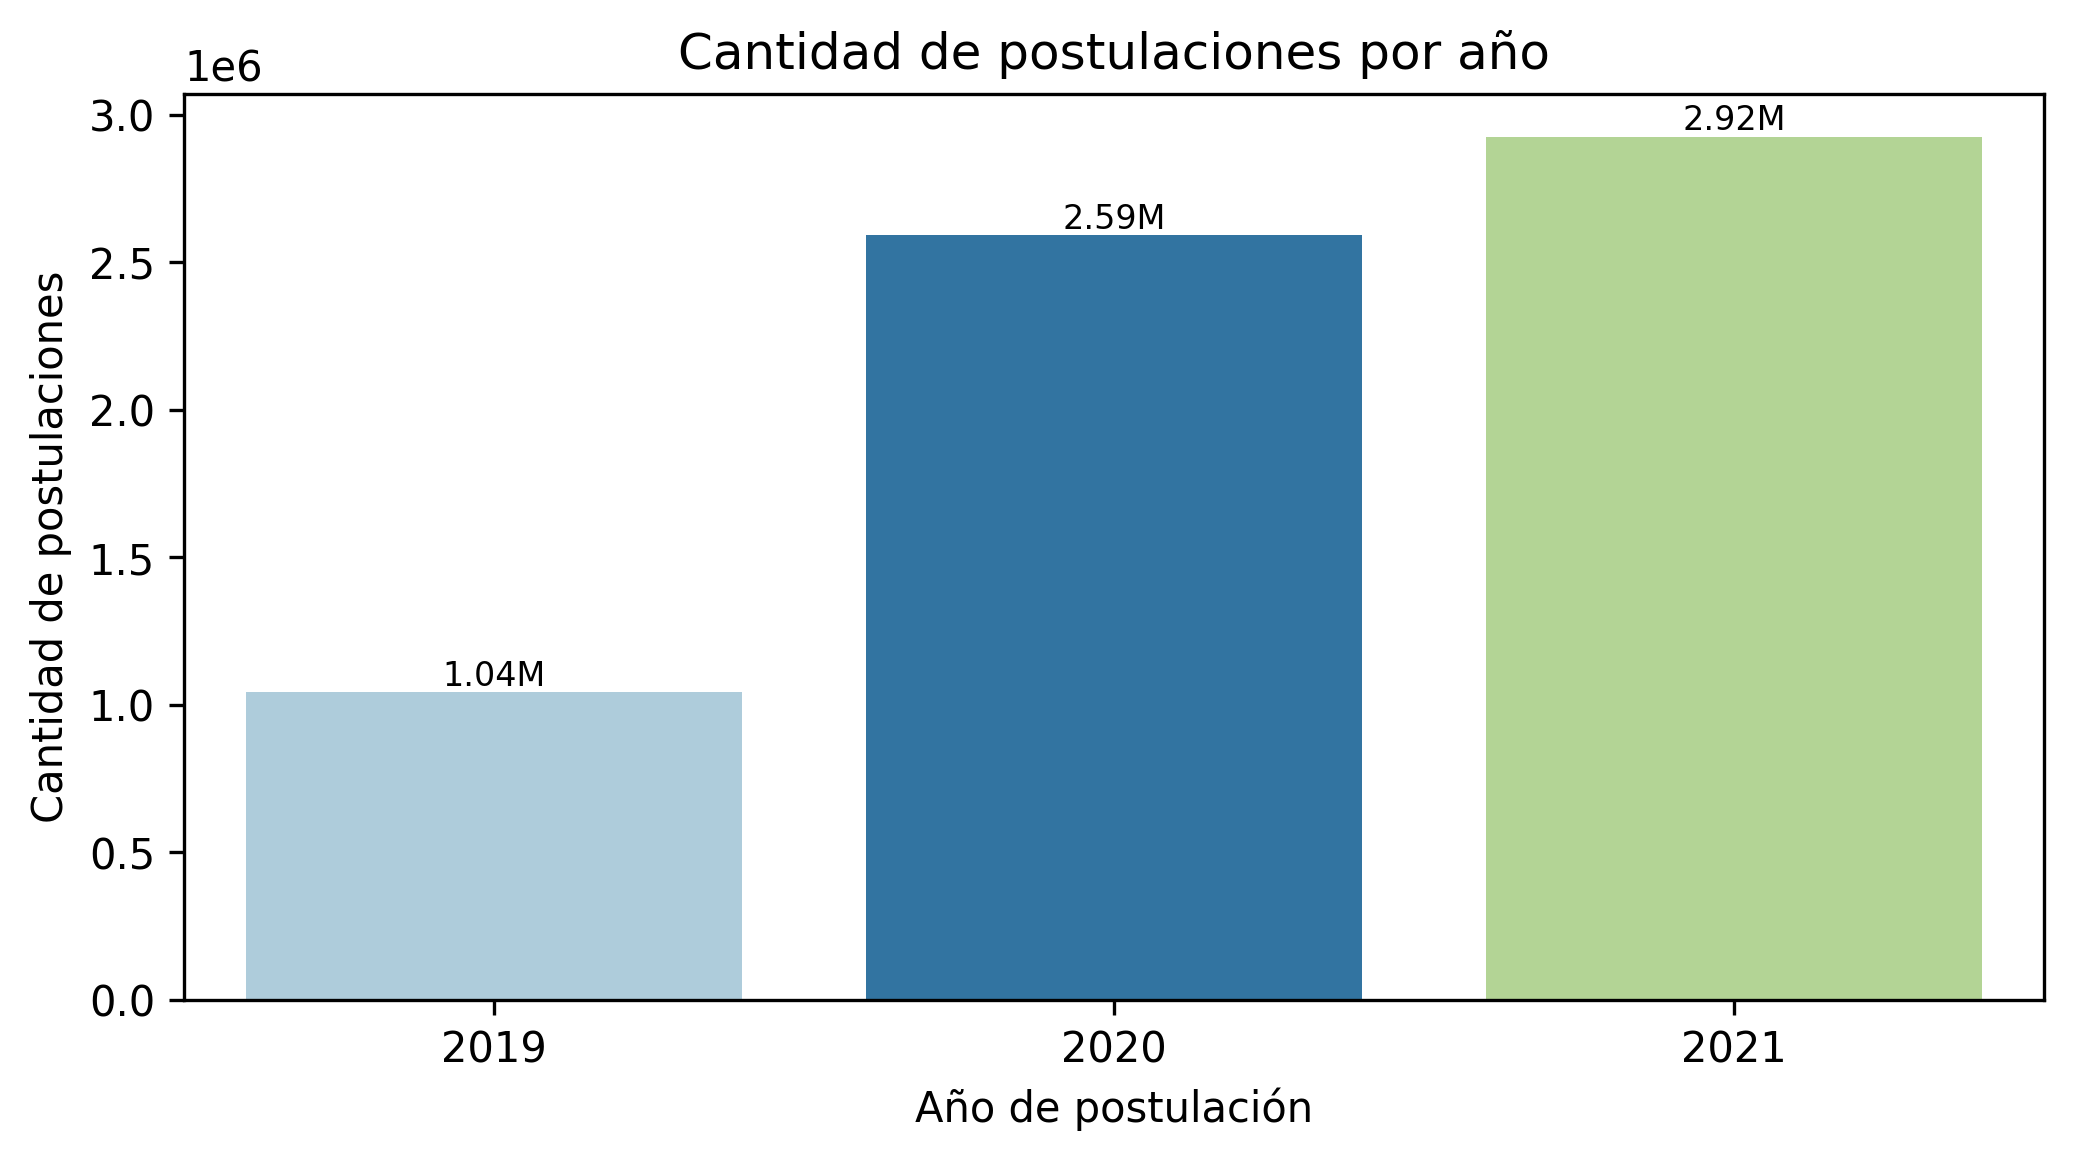

In [17]:
# Grafica la cantidad de postulantes por ano de postulación
plt.figure(figsize=(8,4))
sns.countplot(x='ANO_POSTULACION', data=postulaciones)
# cantidad en cada barra
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.2f}M'.format(p.get_height()/1000000), 
            fontsize=8, color='black', ha='center', va='bottom')
plt.title('Cantidad de postulaciones por año')
plt.xlabel('Año de postulación')
plt.ylabel('Cantidad de postulaciones')
plt.show()

# Nota de postulación

In [18]:
# Eliminar vacios en CAE_NOTA_POSTULA 
postulaciones = postulaciones[postulaciones['CAE_NOTA_POSTULA'].notna()]

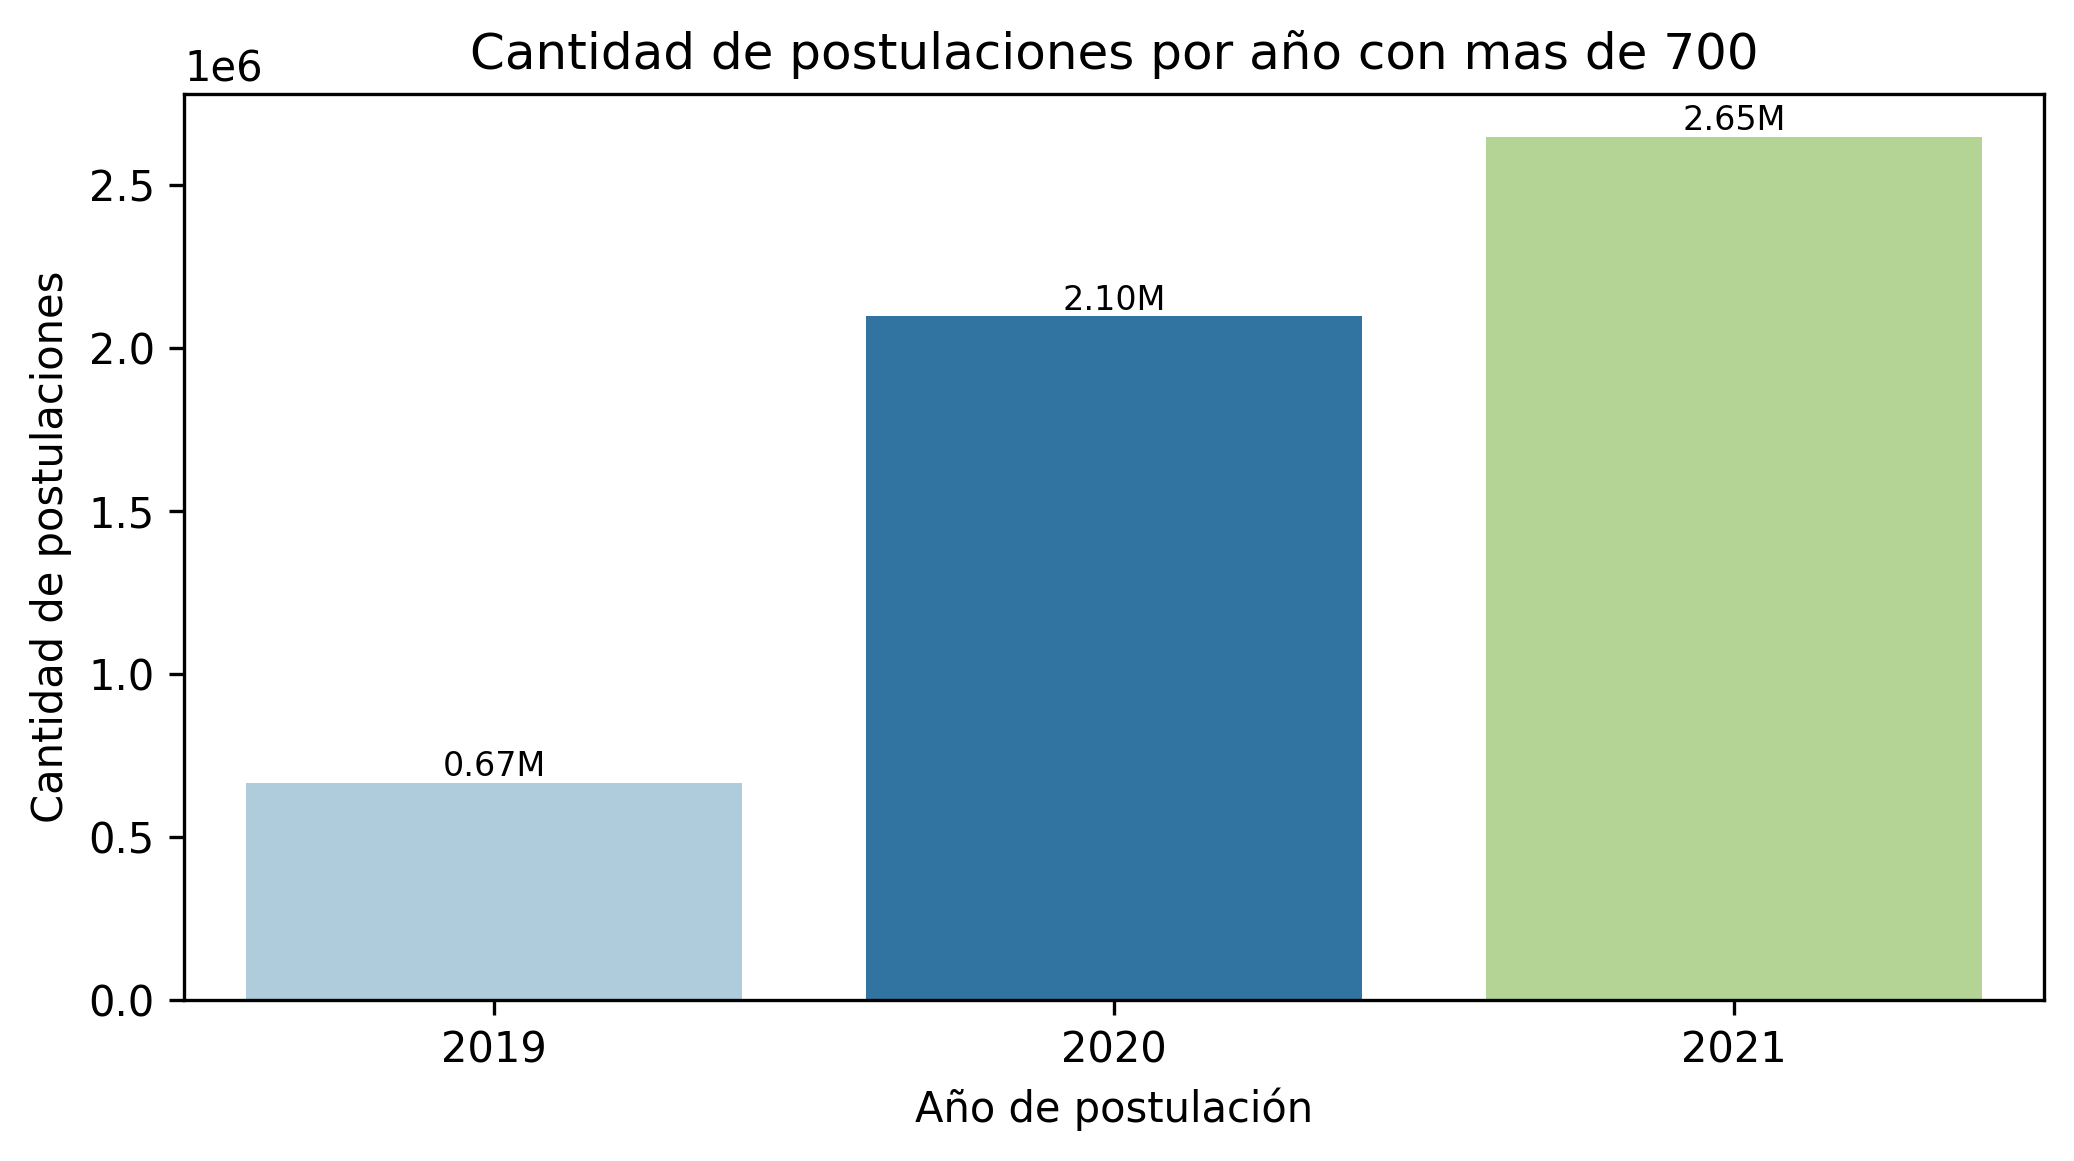

In [19]:
# Grafica la cantidad de postulantes por ano de postulación
plt.figure(figsize=(8,4))
sns.countplot(x='ANO_POSTULACION', data=postulaciones[postulaciones['CAE_NOTA_POSTULA'] > 700])
# cantidad en cada barra
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.2f}M'.format(p.get_height()/1000000), 
            fontsize=8, color='black', ha='center', va='bottom')
plt.title('Cantidad de postulaciones por año con mas de 700')
plt.xlabel('Año de postulación')
plt.ylabel('Cantidad de postulaciones')
plt.show()

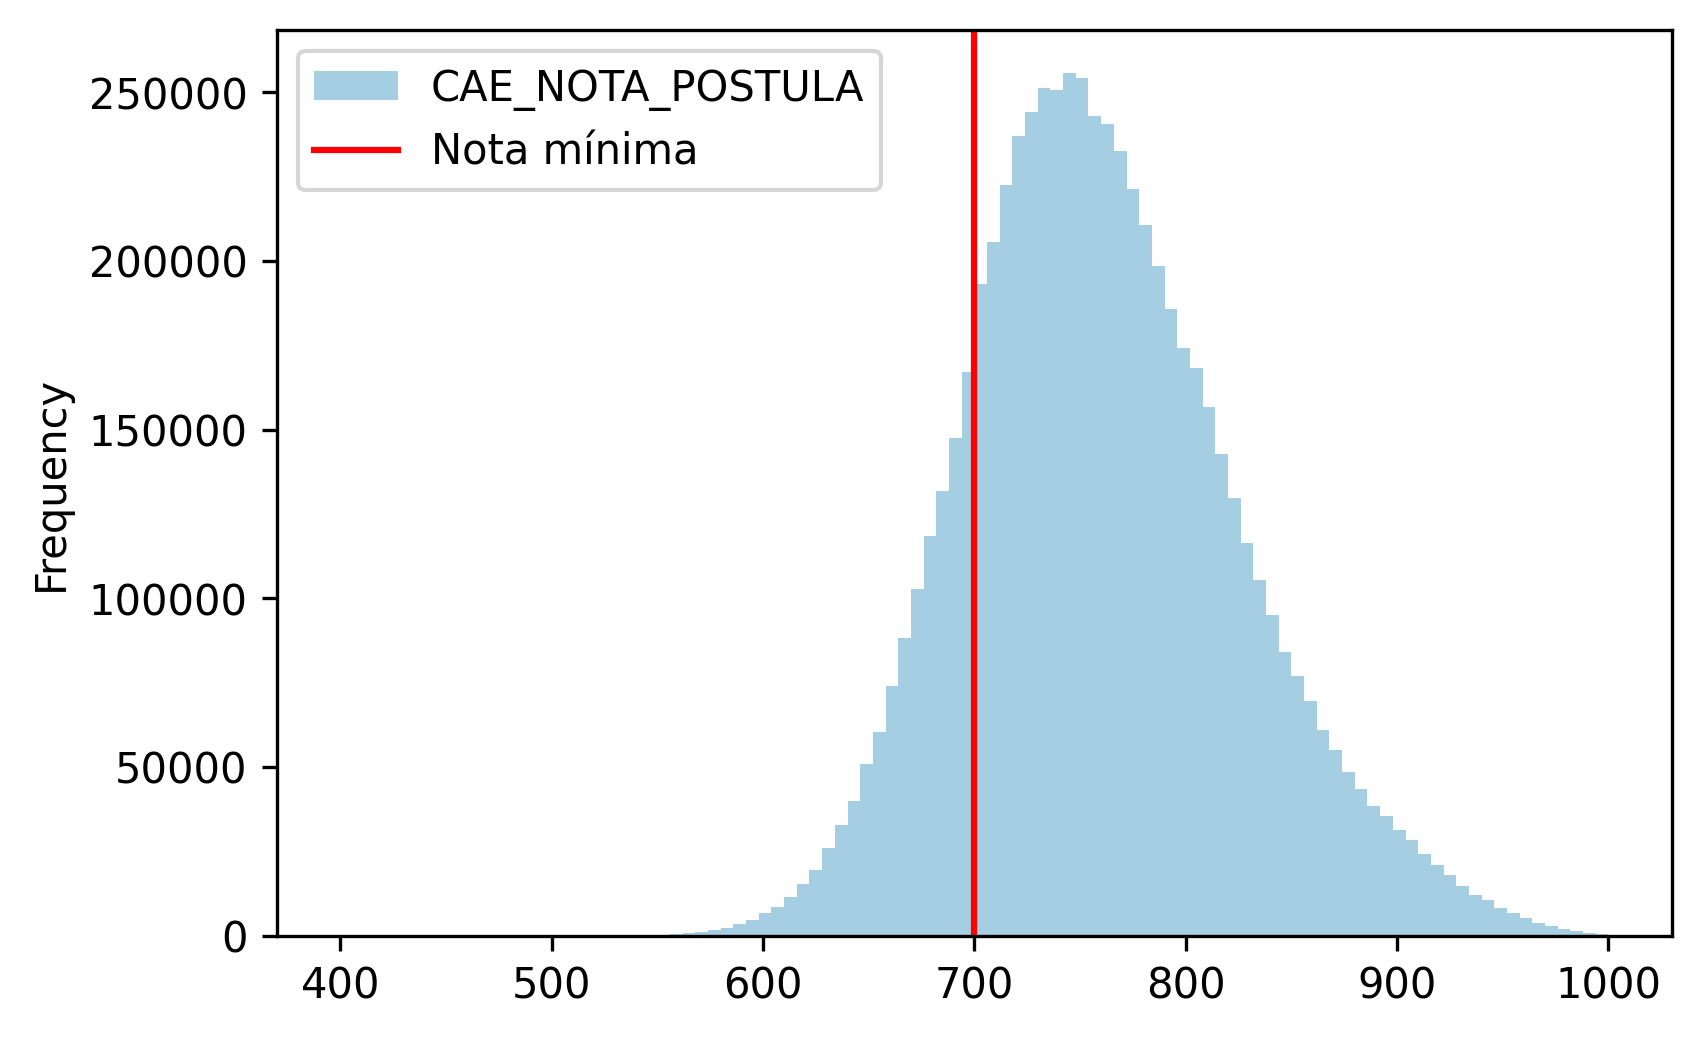

In [20]:
# grafica un histograma de la columna CAE_NOTA_POSTULA usando seaborn histplot

# Grafiquemos la distribución de los datos CAE_NOTA_POSTULA en postulaciones
postulaciones['CAE_NOTA_POSTULA'].plot.hist(bins=100)
# Pon una linea en 700 con la etiqueta nota minima
plt.axvline(700, color='red', label='Nota mínima')
plt.legend()
plt.show()

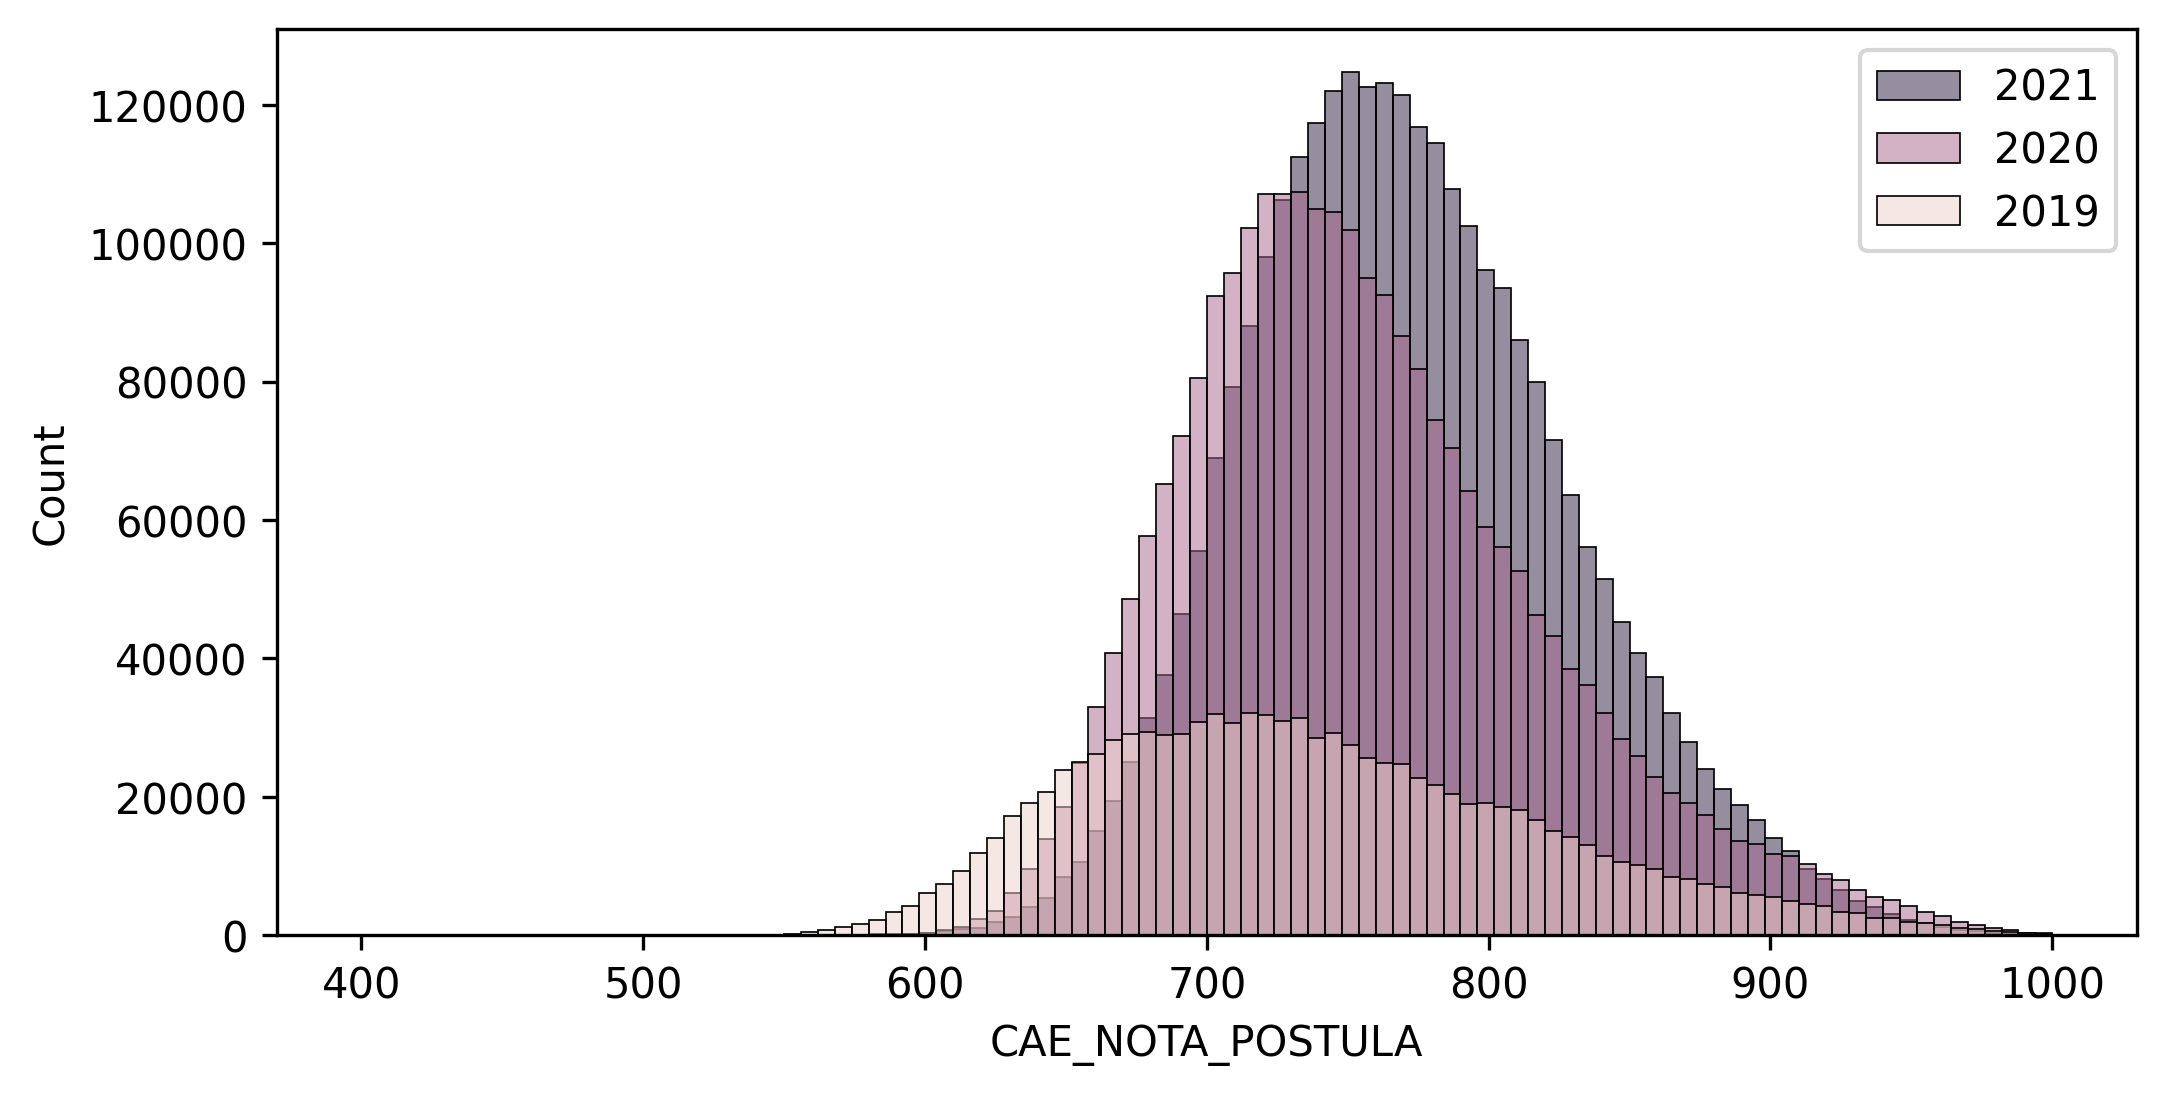

In [21]:
# Histogramas de CAE_NOTA_POSTULA por año sobrepuestos
plt.figure(figsize=(8,4))
sns.histplot(data=postulaciones, x='CAE_NOTA_POSTULA', hue='ANO_POSTULACION', bins=100)
plt.legend(labels=postulaciones['ANO_POSTULACION'].unique())
plt.show()

In [22]:
# Boxplot de CAE_NOTA_POSTULA por ANO_POSTULACION
sns.boxplot(x='ANO_POSTULACION', y='CAE_NOTA_POSTULA', data=postulaciones)
plt.axhline(700, color='red', label='Nota mínima')
plt.show()


In [23]:
# Violin plot de CAE_NOTA_POSTULA por ANO_POSTULACION
sns.violinplot(x='ANO_POSTULACION', y='CAE_NOTA_POSTULA', data=postulaciones)
plt.axhline(700, color='red', label='Nota mínima')
plt.show()

In [24]:
# Todo lo que sea diferente de POBLACION GENERAL en SEGMENTO_ASPIRANTE lo convierto en ACCION AFIRMATIVA
postulaciones['SEGMENTO_ASPIRANTE'] = postulaciones['SEGMENTO_ASPIRANTE'].replace(
    {'POBLACION GENERAL': 'POBLACION GENERAL', 
     'GAR': 'ACCION AFIRMATIVA',
     'IES PARTICULAR': 'ACCION AFIRMATIVA',
     'MERITO TERRITORIAL': 'ACCION AFIRMATIVA',
     'POLITICA DE ACCION AFIRMATIVA': 'ACCION AFIRMATIVA'})
postulaciones['SEGMENTO_ASPIRANTE'].value_counts()

POBLACION GENERAL    4006581
ACCION AFIRMATIVA    2551633
Name: SEGMENTO_ASPIRANTE, dtype: int64

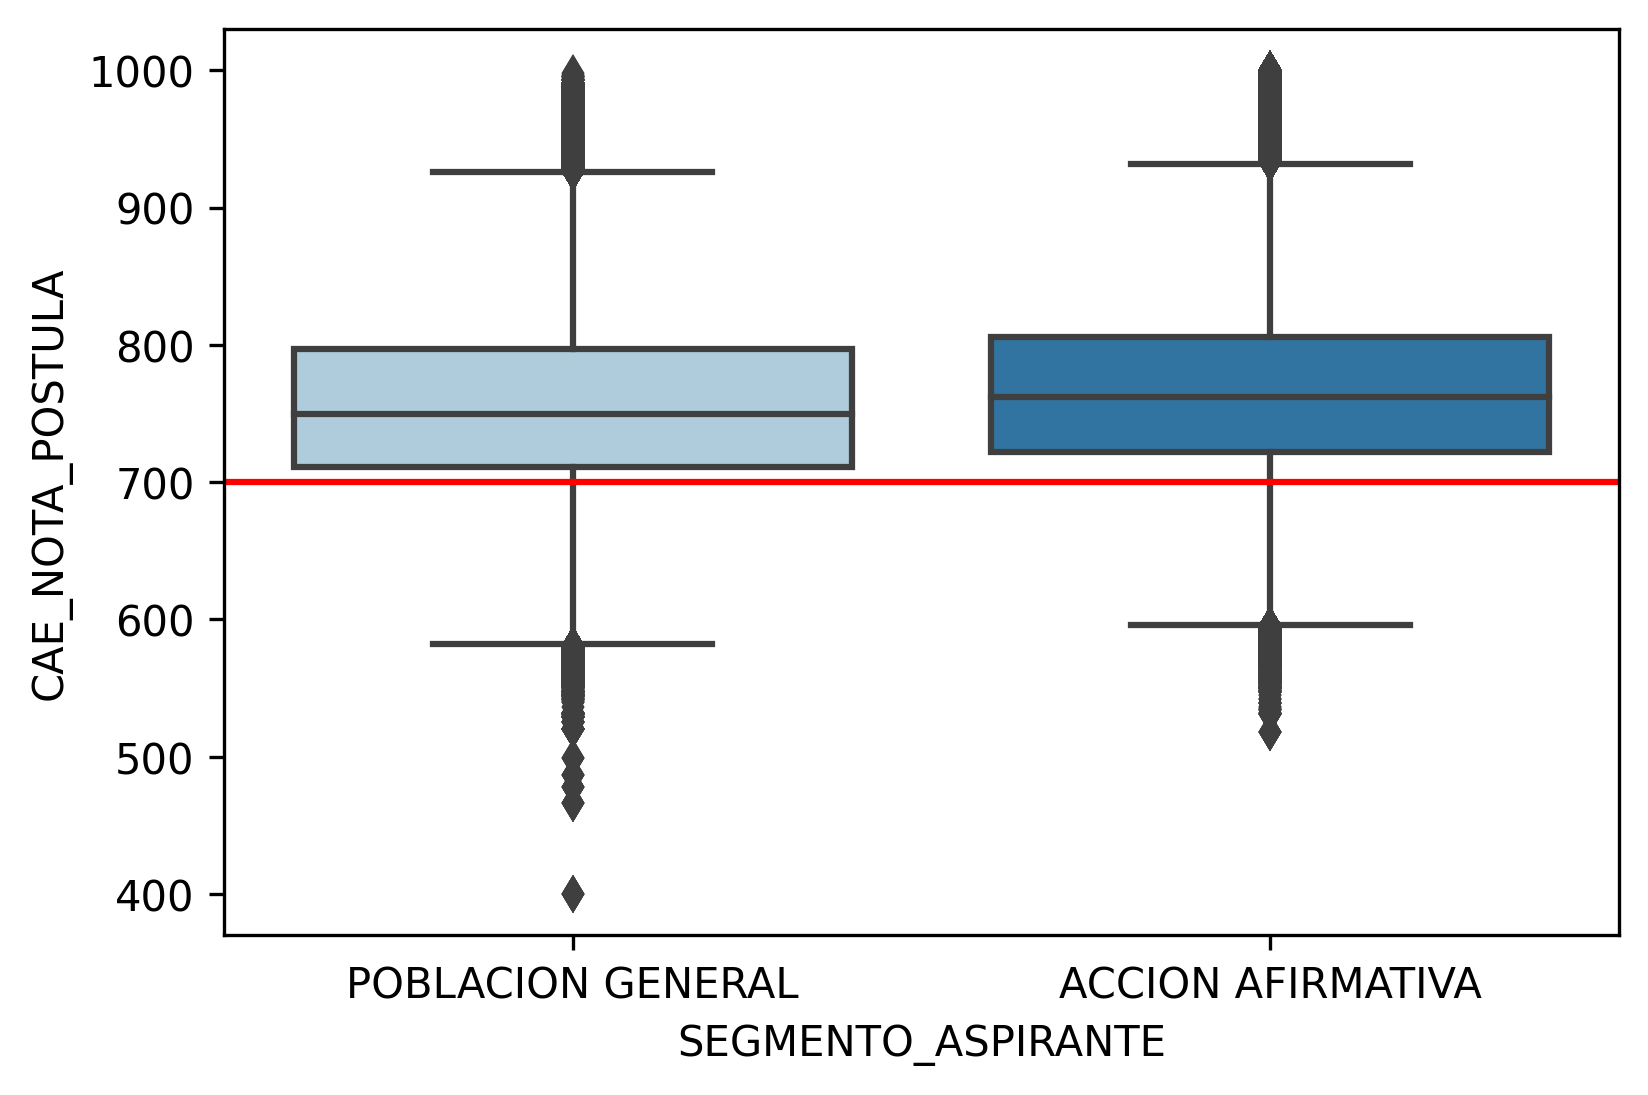

In [25]:
# Boxplot de CAE_NOTA_POSTULA por SEGMENTO_ASPIRANTE
sns.boxplot(x='SEGMENTO_ASPIRANTE', y='CAE_NOTA_POSTULA', data=postulaciones)
plt.axhline(700, color='red', label='Nota mínima')
plt.show()



In [26]:
# Existe una diferencia significativa entre las notas de los segmentos de población?

# Tomo una muestra de 10000 de cada segmento
sample = postulaciones.groupby('SEGMENTO_ASPIRANTE').apply(lambda x: x.sample(20000))
# titulo del grafico
plt.title('Distribución de muestras de 2M de las notas de cada segmentos')
# Grafico la distribución de las notas de cada segmento
sns.histplot(data=sample, x='CAE_NOTA_POSTULA', hue='SEGMENTO_ASPIRANTE', bins=100)
plt.legend(labels=sample['SEGMENTO_ASPIRANTE'].unique())
plt.show()

## NOTA_POSTULA o CAE_NOTA_POSTULA
¿Nos quedamos con quien?
- **CAE_NOTA_POSTULA** nota mayor del ENES de los 3 últimos periodos incluido el actual / A partir del P17 almacena la Nota de postulación=CAE_NOTASB_MAS_ACCAFIRMATIVA, si la nota CAE_NOTASB_MAS_ACCAFIRMATIVA sobrepasa los 1000 puntos la nota de postulación será 1000 / A partir del p18 guarda nota ponderada SB y grado mas acciones afirmativas
- **NOTA_POSTULA** Nivel en el que se aceptó el cupo

In [27]:
# Compara NOTA_POSTULA con CAE_NOTA_POSTULA en un mismo histograma
plt.figure(figsize=(8,4))
sns.histplot(data=postulaciones, x='CAE_NOTA_POSTULA', bins=100, label='CAE_NOTA_POSTULA')
sns.histplot(data=postulaciones, x='NOTA_POSTULA', bins=100, label='NOTA_POSTULA')
plt.legend()
plt.show()


In [28]:
# Calcula la diferencia entre las notas de CAE_NOTA_POSTULA y NOTA_POSTULA
postulaciones['DIF_NOTA'] = postulaciones['CAE_NOTA_POSTULA'] - postulaciones['NOTA_POSTULA']
# Grafica la diferencia de notas
postulaciones['DIF_NOTA'].describe()

count    6.558214e+06
mean     4.346548e-01
std      7.257674e+00
min     -1.380000e+02
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.660000e+02
Name: DIF_NOTA, dtype: float64

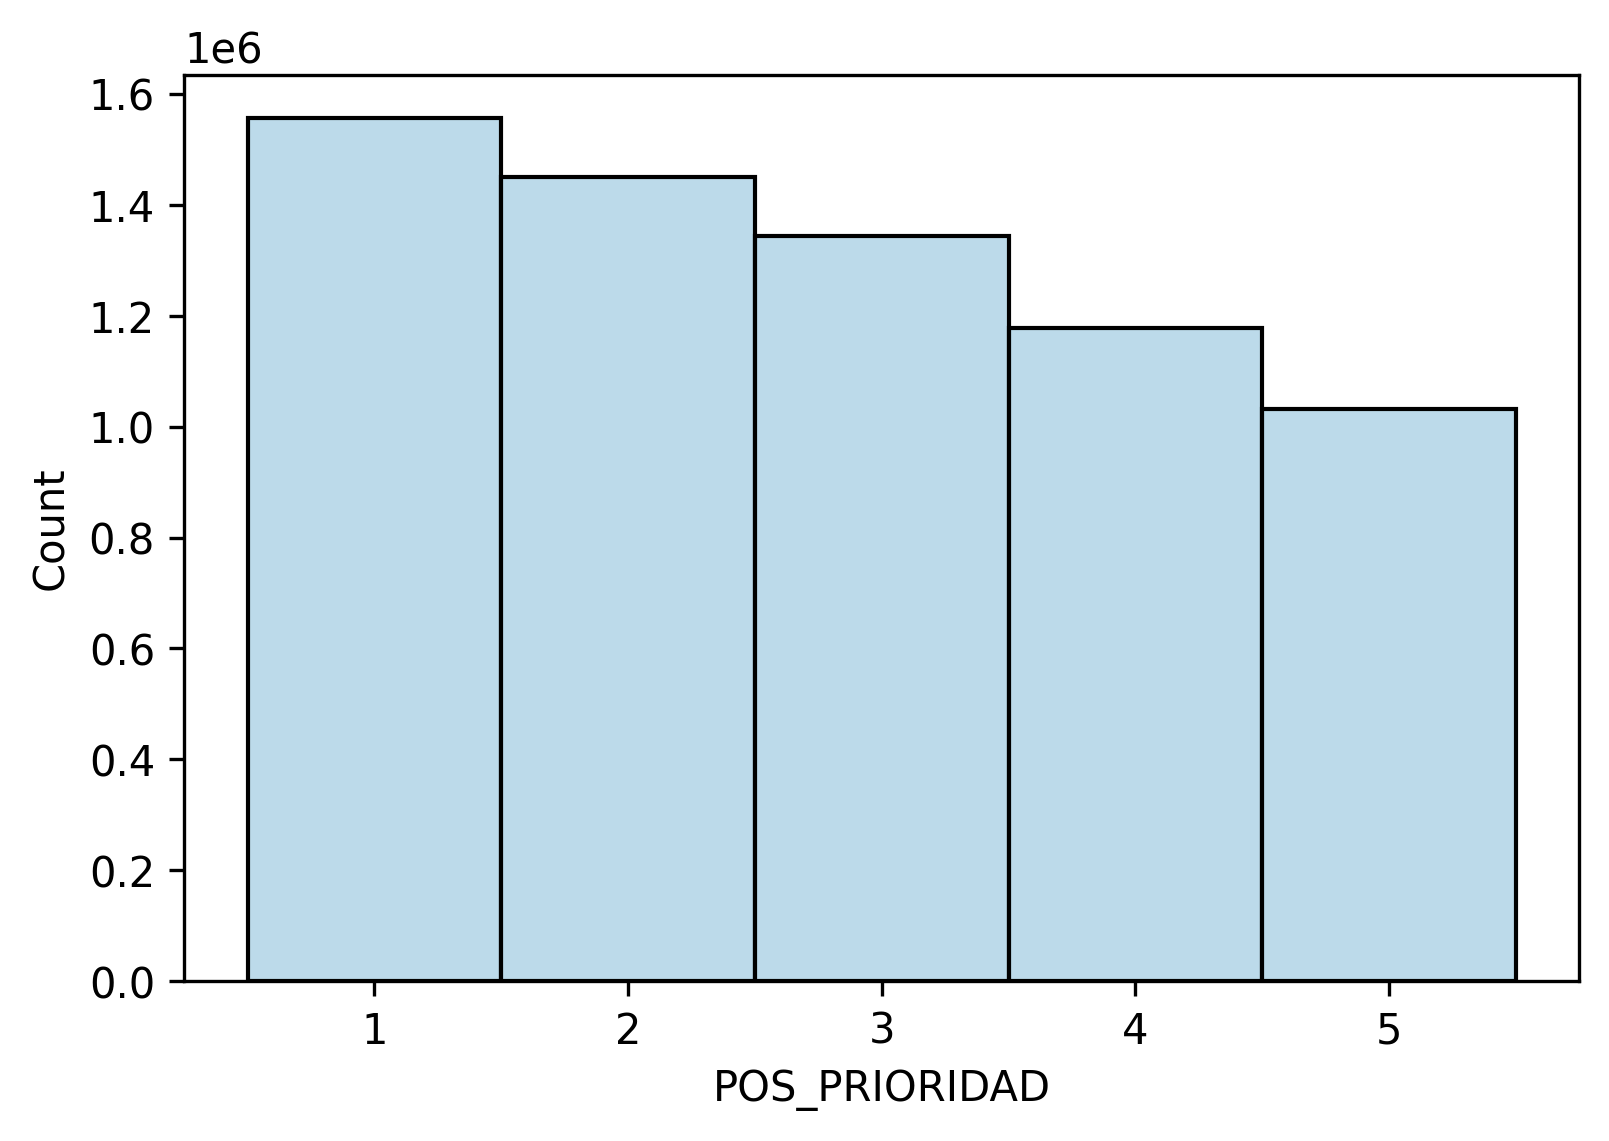

In [29]:
# Convertir POS_PRIORIDAD a categorica
postulaciones['POS_PRIORIDAD'] = postulaciones['POS_PRIORIDAD'].astype('category')
# Histograma de POS_PRIORIDAD
sns.histplot(data=postulaciones, x='POS_PRIORIDAD', bins=5)
plt.show()


In [30]:
# Describe de CAE_NOTA_POSTULA por POS_PRIORIDAD
# ¿Quien tiene más prioridad?
postulaciones.groupby('POS_PRIORIDAD')['CAE_NOTA_POSTULA'].describe()

count        mean        std    min    25%    50%    75%  \
POS_PRIORIDAD                                                                 
1              1555911.0  762.224821  66.291560  400.0  716.0  757.0  804.0   
2              1449665.0  761.382224  65.537849  400.0  716.0  756.0  803.0   
3              1344340.0  759.915727  64.812281  400.0  715.0  755.0  801.0   
4              1177071.0  758.115863  64.408245  400.0  714.0  753.0  799.0   
5              1031227.0  756.460643  63.731321  400.0  713.0  751.0  796.0   

                  max  
POS_PRIORIDAD          
1              1000.0  
2              1000.0  
3              1000.0  
4              1000.0  
5              1000.0

In [31]:
postulaciones.IES_NOMBRE_INSTIT.value_counts()

UNIVERSIDAD DE GUAYAQUIL                                  1274371
UNIVERSIDAD CENTRAL DEL ECUADOR                            858846
UNIVERSIDAD ESTATAL DE MILAGRO                             578553
UNIVERSIDAD TECNICA DE MANABI                              421269
UNIVERSIDAD DE LAS FUERZAS ARMADAS (ESPE)                  312100
                                                           ...   
INSTITUTO TECNOLÓGICO DE IMAGEN Y SONIDO PARADOX               13
INSTITUTO TECNOLÓGICO SUPERIOR KEVIN                           13
INSTITUTO TECNOLÓGICO SUPERIOR ESCULAPIO                       12
INSTITUTO TECNOLÓGICO SUPERIOR CUEST TV                         9
INSTITUTO TECNOLÓGICO SUPERIOR BENJAMÍN ROSALES PAREJA          6
Name: IES_NOMBRE_INSTIT, Length: 245, dtype: int64

In [32]:
# Grafica la cantidad de postulaciones por IES_TIPO_IES
plt.figure(figsize=(8,4))
sns.countplot(x='IES_TIPO_IES', data=postulaciones)
# cantidad en cada barra
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.2f}M'.format(p.get_height()/1000000), 
            fontsize=8, color='black', ha='center', va='bottom')
plt.title('Cantidad de postulaciones por tipo de IES')
plt.xlabel('Tipo de IES')
plt.ylabel('Cantidad de postulaciones')
plt.show()

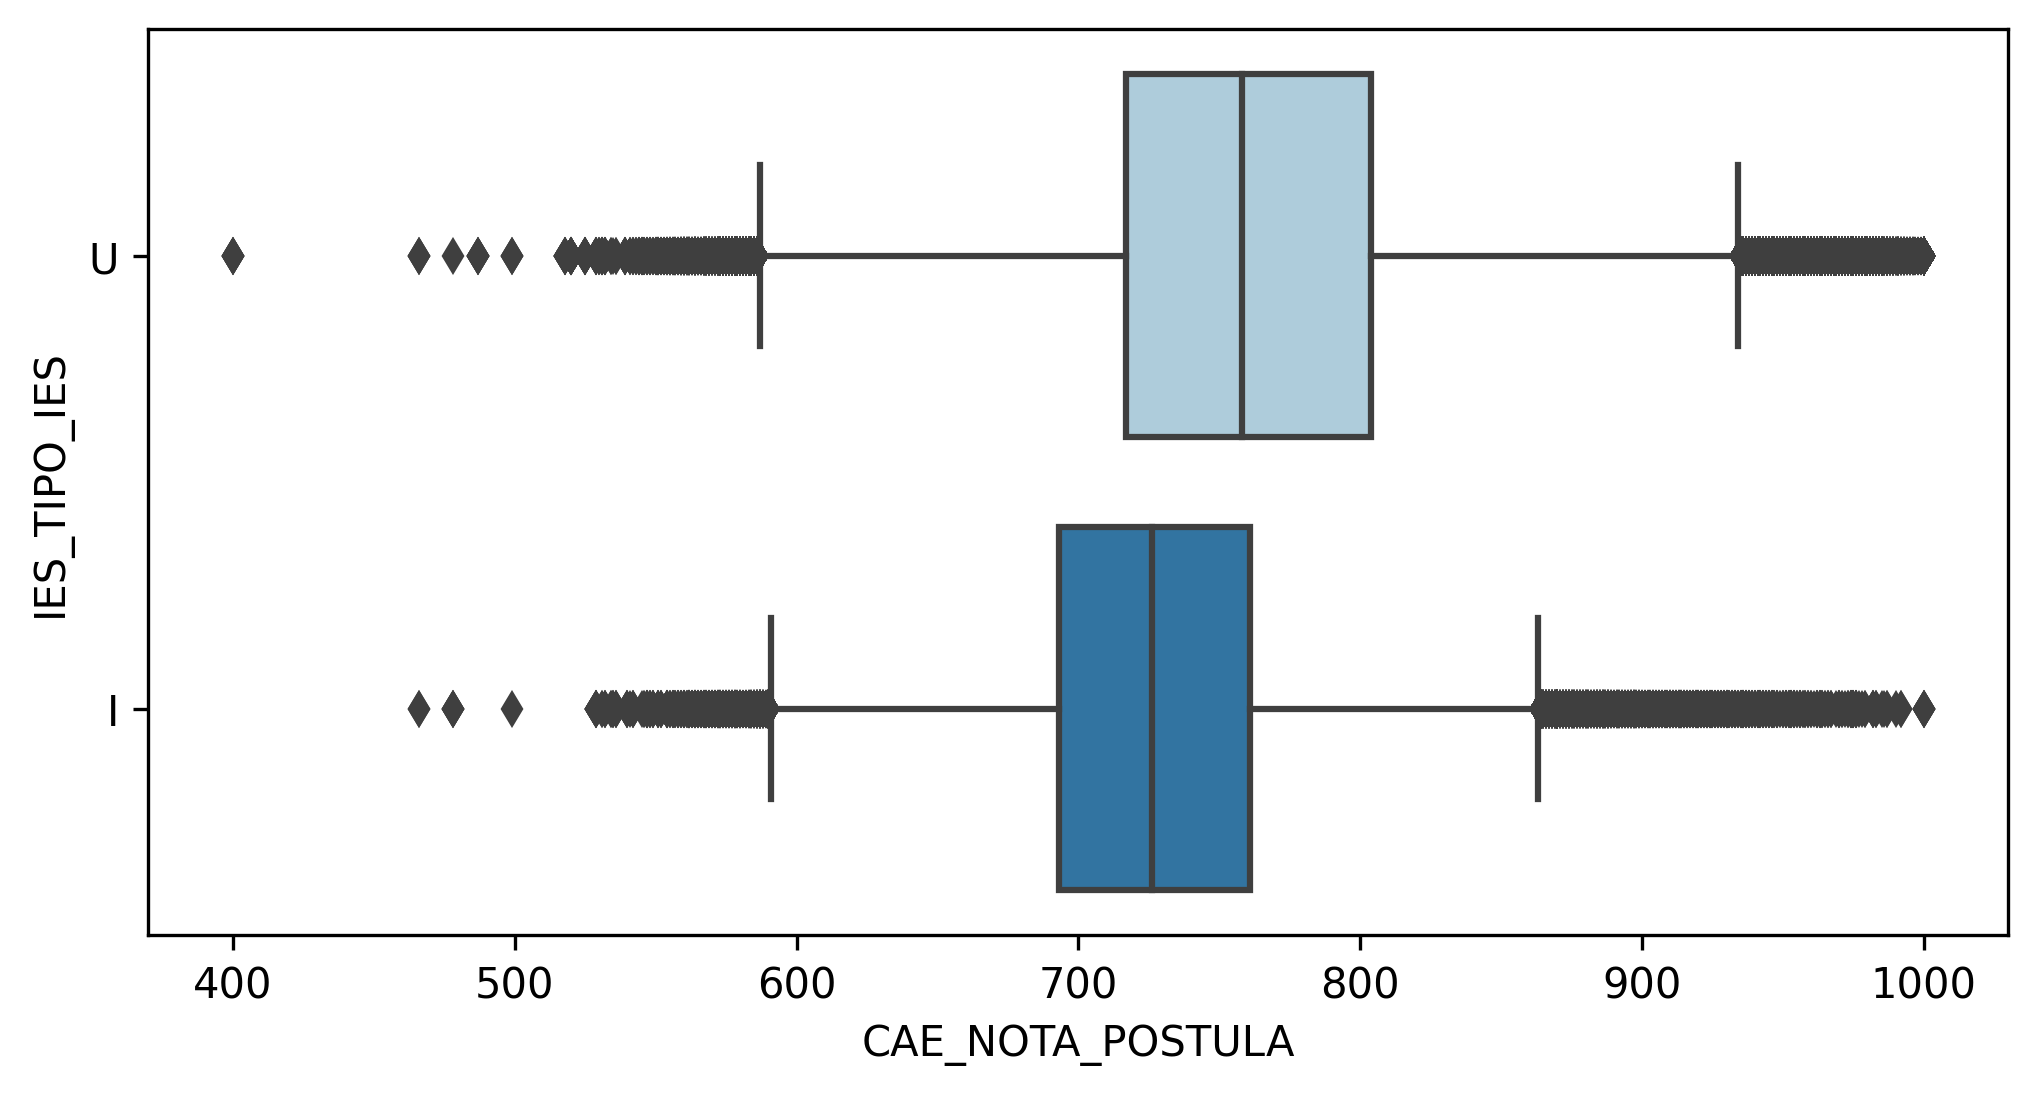

In [33]:
# Grafica boxplot de CAE_NOTA_POSTULA por IES_TIPO_IES
plt.figure(figsize=(8,4))
sns.boxplot(y='IES_TIPO_IES',x='CAE_NOTA_POSTULA', data=postulaciones)
plt.show()

In [34]:
#filtra IES_TIPO_IES = UNIVERSIDAD
postulaciones_universidad = postulaciones[postulaciones['IES_TIPO_IES'] == 'U']

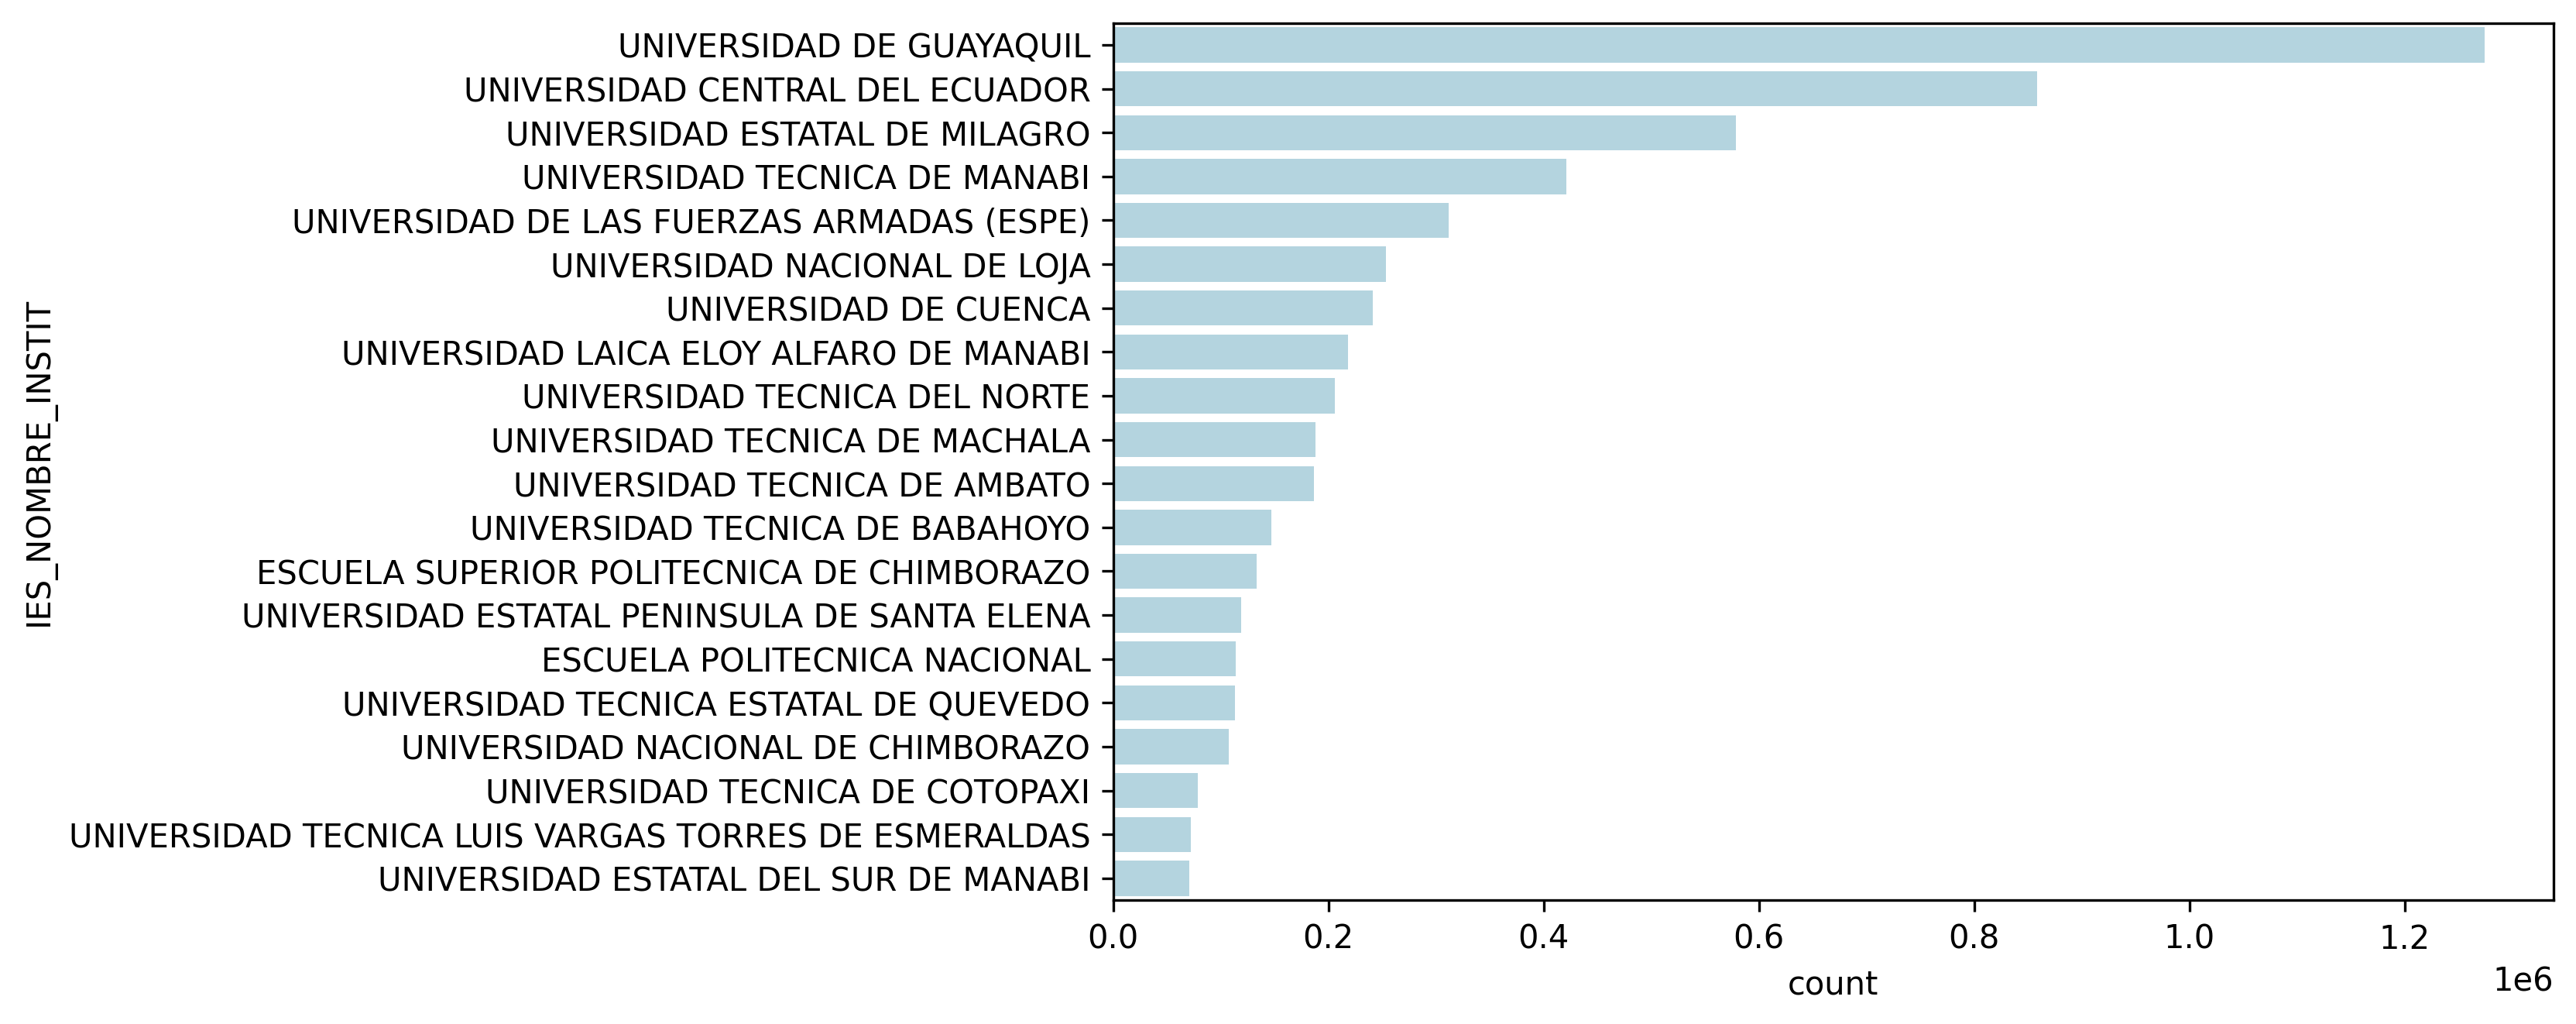

In [35]:
# Grafica la cantidad de postulaciones por IES_NOMBRE_INSTIT, top 20
plt.figure(figsize=(8,5))
sns.countplot(y='IES_NOMBRE_INSTIT', data=postulaciones, order=postulaciones_universidad['IES_NOMBRE_INSTIT'].value_counts().iloc[:20].index, color = "lightblue")
plt.show()

In [36]:
# Garfica un boxplot de CAE_NOTA_POSTULA por IES_NOMBRE_INSTIT, top 10
plt.figure(figsize=(8,20))
sns.boxplot(y='IES_NOMBRE_INSTIT', x='CAE_NOTA_POSTULA', data=postulaciones, order=postulaciones_universidad['IES_NOMBRE_INSTIT'].value_counts().iloc[:50].index, color = "lightblue")
plt.show()


In [37]:
# Tabla de las universidades con las postulaciones y describe de CAE_NOTA_POSTULA
universidades = postulaciones_universidad.groupby('IES_NOMBRE_INSTIT')['CAE_NOTA_POSTULA'].describe()
# count_percent es el porcentaje de postulaciones por universidad
universidades['count_percent'] = universidades['count'] / universidades['count'].sum() * 100
# Ordena las universidades por la cantidad de postulaciones
universidades = universidades.sort_values(by='count', ascending=False)
universidades


count        mean  \
IES_NOMBRE_INSTIT                                                           
UNIVERSIDAD DE GUAYAQUIL                            1274371.0  751.659908   
UNIVERSIDAD CENTRAL DEL ECUADOR                      858846.0  784.387761   
UNIVERSIDAD ESTATAL DE MILAGRO                       578553.0  738.040017   
UNIVERSIDAD TECNICA DE MANABI                        421269.0  747.932765   
UNIVERSIDAD DE LAS FUERZAS ARMADAS (ESPE)            312100.0  769.540099   
UNIVERSIDAD NACIONAL DE LOJA                         253365.0  772.968165   
UNIVERSIDAD DE CUENCA                                240948.0  799.947482   
UNIVERSIDAD LAICA ELOY ALFARO DE MANABI              218151.0  750.396964   
UNIVERSIDAD TECNICA DEL NORTE                        206058.0  776.613080   
UNIVERSIDAD TECNICA DE MACHALA                       188420.0  768.042320   
UNIVERSIDAD TECNICA DE AMBATO                        186492.0  802.948614   
UNIVERSIDAD TECNICA DE BABAHOYO                      147212.0  739.263701   
ESCUELA SUPERIOR POLITECNICA DE CHIMBORAZO           133360.0  781.225840   
UNIVERSIDAD ESTATAL PENINSULA DE SANTA ELENA         119291.0  734.511145   
ESCUELA POLITECNICA NACIONAL                         113726.0  797.054376   
UNIVERSIDAD TECNICA ESTATAL DE QUEVEDO               113548.0  740.191936   
UNIVERSIDAD NACIONAL DE CHIMBORAZO                   107334.0  801.435677   
UNIVERSIDAD TECNICA DE COTOPAXI                       79069.0  759.106186   
UNIVERSIDAD TECNICA LUIS VARGAS TORRES DE ESMER...    72442.0  697.529113   
UNIVERSIDAD ESTATAL DEL SUR DE MANABI                 70672.0  743.533832   
UNIVERSIDAD AGRARIA DEL ECUADOR                       53436.0  729.040778   
UNIVERSIDAD ESTATAL DE BOLIVAR                        50331.0  763.749697   
ESCUELA SUPERIOR POLITECNICA DEL LITORAL              44250.0  796.360203   
UNIVERSIDAD POLITECNICA ESTATAL DEL CARCHI            20813.0  763.816125   
UNIVERSIDAD POLITECNICA SALESIANA                     19507.0  757.124007   
ESCUELA SUPERIOR POLITECNICA AGROPECUARIA DE MA...    16015.0  734.391945   
UNIVERSIDAD UTE                                       14369.0  766.191454   
UNIVERSIDAD NACIONAL DE EDUCACION UNAE                14183.0  777.715928   
UNIVERSIDAD ESTATAL AMAZONICA                         13068.0  730.932507   
UNIVERSIDAD CATOLICA DE SANTIAGO DE GUAYAQUIL         12477.0  759.917368   
UNIVERSIDAD DE INVESTIGACION DE TECNOLOGIA EXPE...    10390.0  806.728104   
PONTIFICIA UNIVERSIDAD CATOLICA DEL ECUADOR            6610.0  767.067020   
UNIVERSIDAD REGIONAL AMAZONICA IKIAM                   6571.0  759.220971   
UNIVERSIDAD INTERNACIONAL DEL ECUADOR                  6480.0  751.248765   
UNIVERSIDAD CATOLICA DE CUENCA                         5966.0  779.553637   
UNIVERSIDAD TECNICA PARTICULAR DE LOJA                 5253.0  768.187322   
UNIVERSIDAD REGIONAL AUTONOMA DE LOS ANDES             3489.0  761.467469   
UNIVERSIDAD DEL PACIFICO ESCUELA DE NEGOCIOS           3273.0  740.428964   
UNIVERSIDAD TECNOLOGICA EMPRESARIAL DE GUAYAQUIL       1994.0  735.424273   
UNIVERSIDAD LAICA VICENTE ROCAFUERTE DE GUAYAQUIL      1892.0  733.783298   
UNIVERSIDAD DEL AZUAY                                  1789.0  744.423141   
UNIVERSIDAD TECNOLOGICA ISRAEL                         1502.0  761.693742   
UNIVERSIDAD INTERCULTURAL DE LAS NACIONALIDADES...     1411.0  752.349398   
UNIVERSIDAD TECNOLOGICA INDOAMERICA                    1403.0  750.000713   
UNIVERSIDAD TECNOLOGICA ECOTEC                         1167.0  758.814053   
UNIVERSIDAD DE LAS ARTES                                995.0  775.329648   
UNIVERSIDAD SAN FRANCISCO DE QUITO                      928.0  766.045259   
UNIVERSIDAD PARTICULAR INTERNACIONAL SEK                901.0  770.134295   
UNIVERSIDAD DE ESPECIALIDADES TURISTICAS                839.0  731.190703   
UNIVERSIDAD DEL RÍO                                     681.0  726.722467   
UNIVERSIDAD DE LOS HEMISFERIOS                      

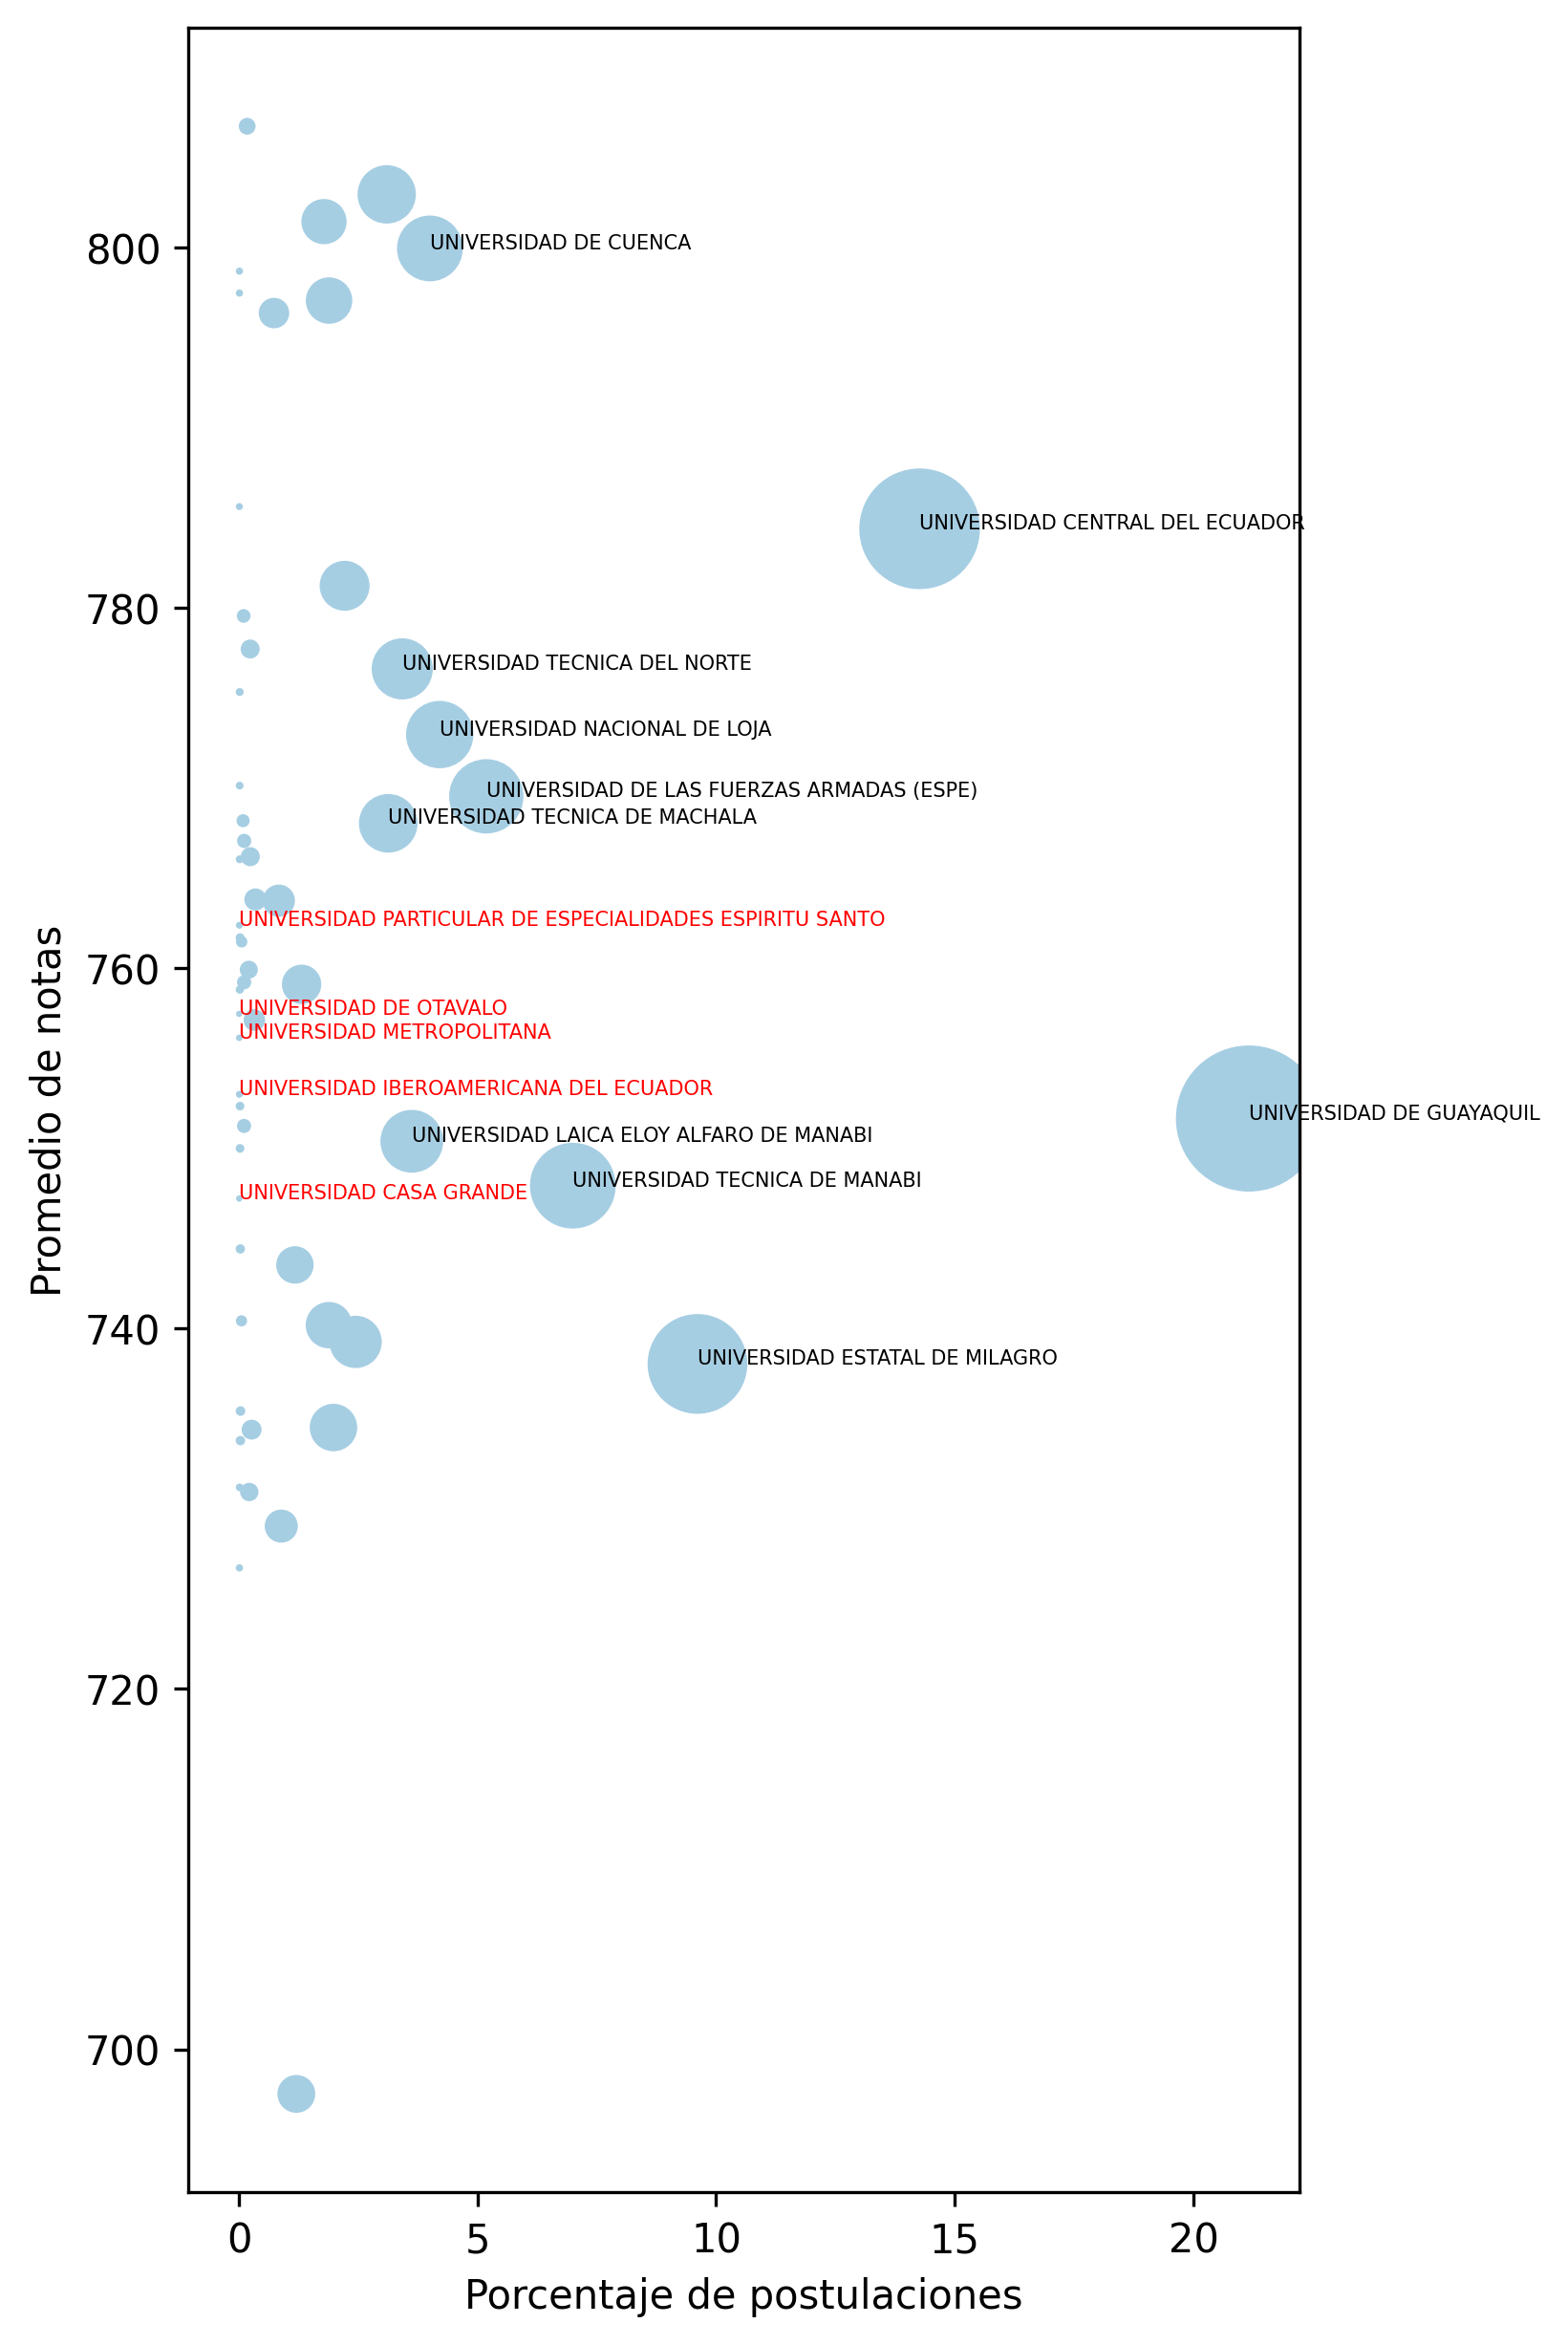

In [38]:
# Scatter plot de count_percent y mean, con el tamaño de los puntos proporcional a la cantidad de postulaciones
plt.figure(figsize=(5,10))
plt.scatter(universidades['count_percent'], universidades['mean'], s=universidades['count']/1000)
plt.xlabel('Porcentaje de postulaciones')
plt.ylabel('Promedio de notas')

for i in universidades.index[:10]:
    plt.text(universidades.loc[i, 'count_percent'], universidades.loc[i, 'mean'], i, fontsize=5)

# en color rojo las 5 universidades con menos postulaciones
for i in universidades.index[-5:]:
    plt.text(universidades.loc[i, 'count_percent'], universidades.loc[i, 'mean'], i, fontsize=5, color='red')


plt.show()




institutos

In [39]:
#filtra IES_TIPO_IES = INSTUTO
postulaciones_instituto = postulaciones[postulaciones['IES_TIPO_IES'] == 'I']

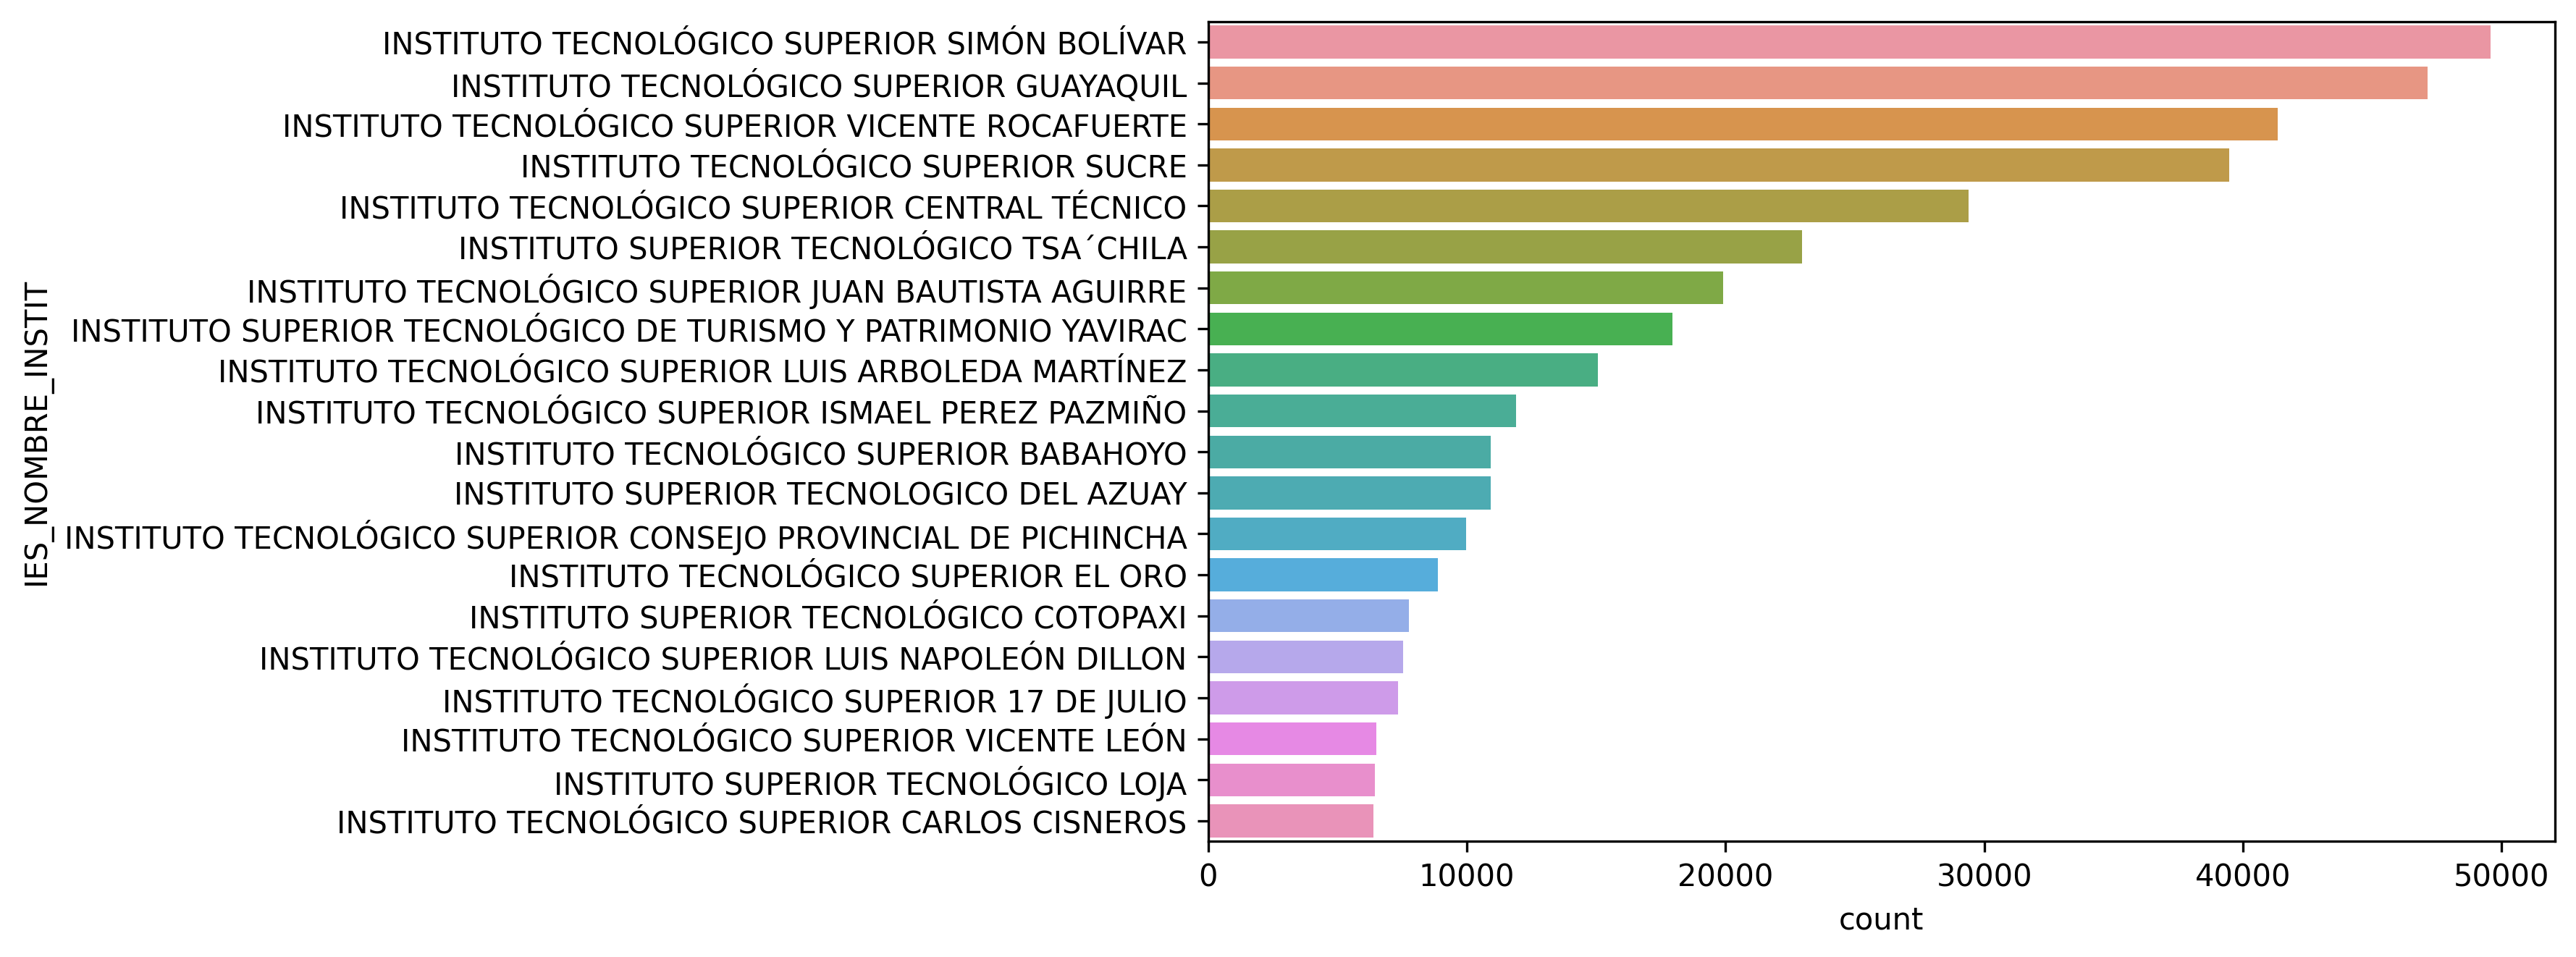

In [40]:
# Grafica la cantidad de postulaciones por IES_NOMBRE_INSTIT, top 20
plt.figure(figsize=(8,5))
sns.countplot(y='IES_NOMBRE_INSTIT', data=postulaciones, order=postulaciones_instituto['IES_NOMBRE_INSTIT'].value_counts().iloc[:20].index)
plt.show()

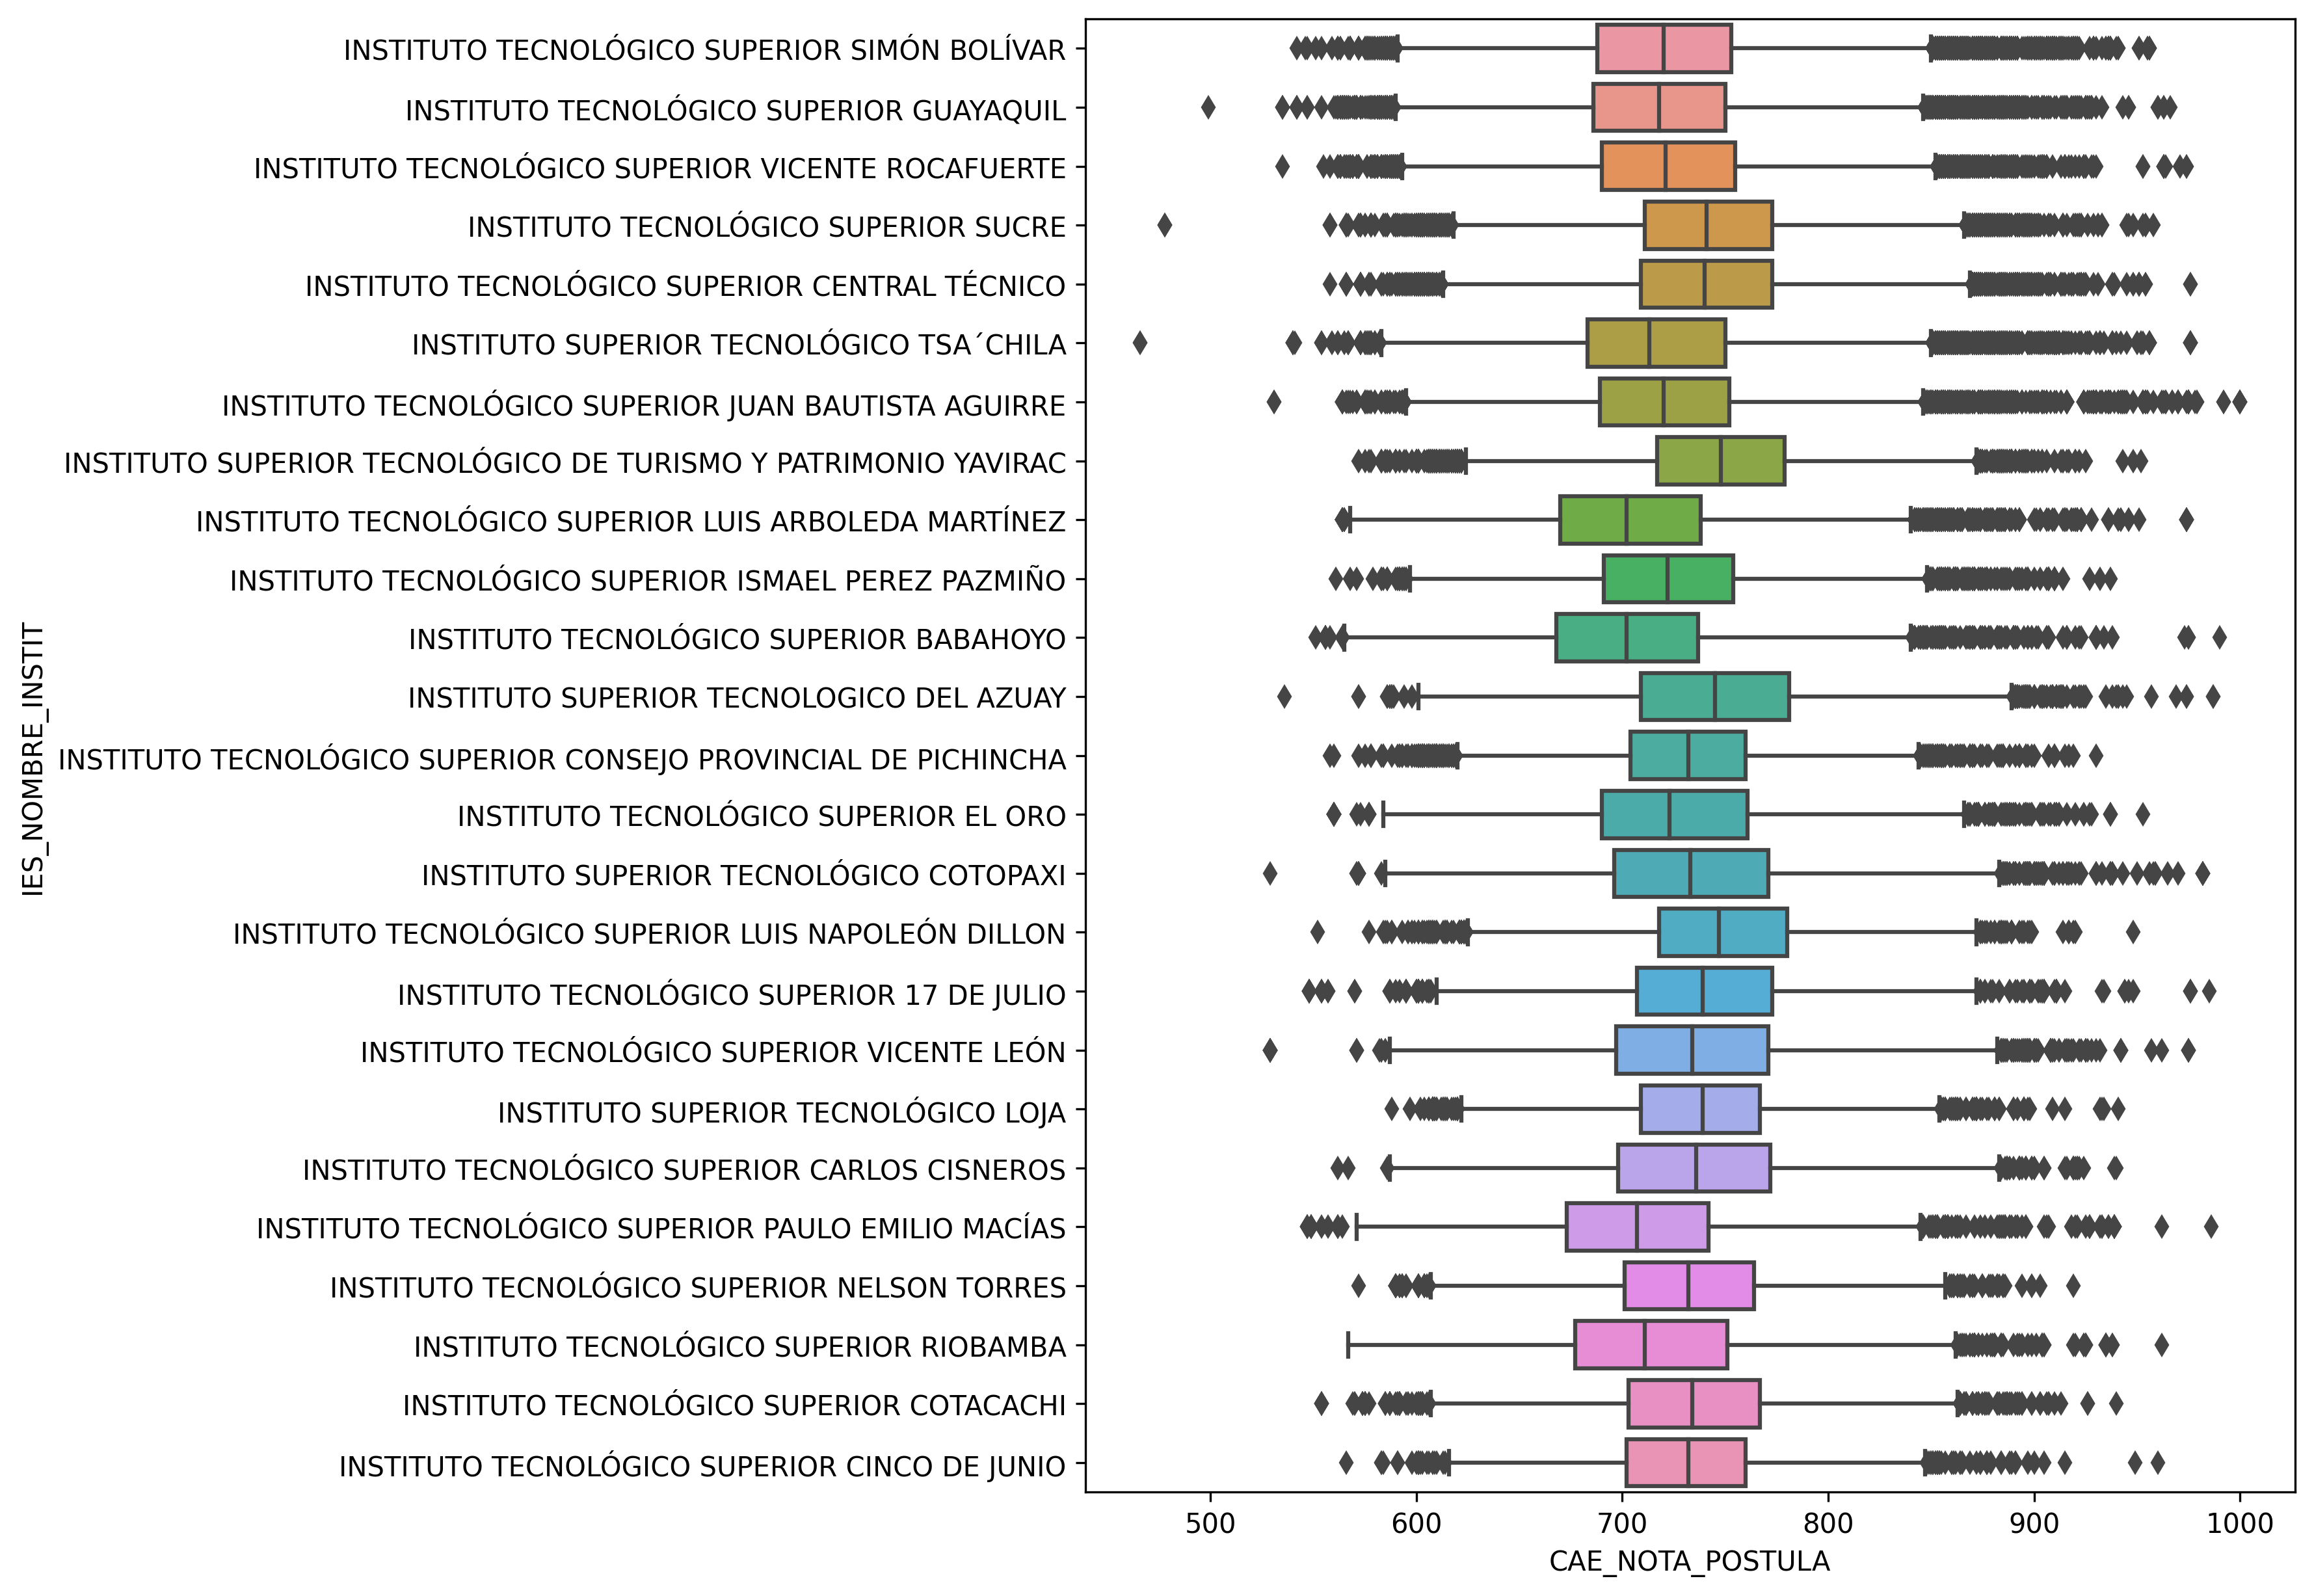

In [41]:
# Garfica un boxplot de CAE_NOTA_POSTULA por IES_NOMBRE_INSTIT, top 10
plt.figure(figsize=(8,10))
sns.boxplot(y='IES_NOMBRE_INSTIT', x='CAE_NOTA_POSTULA', data=postulaciones_instituto, order=postulaciones_instituto['IES_NOMBRE_INSTIT'].value_counts().iloc[:25].index)
plt.show()


In [42]:
# Tabla de las universidades con las postulaciones y describe de CAE_NOTA_POSTULA
universidades = postulaciones_instituto.groupby('IES_NOMBRE_INSTIT')['CAE_NOTA_POSTULA'].describe()
# count_percent es el porcentaje de postulaciones por universidad
universidades['count_percent'] = universidades['count'] / universidades['count'].sum() * 100
# Ordena las universidades por la cantidad de postulaciones
universidades = universidades.sort_values(by='count', ascending=False)
universidades


count        mean  \
IES_NOMBRE_INSTIT                                                         
INSTITUTO TECNOLÓGICO SUPERIOR SIMÓN BOLÍVAR        49583.0  722.368050   
INSTITUTO TECNOLÓGICO SUPERIOR GUAYAQUIL            47146.0  719.100008   
INSTITUTO TECNOLÓGICO SUPERIOR VICENTE ROCAFUERTE   41349.0  722.729909   
INSTITUTO TECNOLÓGICO SUPERIOR SUCRE                39471.0  742.303615   
INSTITUTO TECNOLÓGICO SUPERIOR CENTRAL TÉCNICO      29406.0  741.493641   
...                                                     ...         ...   
INSTITUTO TECNOLÓGICO DE IMAGEN Y SONIDO PARADOX       13.0  715.230769   
INSTITUTO TECNOLÓGICO SUPERIOR KEVIN                   13.0  740.230769   
INSTITUTO TECNOLÓGICO SUPERIOR ESCULAPIO               12.0  745.416667   
INSTITUTO TECNOLÓGICO SUPERIOR CUEST TV                 9.0  685.888889   
INSTITUTO TECNOLÓGICO SUPERIOR BENJAMÍN ROSALES...      6.0  724.666667   

                                                          std    min     25%  \
IES_NOMBRE_INSTIT                                                              
INSTITUTO TECNOLÓGICO SUPERIOR SIMÓN BOLÍVAR        49.836404  542.0  688.00   
INSTITUTO TECNOLÓGICO SUPERIOR GUAYAQUIL            49.720439  499.0  686.00   
INSTITUTO TECNOLÓGICO SUPERIOR VICENTE ROCAFUERTE   48.896150  535.0  690.00   
INSTITUTO TECNOLÓGICO SUPERIOR SUCRE                47.401934  478.0  711.00   
INSTITUTO TECNOLÓGICO SUPERIOR CENTRAL TÉCNICO      49.537394  558.0  709.00   
...                                                       ...    ...     ...   
INSTITUTO TECNOLÓGICO DE IMAGEN Y SONIDO PARADOX    34.890672  671.0  688.00   
INSTITUTO TECNOLÓGICO SUPERIOR KEVIN                64.848739  636.0  687.00   
INSTITUTO TECNOLÓGICO SUPERIOR ESCULAPIO            72.000579  606.0  711.25   
INSTITUTO TECNOLÓGICO SUPERIOR CUEST TV             63.603153  580.0  656.00   
INSTITUTO TECNOLÓGICO SUPERIOR BENJAMÍN ROSALES...  32.976759  684.0  699.25   

                                                      50%     75%    max  \
IES_NOMBRE_INSTIT                                                          
INSTITUTO TECNOLÓGICO SUPERIOR SIMÓN BOLÍVAR        720.0  753.00  956.0   
INSTITUTO TECNOLÓGICO SUPERIOR GUAYAQUIL            718.0  750.00  966.0   
INSTITUTO TECNOLÓGICO SUPERIOR VICENTE ROCAFUERTE   721.0  755.00  974.0   
INSTITUTO TECNOLÓGICO SUPERIOR SUCRE                741.0  773.00  958.0   
INSTITUTO TECNOLÓGICO SUPERIOR CENTRAL TÉCNICO      740.0  773.00  976.0   
...                                                   ...     ...    ...   
INSTITUTO TECNOLÓGICO DE IMAGEN Y SONIDO PARADOX    695.0  746.00  778.0   
INSTITUTO TECNOLÓGICO SUPERIOR KEVIN                749.0  780.00  847.0   
INSTITUTO TECNOLÓGICO SUPERIOR ESCULAPIO            738.0  791.25  882.0   
INSTITUTO TECNOLÓGICO SUPERIOR CUEST TV             698.0  716.00  769.0   
INSTITUTO TECNOLÓGICO SUPERIOR BENJAMÍN ROSALES...  731.5  739.00  771.0   

                                                    count_percent  
IES_NOMBRE_INSTIT                                                  
INSTITUTO TECNOLÓGICO SUPERIOR SIMÓN BOLÍVAR             9.233729  
INSTITUTO TECNOLÓGICO SUPERIOR GUAYAQUIL                 8.779892  
INSTITUTO TECNOLÓGICO SUPERIOR VICENTE ROCAFUERTE        7.700330  
INSTITUTO TECNOLÓGICO SUPERIOR SUCRE                     7.350594  
INSTITUTO TECNOLÓGICO SUPERIOR CENTRAL TÉCNICO           5.476212  
...                                                           ...  
INSTITUTO TECNOLÓGICO DE IMAGEN Y SONIDO PARADOX         0.002421  
INSTITUTO TECNOLÓGICO SUPERIOR KEVIN                     0.002421  
INSTITUTO TECNOLÓGICO SUPERIOR ESCULAPIO                 0.002235  
INSTITUTO TECNOLÓGICO SUPERIOR CUEST TV                  0.001676  
INSTITUTO TECNOLÓGICO SUPERIOR BENJAMÍN ROSALES...       0.001117  

[187 rows x 9 columns]

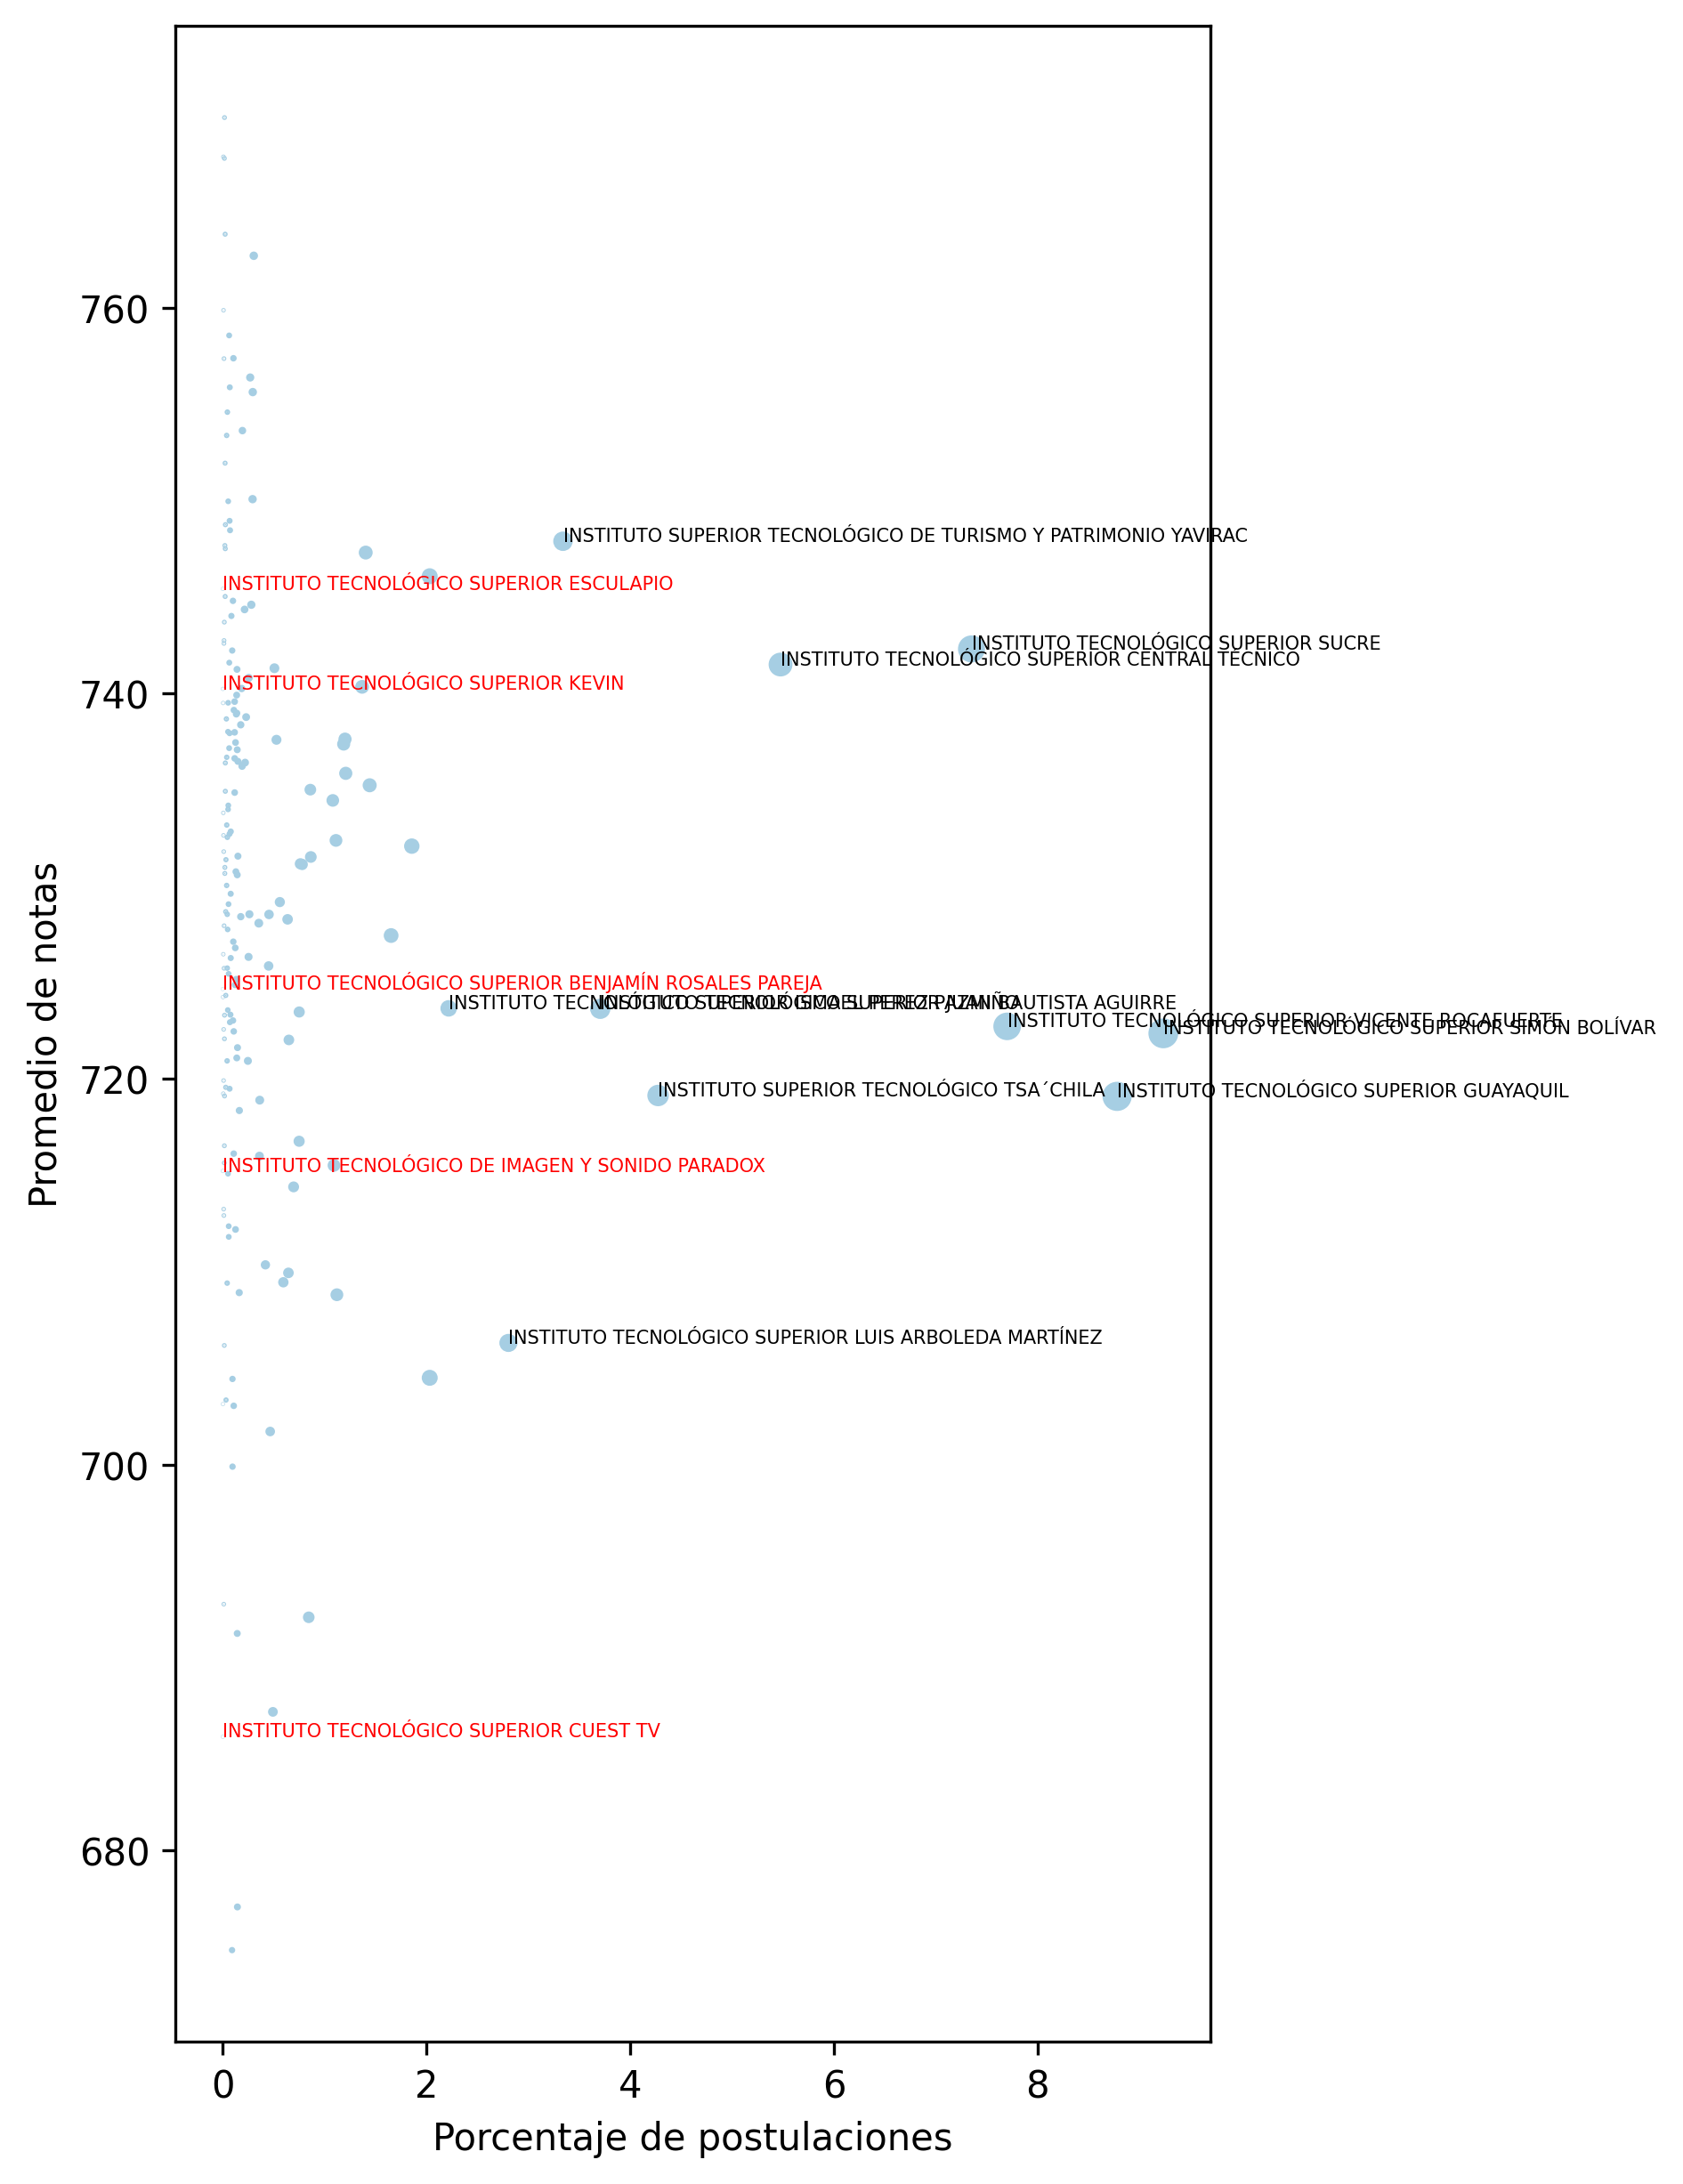

In [43]:
# Scatter plot de count_percent y mean, con el tamaño de los puntos proporcional a la cantidad de postulaciones
plt.figure(figsize=(5,10))
plt.scatter(universidades['count_percent'], universidades['mean'], s=universidades['count']/1000)
plt.xlabel('Porcentaje de postulaciones')
plt.ylabel('Promedio de notas')

for i in universidades.index[:10]:
    plt.text(universidades.loc[i, 'count_percent'], universidades.loc[i, 'mean'], i, fontsize=5)

# en color rojo las 5 universidades con menos postulaciones
for i in universidades.index[-5:]:
    plt.text(universidades.loc[i, 'count_percent'], universidades.loc[i, 'mean'], i, fontsize=5, color='red')


plt.show()




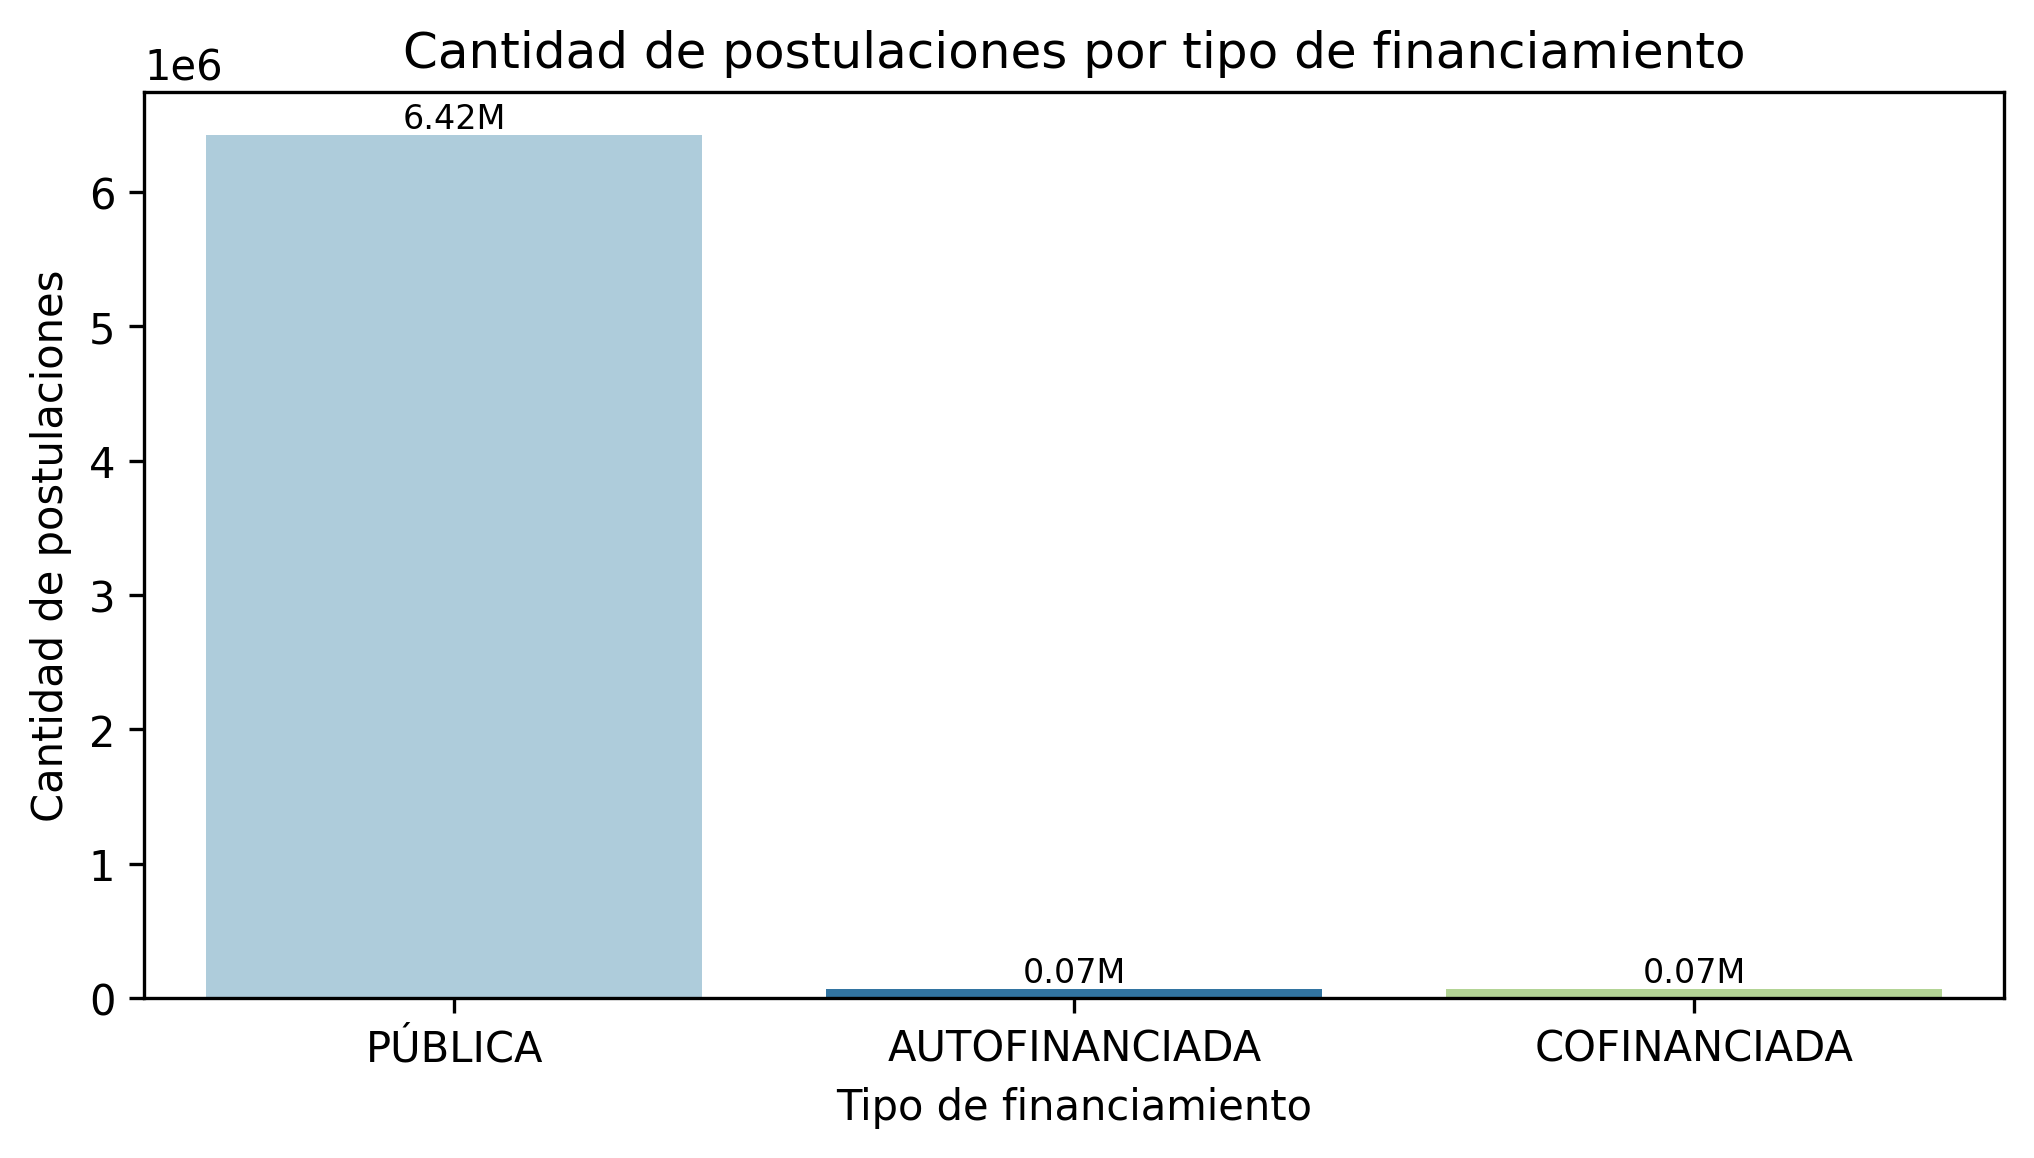

In [44]:
# Grafica la cantidad de postulaciones por IES_TIPO_FINANCIAMIENTO
plt.figure(figsize=(8,4))
sns.countplot(x='IES_TIPO_FINANCIAMIENTO', data=postulaciones)
# cantidad en cada barra
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.2f}M'.format(p.get_height()/1000000), 
            fontsize=8, color='black', ha='center', va='bottom')
plt.title('Cantidad de postulaciones por tipo de financiamiento')
plt.xlabel('Tipo de financiamiento')
plt.ylabel('Cantidad de postulaciones')
plt.show()


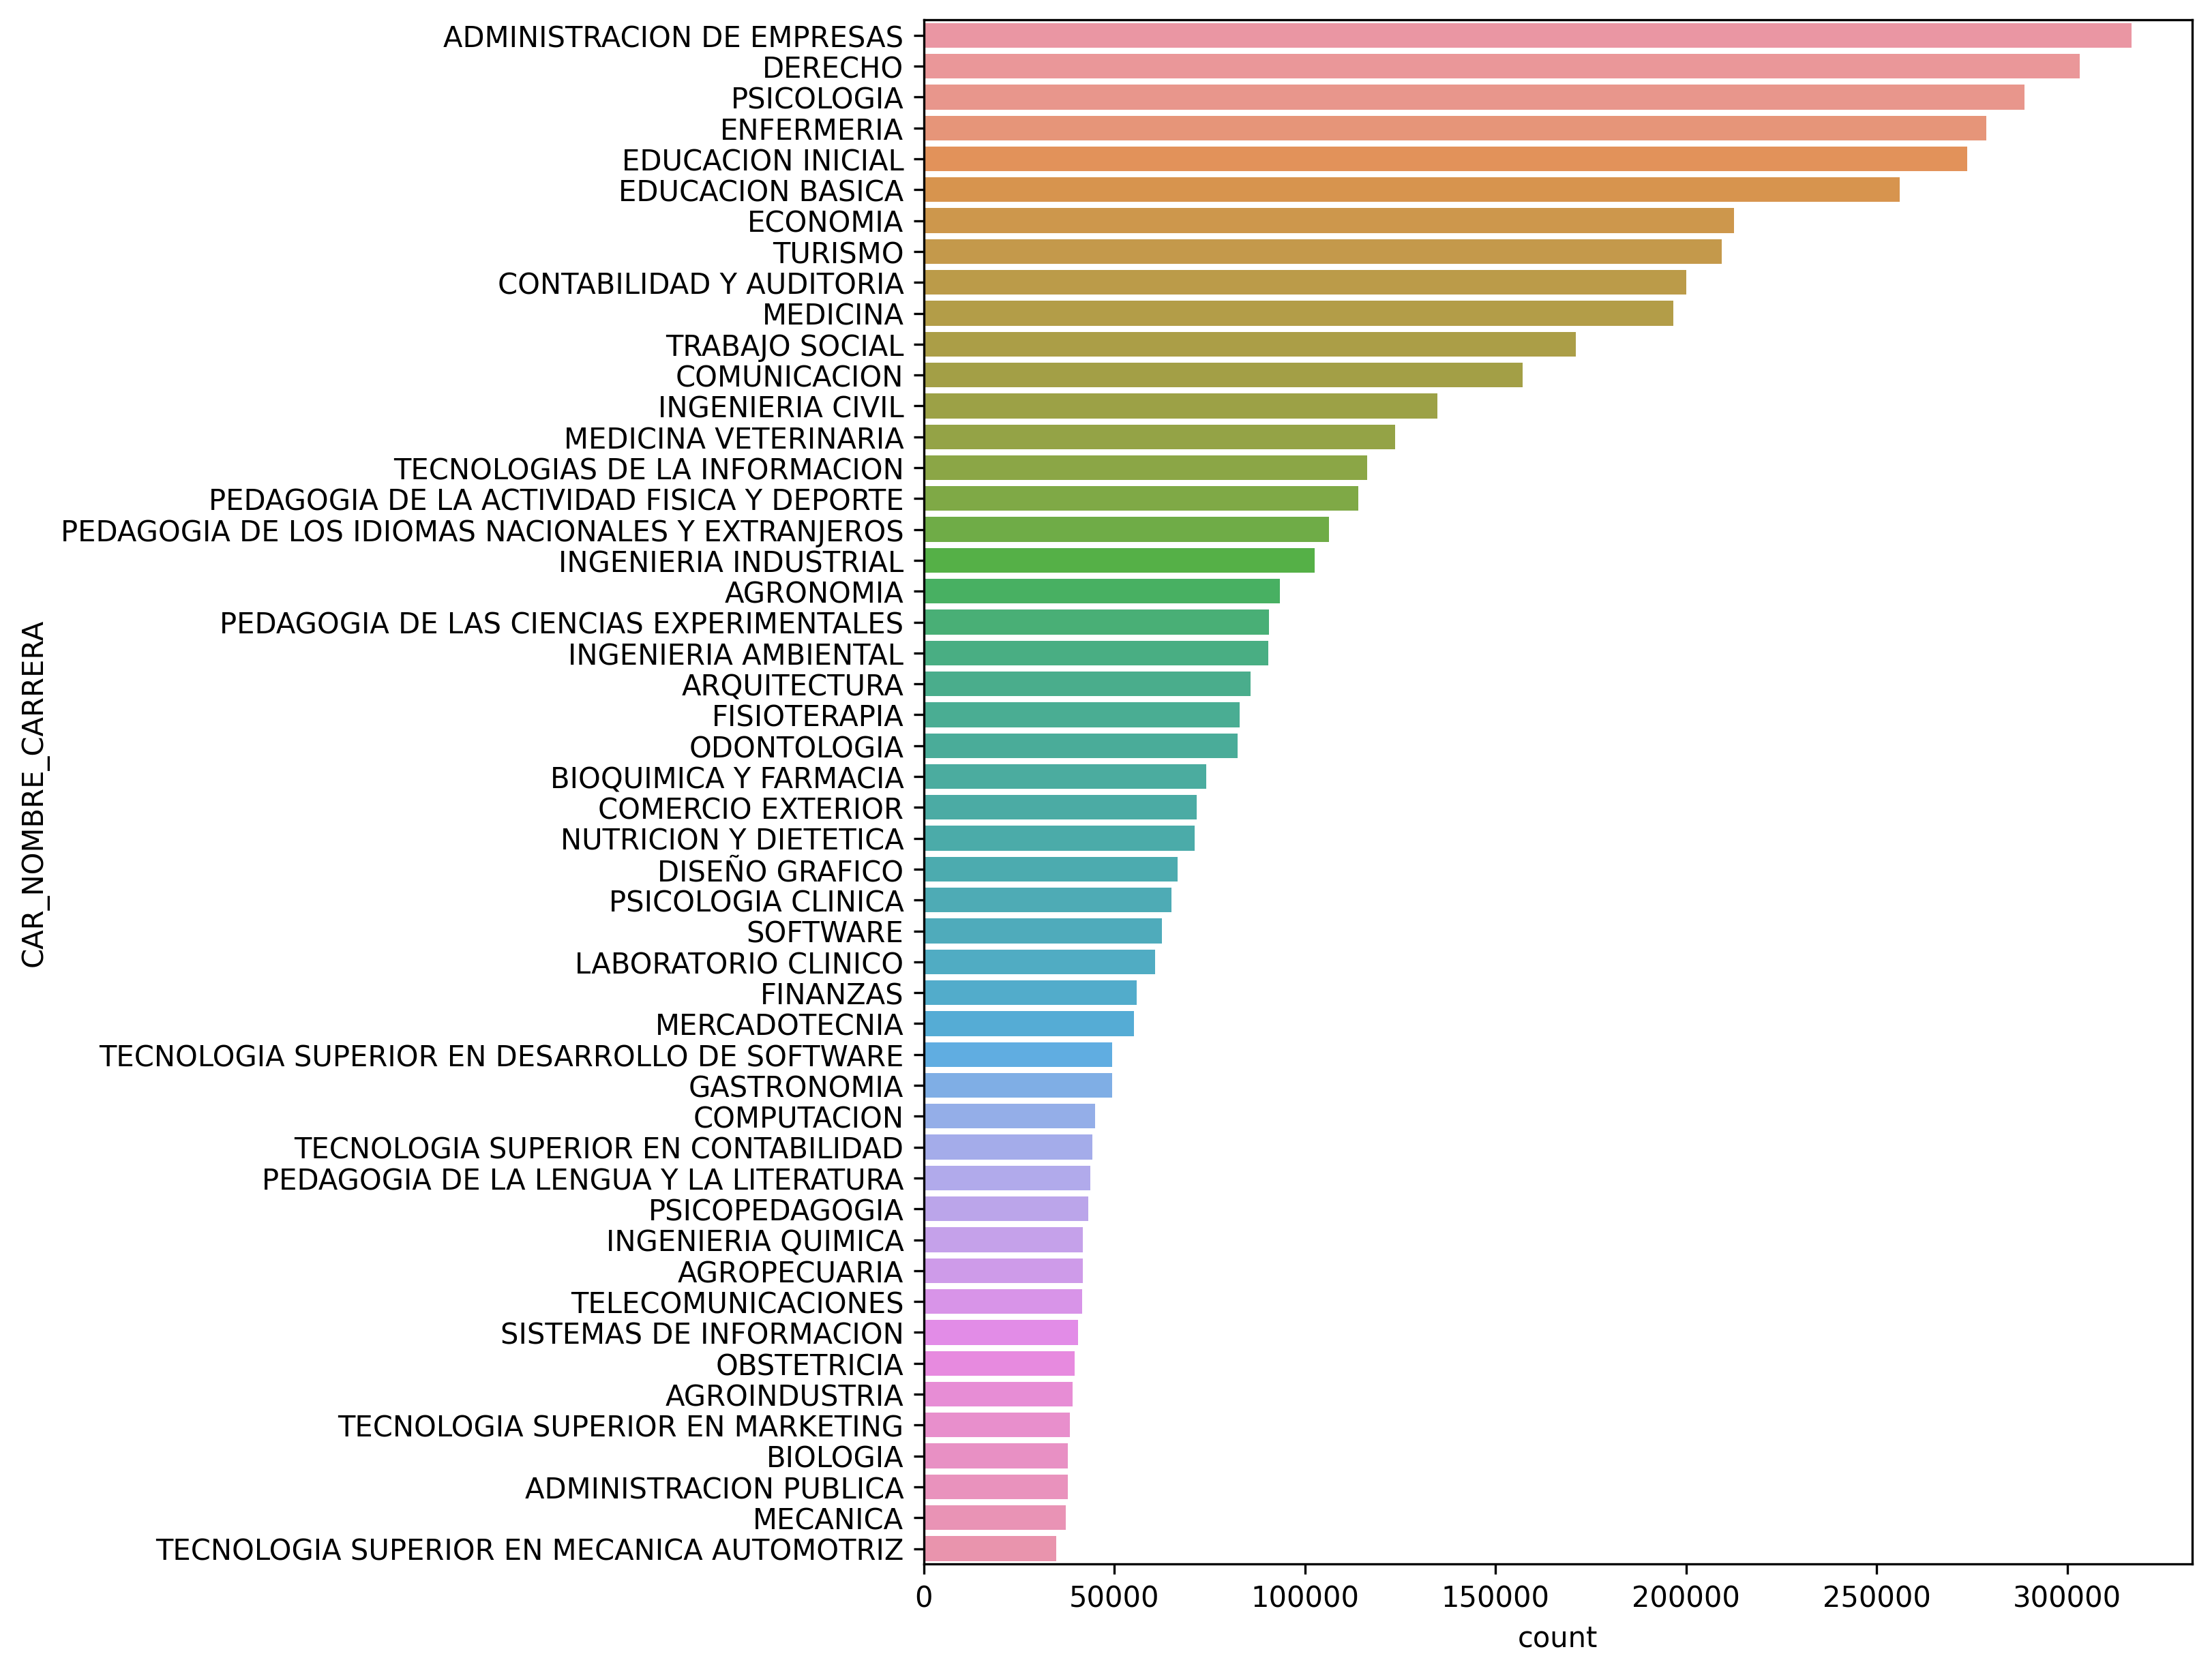

In [45]:
# Grafica el top 30 cantidad de postulaciones por CAR_NOMBRE_CARRERA
plt.figure(figsize=(8,10))
sns.countplot(y='CAR_NOMBRE_CARRERA', data=postulaciones, order=postulaciones['CAR_NOMBRE_CARRERA'].value_counts().iloc[:50].index)
plt.show()

In [46]:
# Crea un dataframe con las carreras, la cantidad de postulaciones y el describe de CAE_NOTA_POSTULA
carreras = postulaciones.groupby('CAR_NOMBRE_CARRERA')['CAE_NOTA_POSTULA'].describe()
# count_percent es el porcentaje de postulaciones por carrera
carreras['count_percent'] = carreras['count'] / carreras['count'].sum() * 100
# Ordena las carreras por la cantidad de postulaciones
carreras = carreras.sort_values(by='mean', ascending=False)
carreras


count        mean  \
CAR_NOMBRE_CARRERA                                                         
MEDICINA                                            196591.0  838.336206   
POLIMEROS                                               60.0  835.366667   
TECNOLOGIA SUPERIOR EN COMERCIO DIGITAL Y LOGIS...       3.0  834.000000   
TOPOGRAFIA CON NIVEL EQUIVALENTE A TECNOLOGIA S...       7.0  819.857143   
IMAGENOLOGIA Y RADIOLOGIA                            14003.0  817.840534   
...                                                      ...         ...   
ADMINISTRACION TURISTICA                                50.0  690.820000   
DISEÑO DE MODAS                                         44.0  688.250000   
TECNICO SUPERIOR EN MERCADOTECNIA                      601.0  682.329451   
ADMINISTRACION ADUANERA                                131.0  681.106870   
GESTION ECLESIAL                                         2.0  672.500000   

                                                          std    min     25%  \
CAR_NOMBRE_CARRERA                                                             
MEDICINA                                            72.801498  520.0  788.00   
POLIMEROS                                           77.322342  675.0  784.75   
TECNOLOGIA SUPERIOR EN COMERCIO DIGITAL Y LOGIS...  22.649503  810.0  823.50   
TOPOGRAFIA CON NIVEL EQUIVALENTE A TECNOLOGIA S...  45.436507  750.0  800.00   
IMAGENOLOGIA Y RADIOLOGIA                           64.581996  564.0  773.00   
...                                                       ...    ...     ...   
ADMINISTRACION TURISTICA                            54.356980  597.0  656.00   
DISEÑO DE MODAS                                     46.904220  574.0  644.00   
TECNICO SUPERIOR EN MERCADOTECNIA                   52.375420  547.0  650.00   
ADMINISTRACION ADUANERA                             53.789369  584.0  644.50   
GESTION ECLESIAL                                    70.003571  623.0  647.75   

                                                      50%     75%     max  \
CAR_NOMBRE_CARRERA                                                          
MEDICINA                                            843.0  896.00  1000.0   
POLIMEROS                                           846.5  897.25   975.0   
TECNOLOGIA SUPERIOR EN COMERCIO DIGITAL Y LOGIS...  837.0  846.00   855.0   
TOPOGRAFIA CON NIVEL EQUIVALENTE A TECNOLOGIA S...  813.0  841.50   893.0   
IMAGENOLOGIA Y RADIOLOGIA                           820.0  865.00  1000.0   
...                                                   ...     ...     ...   
ADMINISTRACION TURISTICA                            690.0  722.50   820.0   
DISEÑO DE MODAS                                     694.0  718.00   813.0   
TECNICO SUPERIOR EN MERCADOTECNIA                   683.0  711.00   910.0   
ADMINISTRACION ADUANERA                             679.0  707.00   888.0   
GESTION ECLESIAL                                    672.5  697.25   722.0   

                                                    count_percent  
CAR_NOMBRE_CARRERA                                                 
MEDICINA                                                 2.997630  
POLIMEROS                                                0.000915  
TECNOLOGIA SUPERIOR EN COMERCIO DIGITAL Y LOGIS...       0.000046  
TOPOGRAFIA CON NIVEL EQUIVALENTE A TECNOLOGIA S...       0.000107  
IMAGENOLOGIA Y RADIOLOGIA                                0.213518  
...                                                           ...  
ADMINISTRACION TURISTICA                                 0.000762  
DISEÑO DE MODAS                                          0.000671  
TECNICO SUPERIOR EN MERCADOTECNIA                        0.009164  
ADMINISTRACION ADUANERA                                  0.001997  
GESTION ECLESIAL                                         0.000030  

[410 rows x 9 columns]

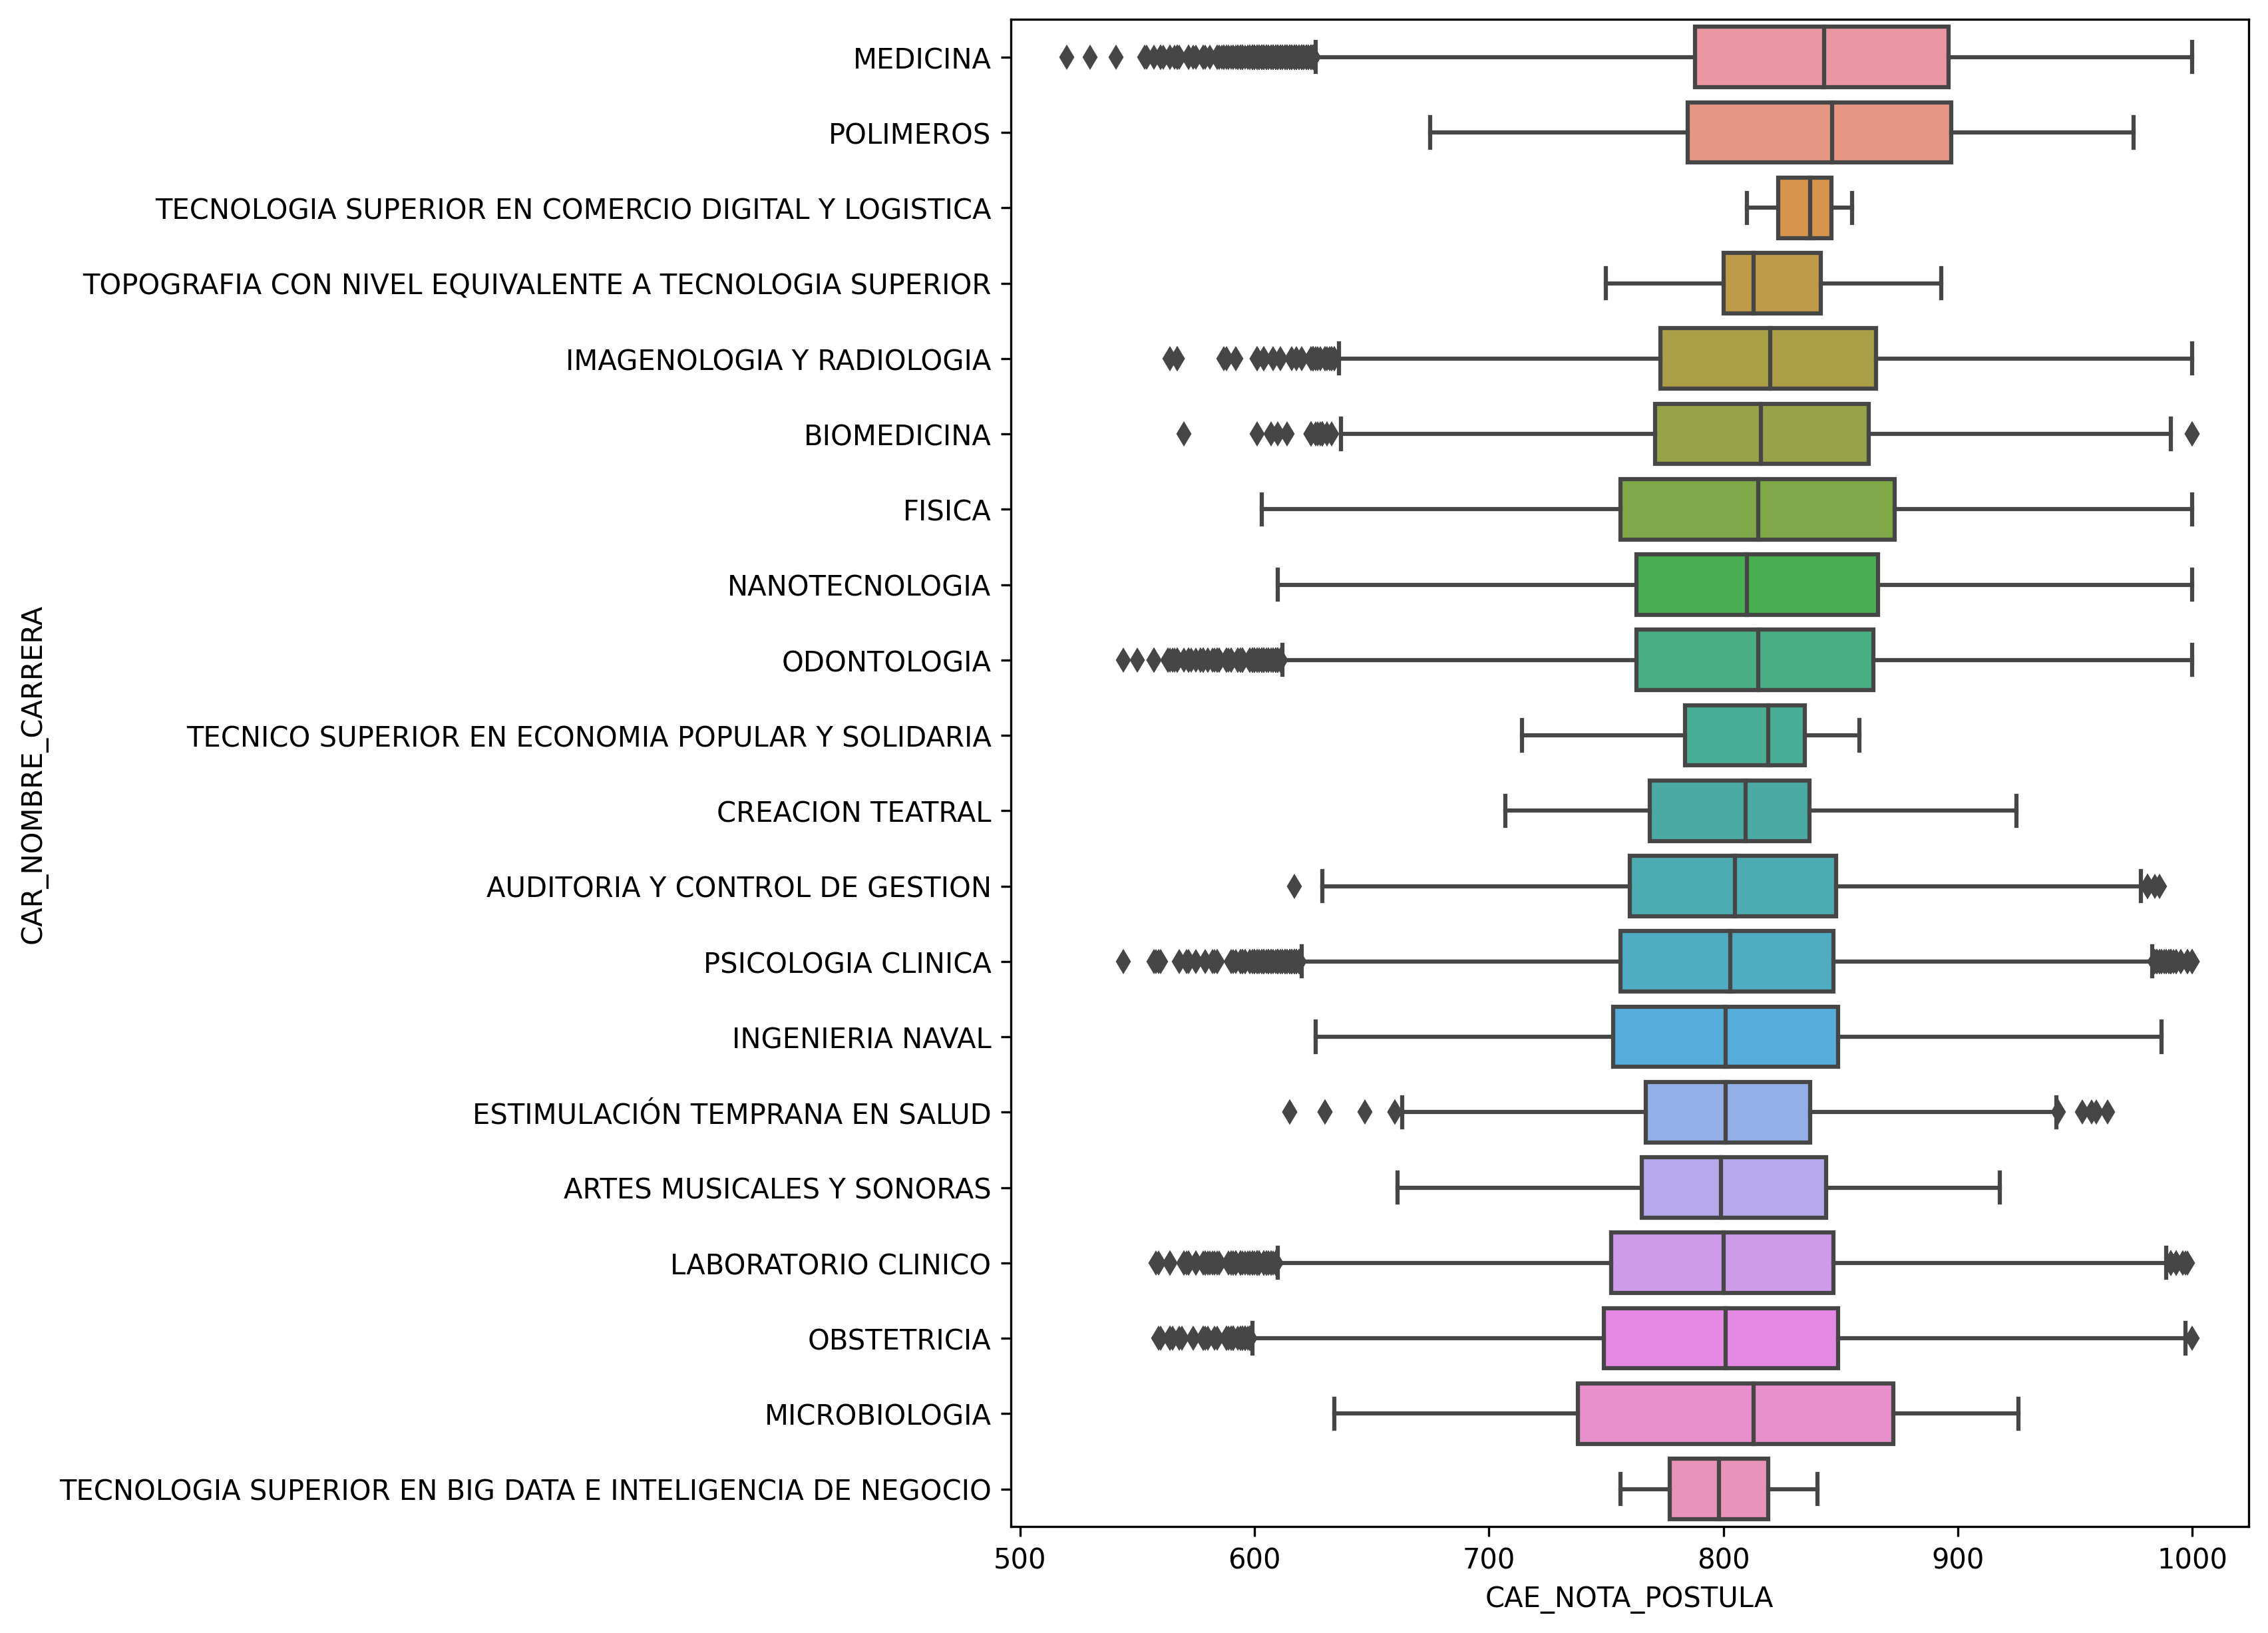

In [47]:
# Grafica boxplot de CAE_NOTA_POSTULA por CAR_NOMBRE_CARRERA, top 20 ordeado pro promedio de CAE_NOTA_POSTULA
plt.figure(figsize=(8,10))
sns.boxplot(y='CAR_NOMBRE_CARRERA', x='CAE_NOTA_POSTULA', data=postulaciones, order=carreras.iloc[:20].index)
plt.show()


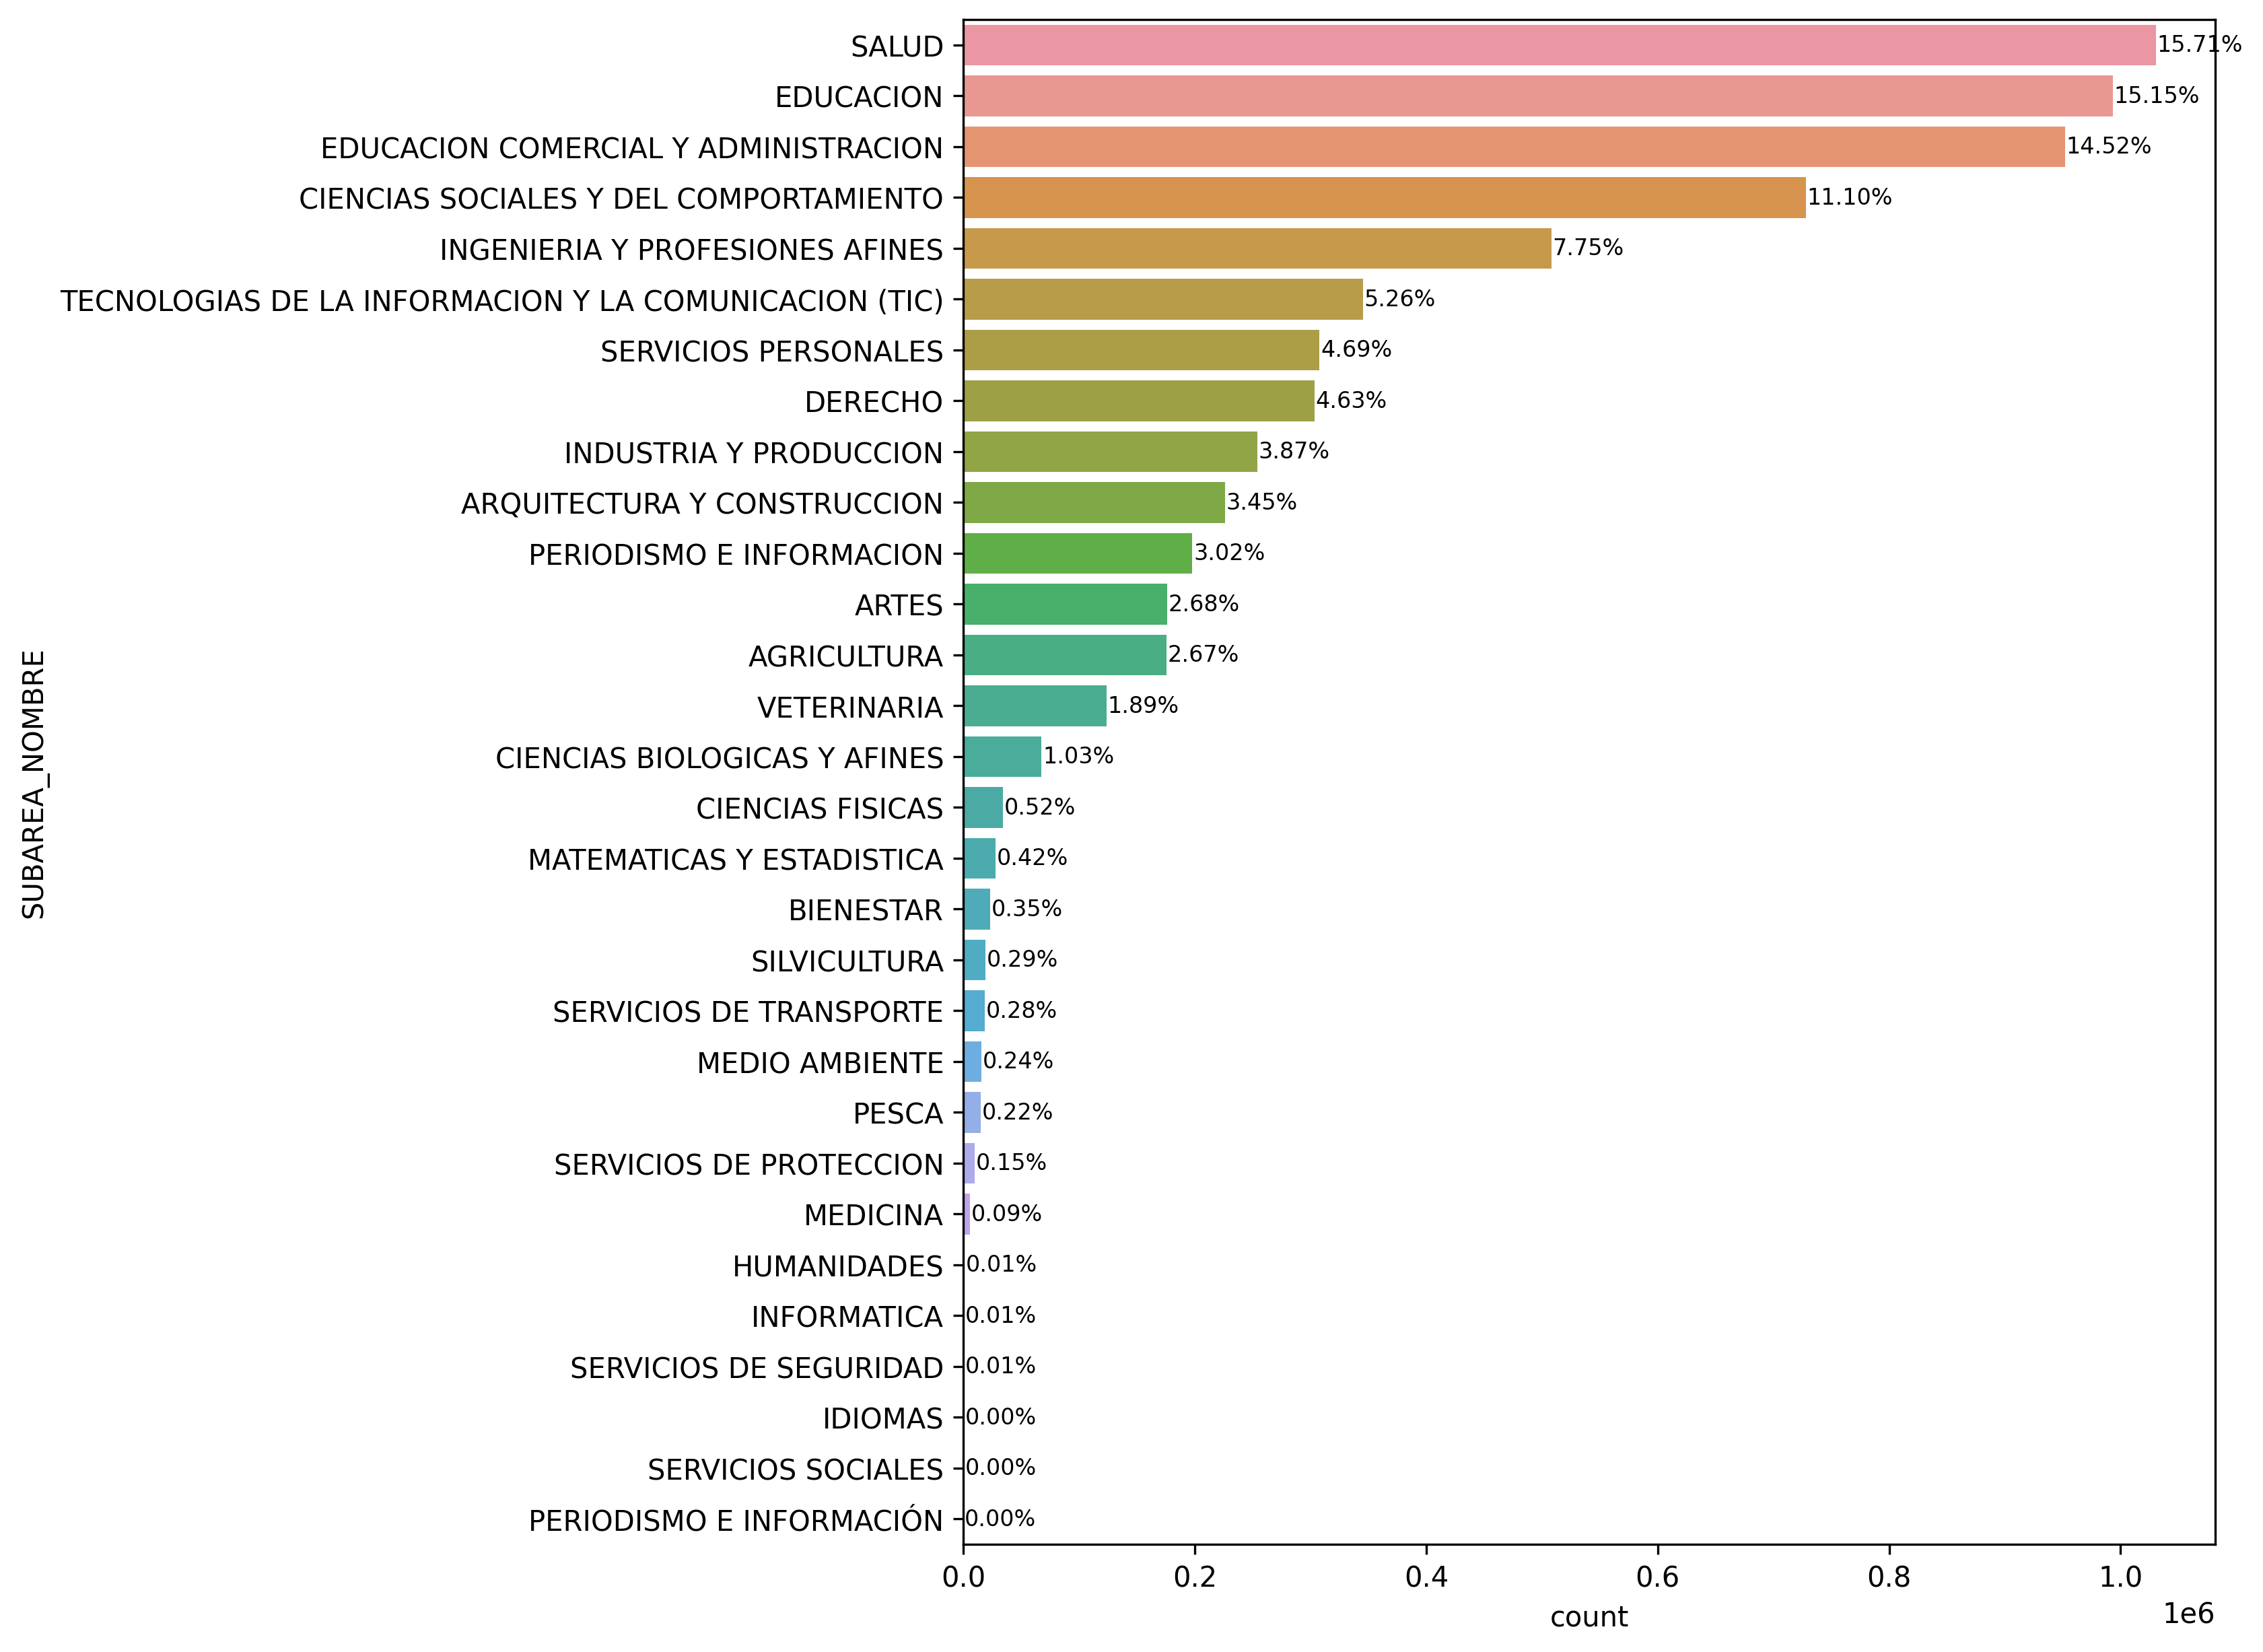

In [48]:
# Grafica el top 30 cantidad de postulaciones por SUBAREA_NOMBRE
plt.figure(figsize=(8,10))
sns.countplot(y='SUBAREA_NOMBRE', data=postulaciones, order=postulaciones['SUBAREA_NOMBRE'].value_counts().iloc[:30].index)
# Incluye el porcentaje de postulaciones por subarea en el nombre de la subarea
for p in plt.gca().patches:
    plt.gca().text(p.get_width() + 1000, p.get_y() + p.get_height()/2., '{:1.2f}%'.format(p.get_width()/postulaciones.shape[0]*100), 
            fontsize=8, color='black', ha='left', va='center')
plt.show()

In [49]:
# Values of PROVINCIA
postulaciones['PROVINCIA'].value_counts()

GUAYAS                            2157947
PICHINCHA                         1426867
MANABI                             748599
LOS RIOS                           281256
LOJA                               268444
AZUAY                              266810
CHIMBORAZO                         249937
IMBABURA                           233771
EL ORO                             215441
TUNGURAHUA                         210318
COTOPAXI                           127729
SANTA ELENA                        117437
ESMERALDAS                          71609
BOLIVAR                             52324
SANTO DOMINGO DE LOS TSACHILAS      44262
CARCHI                              23010
CAÑAR                               19743
PASTAZA                             14558
NAPO                                10062
MORONA SANTIAGO                      5347
ORELLANA                             5309
SUCUMBIOS                            5254
ZAMORA CHINCHIPE                     2177
GALAPAGOS                         

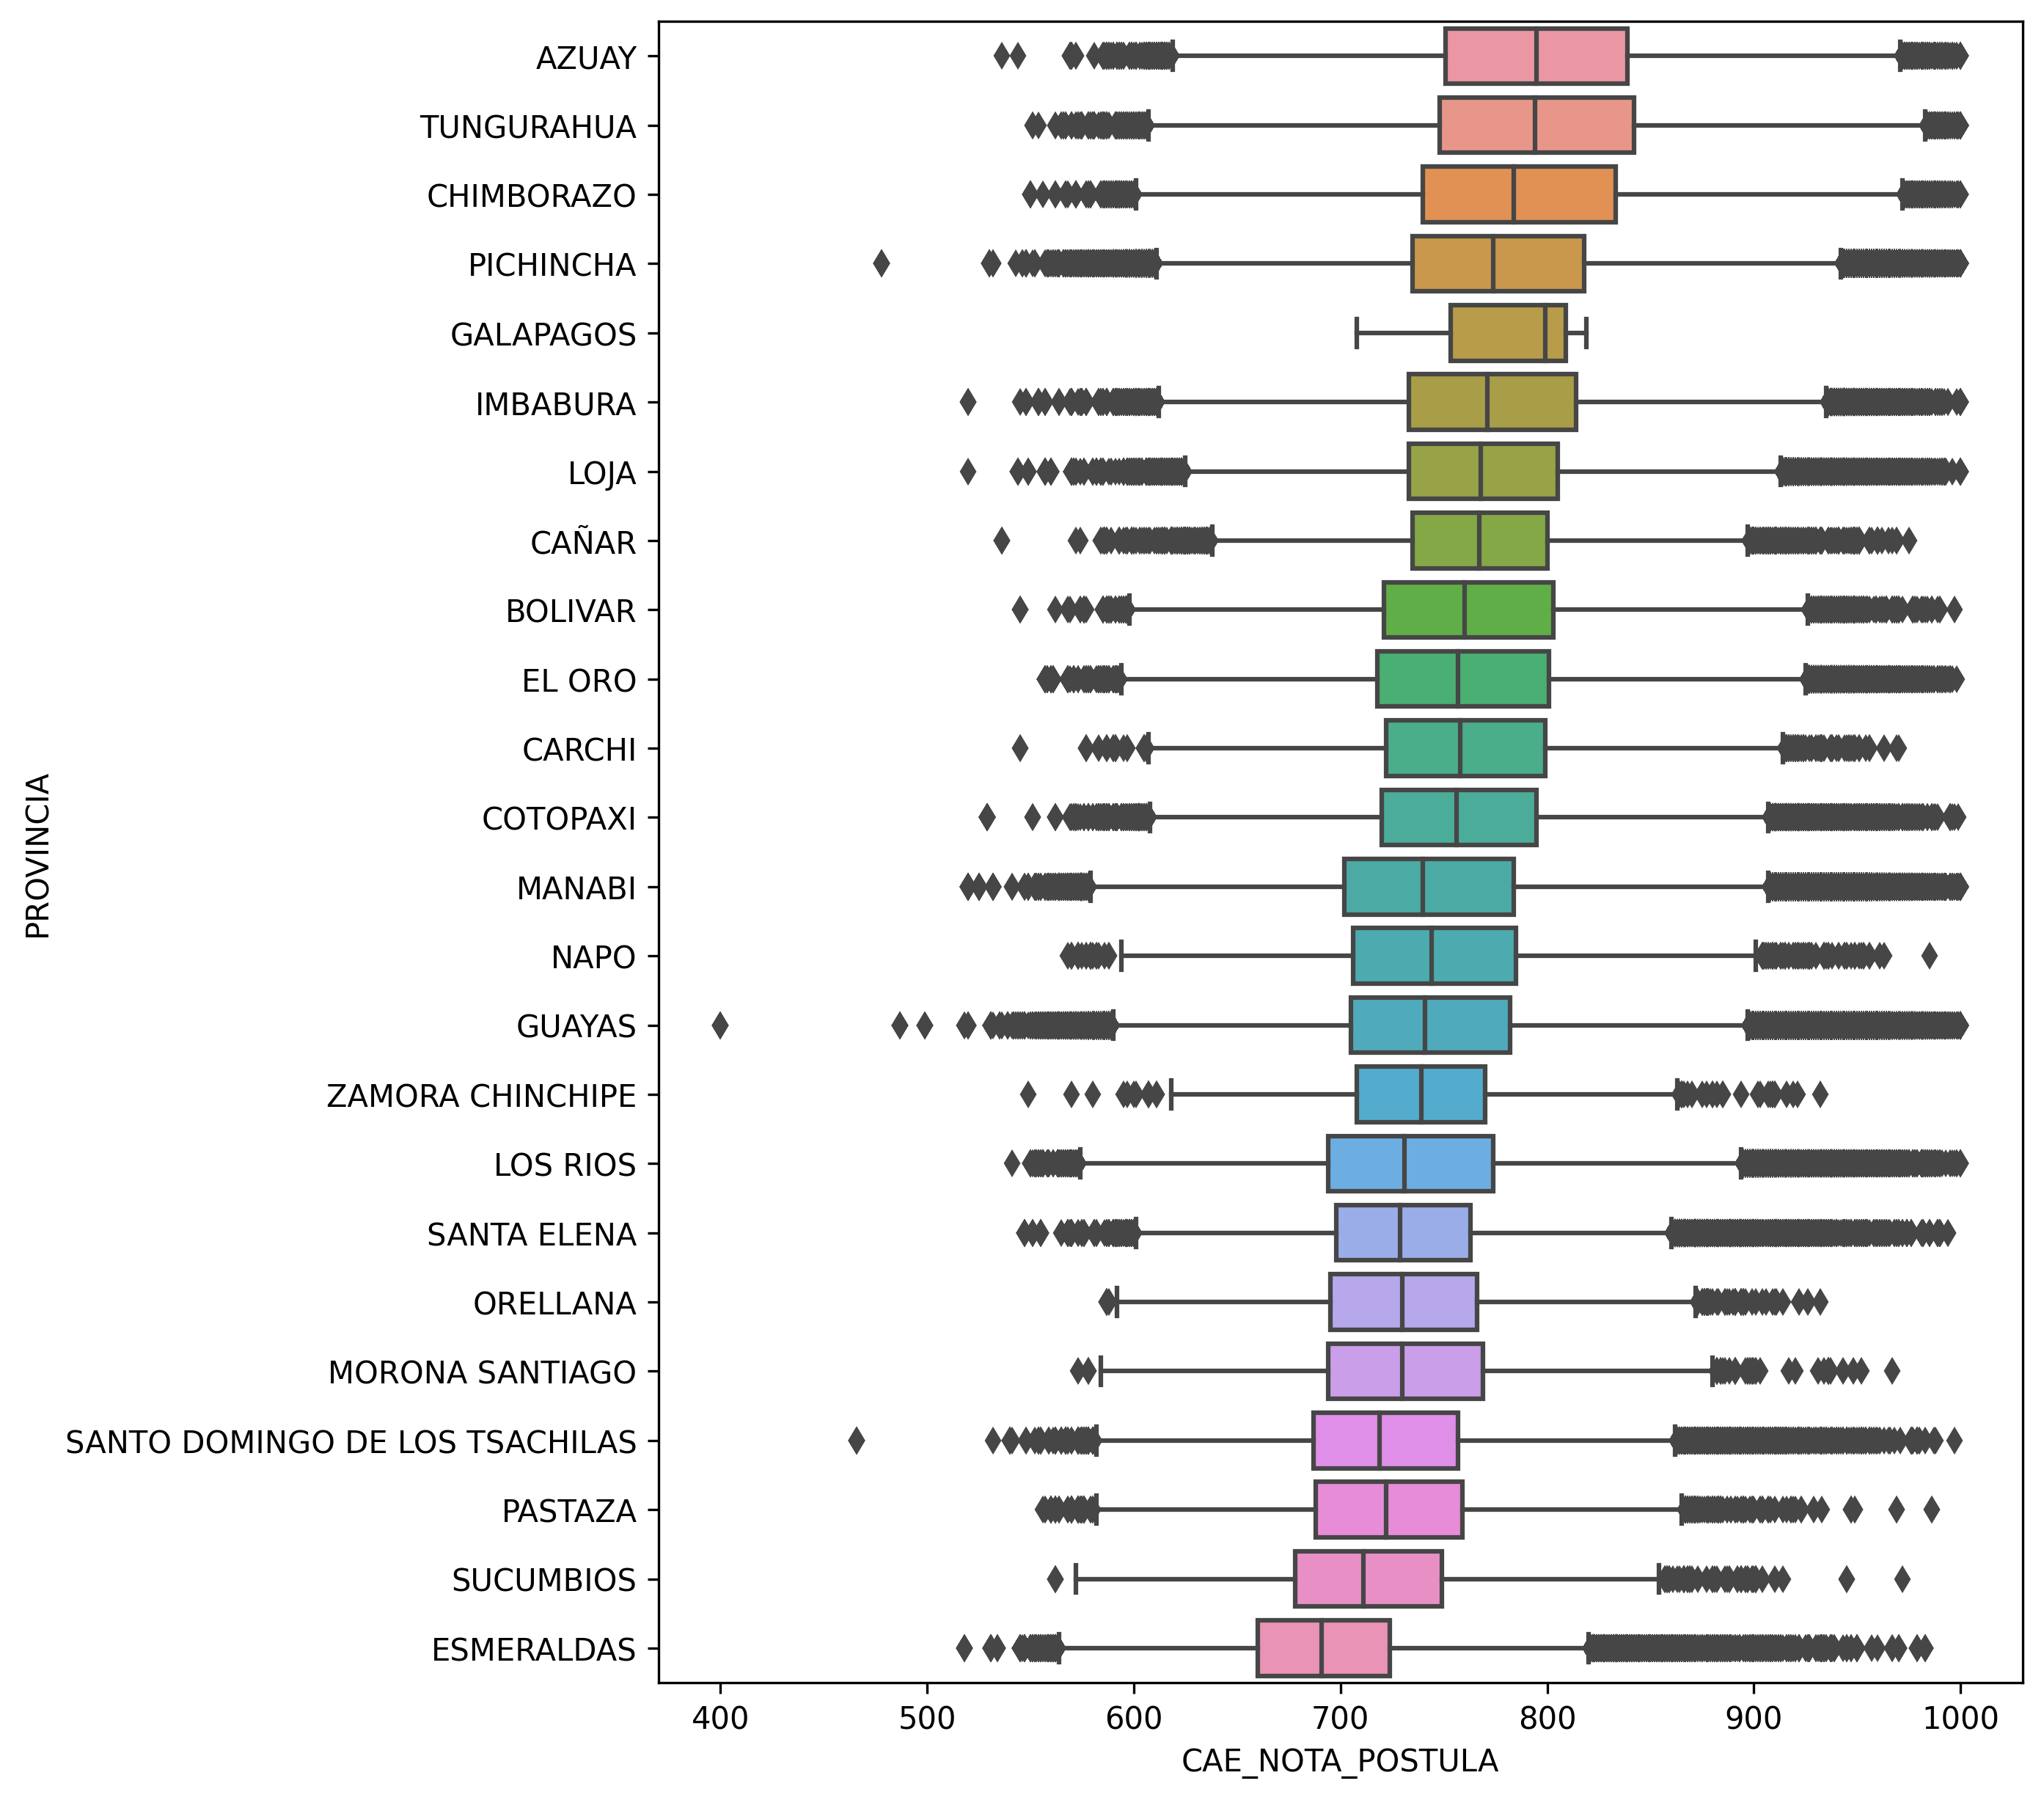

In [50]:
# provincias ordenada por cae_nota_postula
provincias = postulaciones.groupby('PROVINCIA')['CAE_NOTA_POSTULA'].describe()
# Boxplot de CAE_NOTA_POSTULA por PROVINCIA
plt.figure(figsize=(8,10))
sns.boxplot(y='PROVINCIA', x='CAE_NOTA_POSTULA', data=postulaciones, order=provincias.sort_values(by='mean', ascending=False).index)
plt.show()

In [51]:
# Crea un dataframe con las provincias, la cantidad de postulaciones y el describe de CAE_NOTA_POSTULA
provincias = postulaciones.groupby('PROVINCIA')['CAE_NOTA_POSTULA'].describe()
# count_percent es el porcentaje de postulaciones por provincia
provincias['count_percent'] = provincias['count'] / provincias['count'].sum() * 100
# Ordena las provincias por la cantidad de postulaciones
provincias = provincias.sort_values(by='count', ascending=False)
provincias



count        mean        std    min  \
PROVINCIA                                                                 
GUAYAS                          2157947.0  745.923013  61.098457  400.0   
PICHINCHA                       1426867.0  777.730331  62.014947  478.0   
MANABI                           748599.0  746.825863  65.757137  520.0   
LOS RIOS                         281256.0  737.187306  63.411502  541.0   
LOJA                             268444.0  771.657560  57.273240  520.0   
AZUAY                            266810.0  795.830138  62.469204  536.0   
CHIMBORAZO                       249937.0  787.787146  66.619290  550.0   
IMBABURA                         233771.0  775.048586  60.944176  520.0   
EL ORO                           215441.0  762.611016  63.945532  557.0   
TUNGURAHUA                       210318.0  795.767314  67.940032  551.0   
COTOPAXI                         127729.0  758.545029  58.722740  529.0   
SANTA ELENA                      117437.0  734.224163  54.784410  547.0   
ESMERALDAS                        71609.0  694.224776  54.346063  518.0   
BOLIVAR                           52324.0  762.678197  59.987150  545.0   
SANTO DOMINGO DE LOS TSACHILAS    44262.0  725.117347  58.438991  466.0   
CARCHI                            23010.0  761.231421  57.586765  545.0   
CAÑAR                             19743.0  768.178494  54.119219  536.0   
PASTAZA                           14558.0  723.875738  55.386758  556.0   
NAPO                              10062.0  746.316736  60.864624  568.0   
MORONA SANTIAGO                    5347.0  731.224799  57.812266  573.0   
ORELLANA                           5309.0  731.310981  54.138926  587.0   
SUCUMBIOS                          5254.0  713.892463  55.268747  562.0   
ZAMORA CHINCHIPE                   2177.0  738.460726  49.822751  549.0   
GALAPAGOS                             3.0  775.333333  59.163615  708.0   

                                   25%    50%    75%     max  count_percent  
PROVINCIA                                                                    
GUAYAS                          705.00  741.0  782.0  1000.0      32.904492  
PICHINCHA                       735.00  774.0  818.0  1000.0      21.756945  
MANABI                          702.00  740.0  784.0  1000.0      11.414678  
LOS RIOS                        694.00  731.0  774.0  1000.0       4.288607  
LOJA                            733.00  768.0  805.0  1000.0       4.093249  
AZUAY                           751.00  795.0  839.0  1000.0       4.068333  
CHIMBORAZO                      740.00  784.0  833.0  1000.0       3.811053  
IMBABURA                        733.00  771.0  814.0  1000.0       3.564553  
EL ORO                          718.00  757.0  801.0   998.0       3.285056  
TUNGURAHUA                      748.00  794.0  842.0  1000.0       3.206940  
COTOPAXI                        720.00  756.0  795.0   999.0       1.947619  
SANTA ELENA                     698.00  729.0  763.0   994.0       1.790686  
ESMERALDAS                      660.00  691.0  724.0   983.0       1.091898  
BOLIVAR                         721.00  760.0  803.0   997.0       0.797839  
SANTO DOMINGO DE LOS TSACHILAS  687.00  719.0  757.0   997.0       0.674909  
CARCHI                          722.00  758.0  799.0   970.0       0.350858  
CAÑAR                           735.00  767.0  800.0   975.0       0.301042  
PASTAZA                         688.00  722.0  759.0   986.0       0.221981  
NAPO                            706.25  744.0  785.0   985.0       0.153426  
MORONA SANTIAGO                 694.00  730.0  769.0   967.0       0.081531  
ORELLANA                        695.00  730.0  766.0   932.0       0.080952  
SUCUMBIOS                       678.00  711.0  749.0   972.0       0.080113  
ZAMORA CHINCHIPE                708.00  739.0  770.0   932.0       0.033195  
GALAPAGOS                       753.50  799.0  809.0   819.0       0.000046

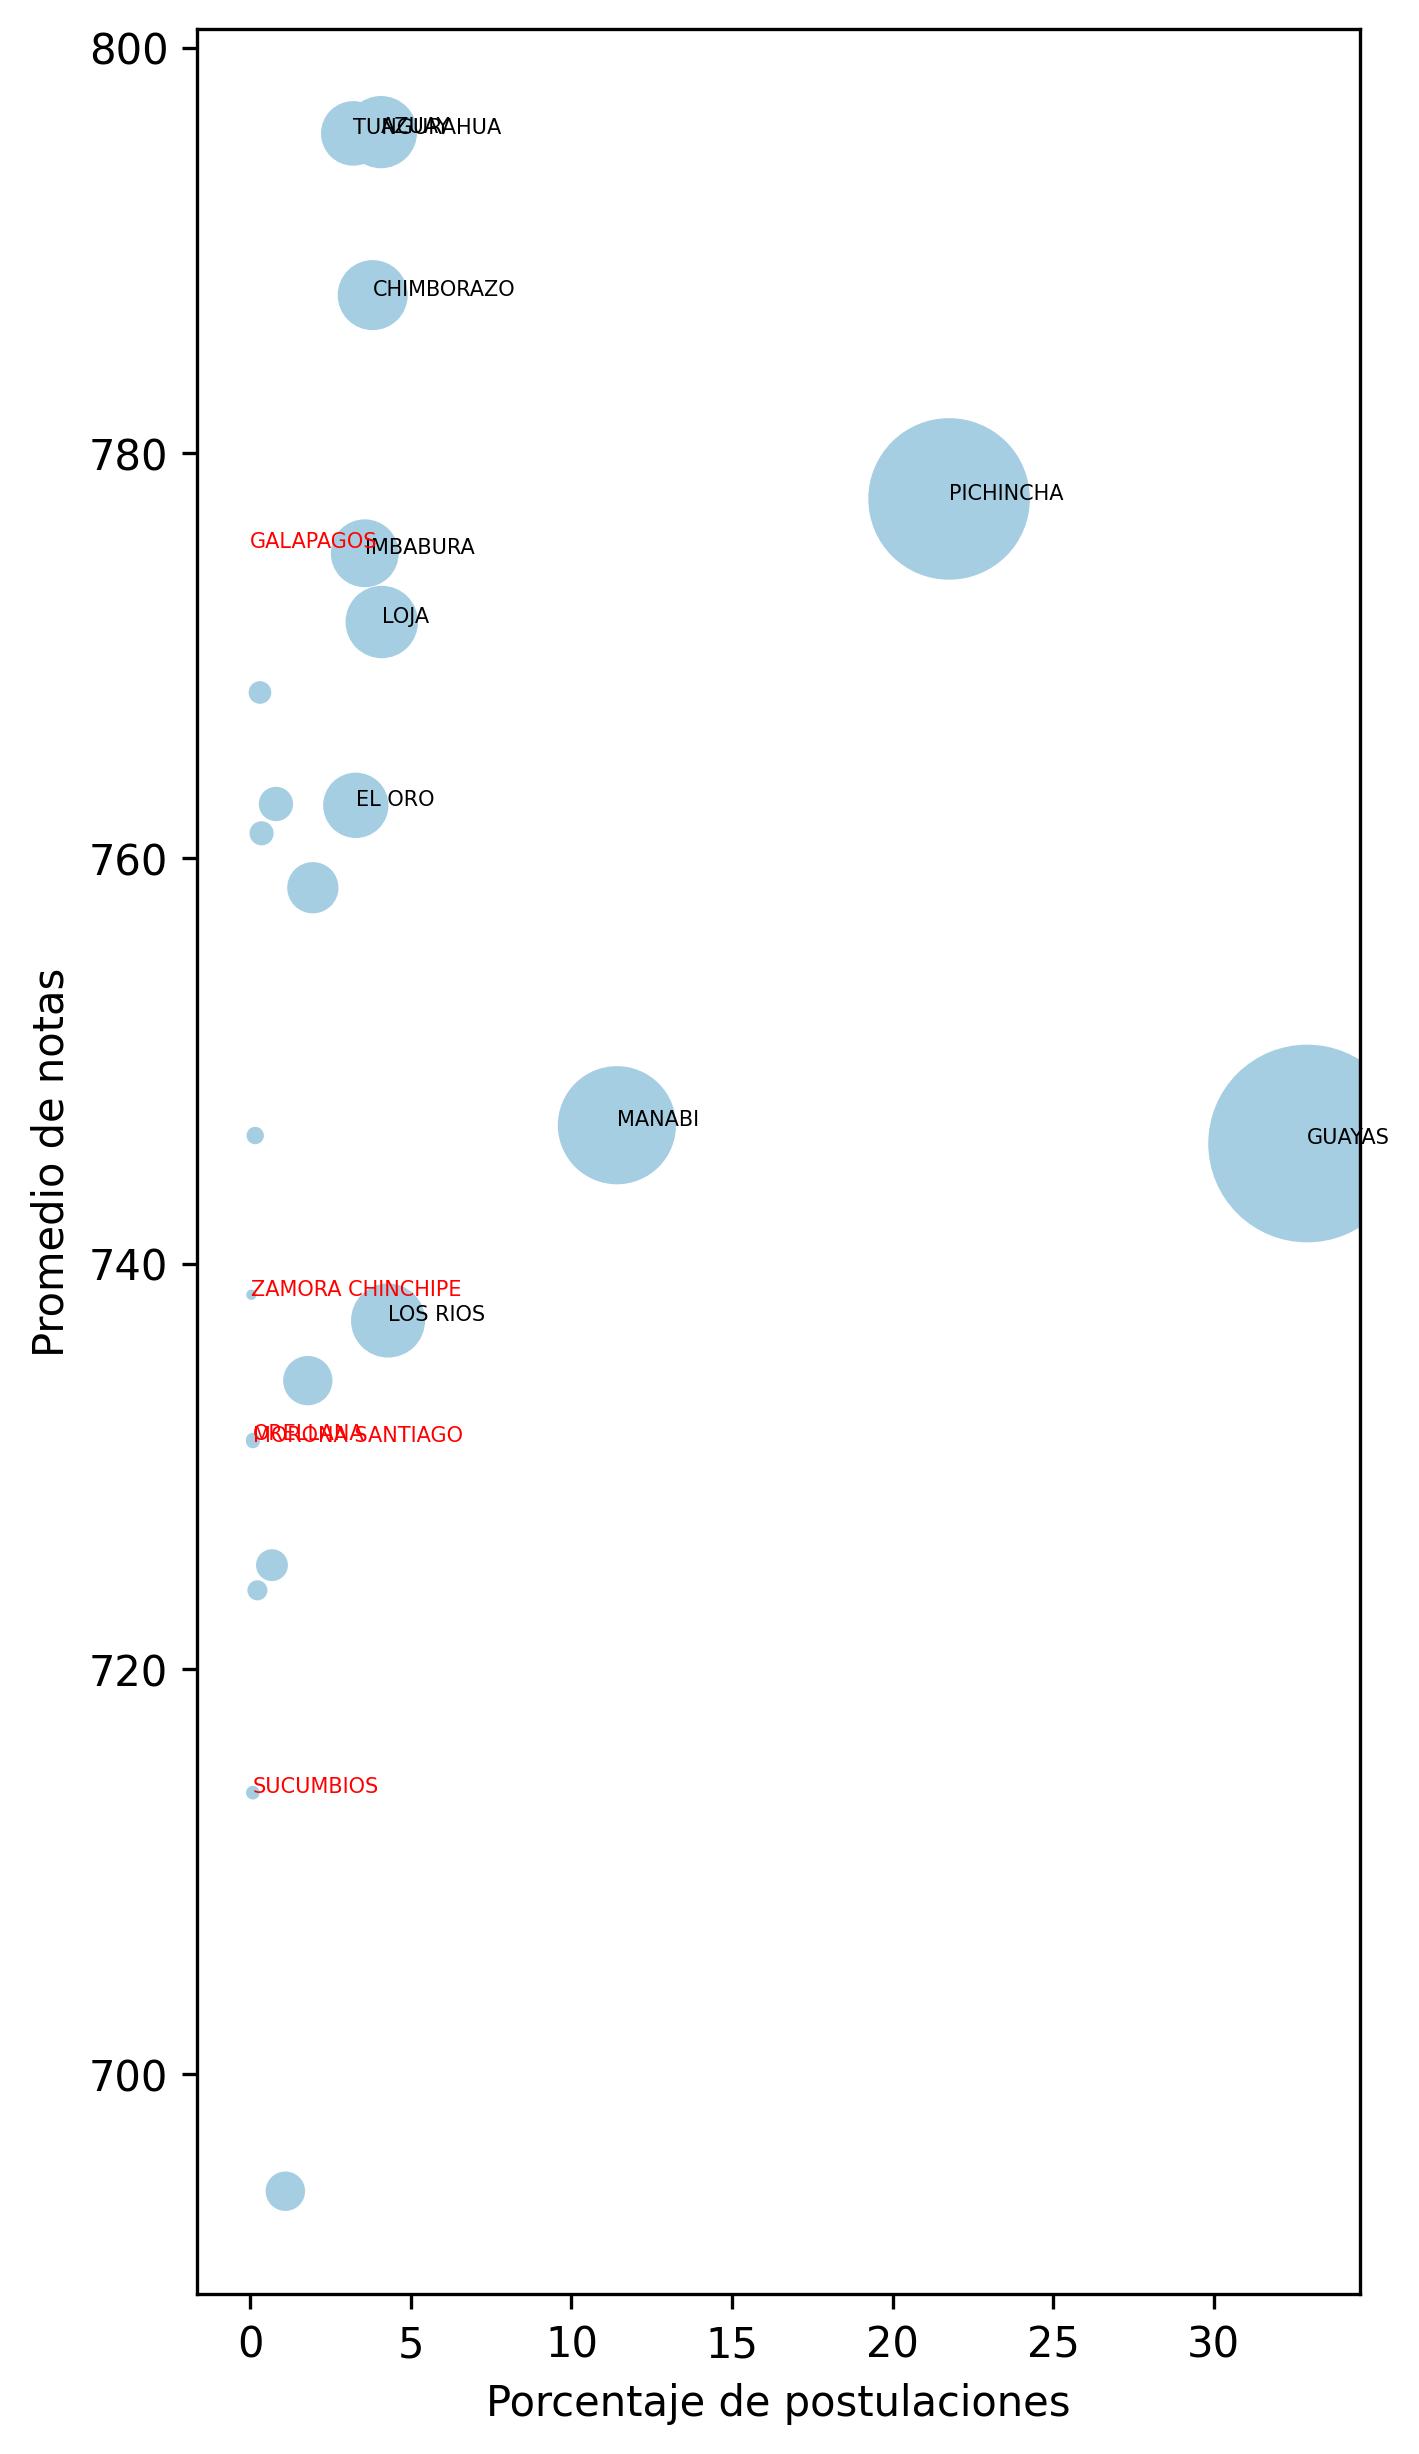

In [52]:
# Scatter plot de count_percent y mean, con el tamaño de los puntos proporcional a la cantidad de postulaciones
plt.figure(figsize=(5,10))
plt.scatter(provincias['count_percent'], provincias['mean'], s=provincias['count']/1000)
plt.xlabel('Porcentaje de postulaciones')
plt.ylabel('Promedio de notas')

for i in provincias.index[:10]:
    plt.text(provincias.loc[i, 'count_percent'], provincias.loc[i, 'mean'], i, fontsize=5)

# en color rojo las 5 provincias con menos postulaciones
for i in provincias.index[-5:]:
    plt.text(provincias.loc[i, 'count_percent'], provincias.loc[i, 'mean'], i, fontsize=5, color='red')


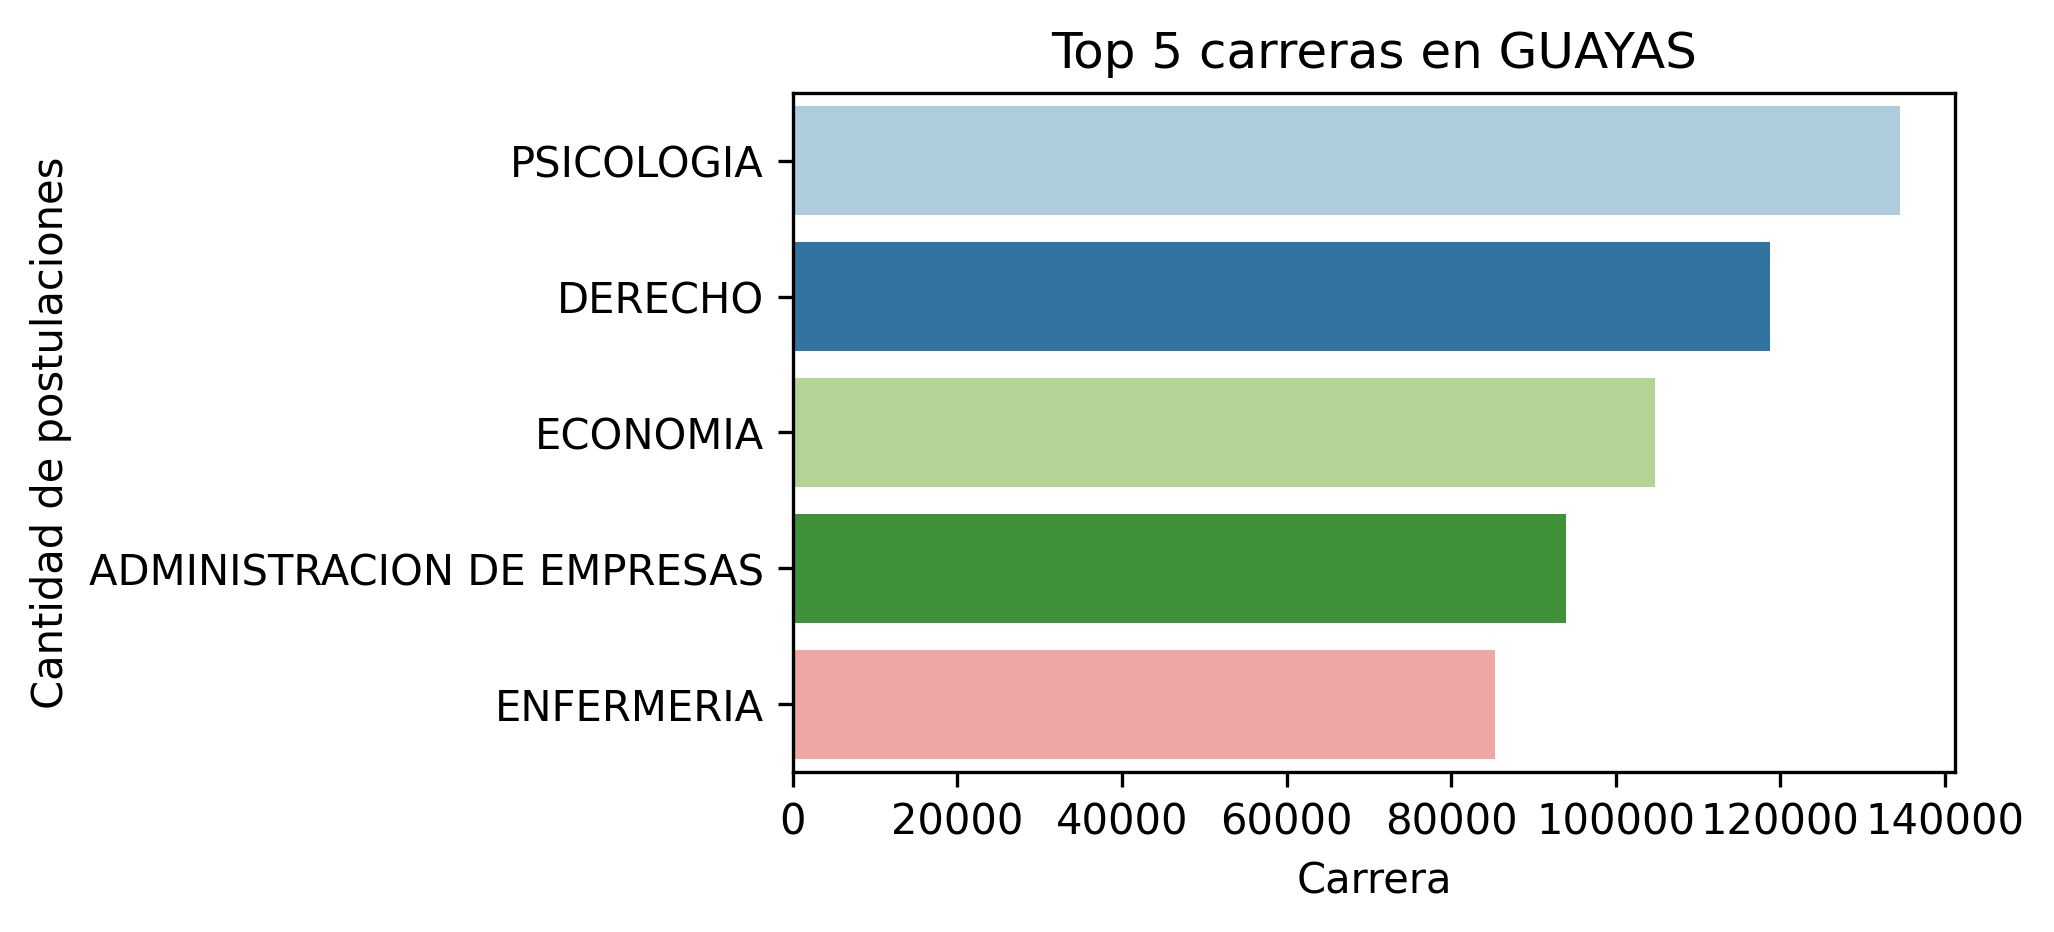

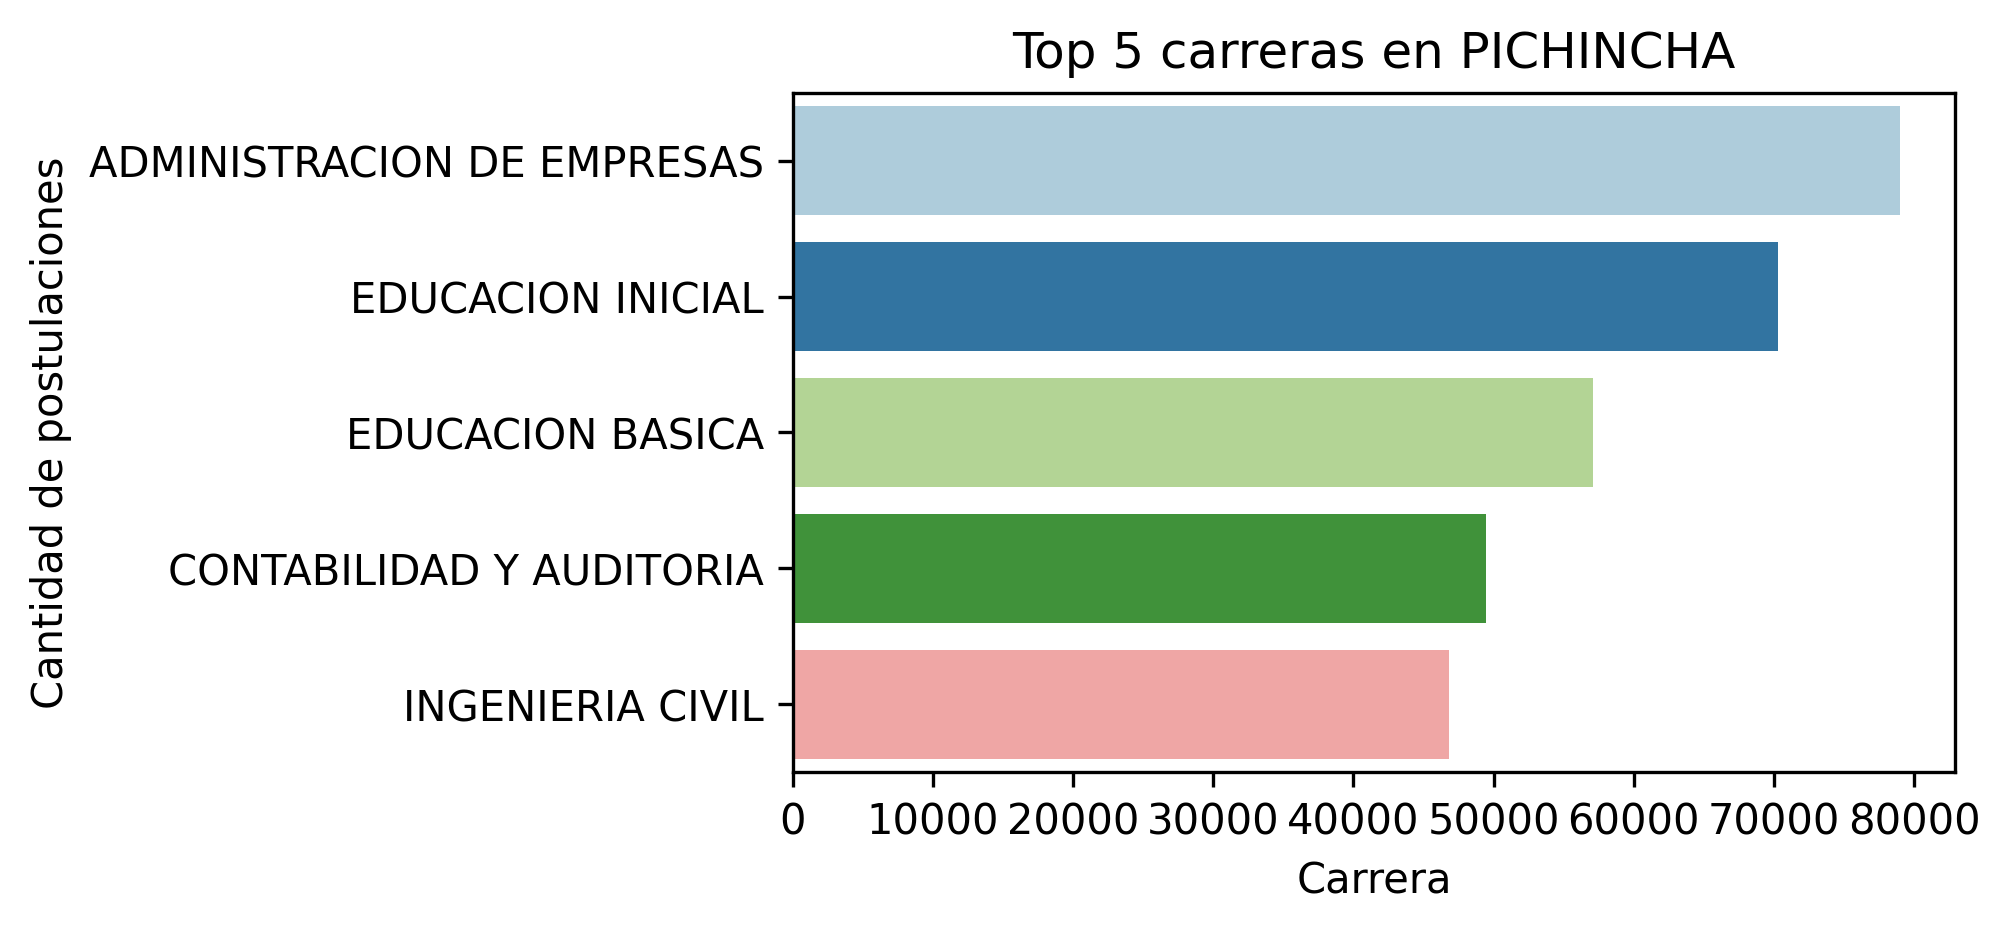

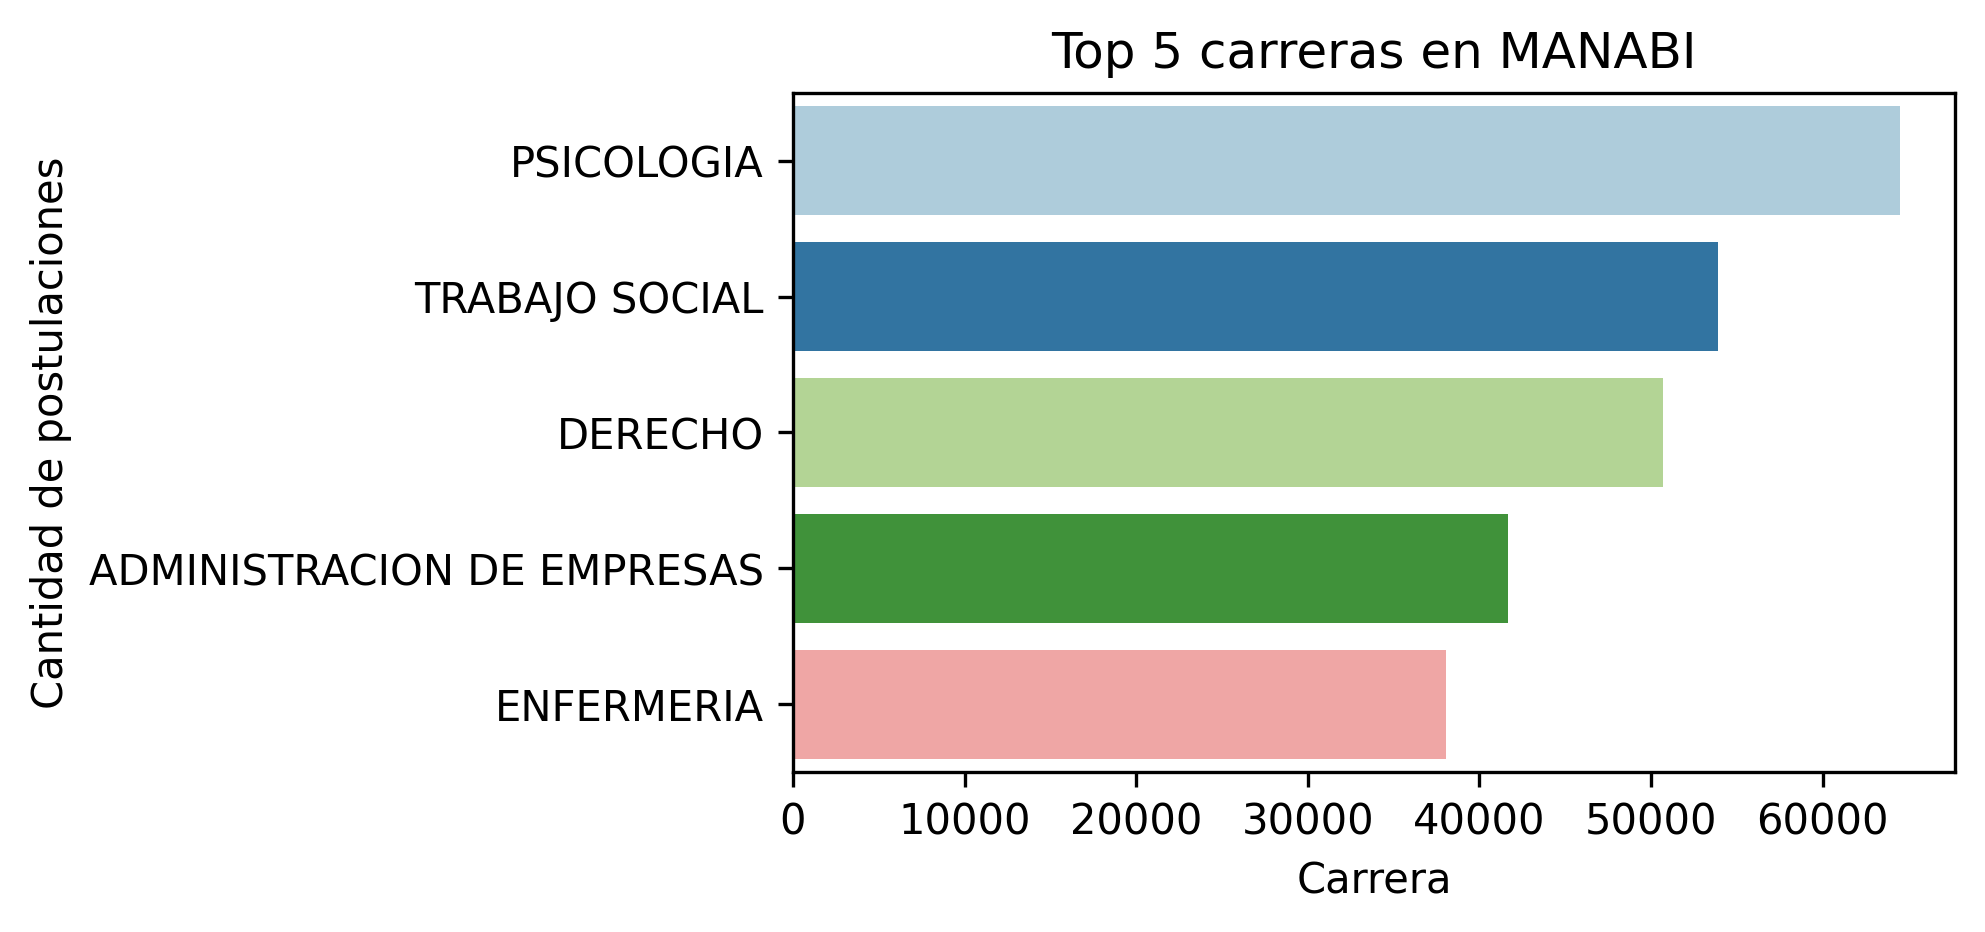

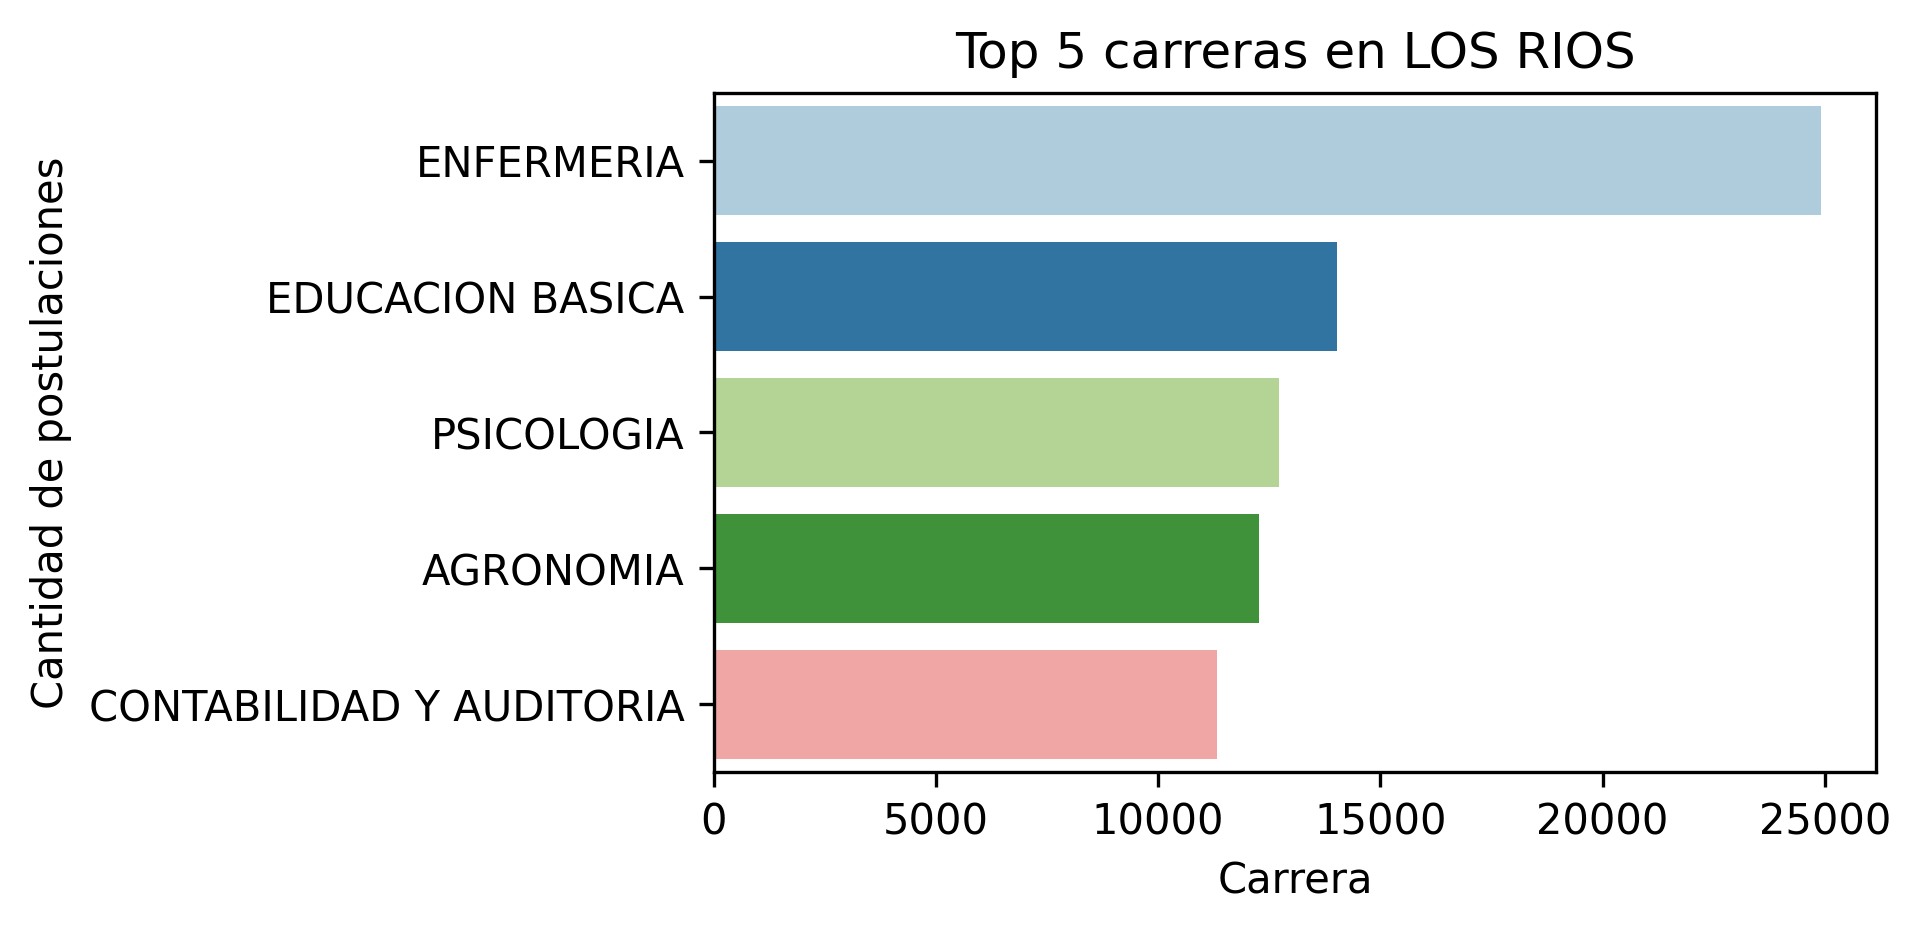

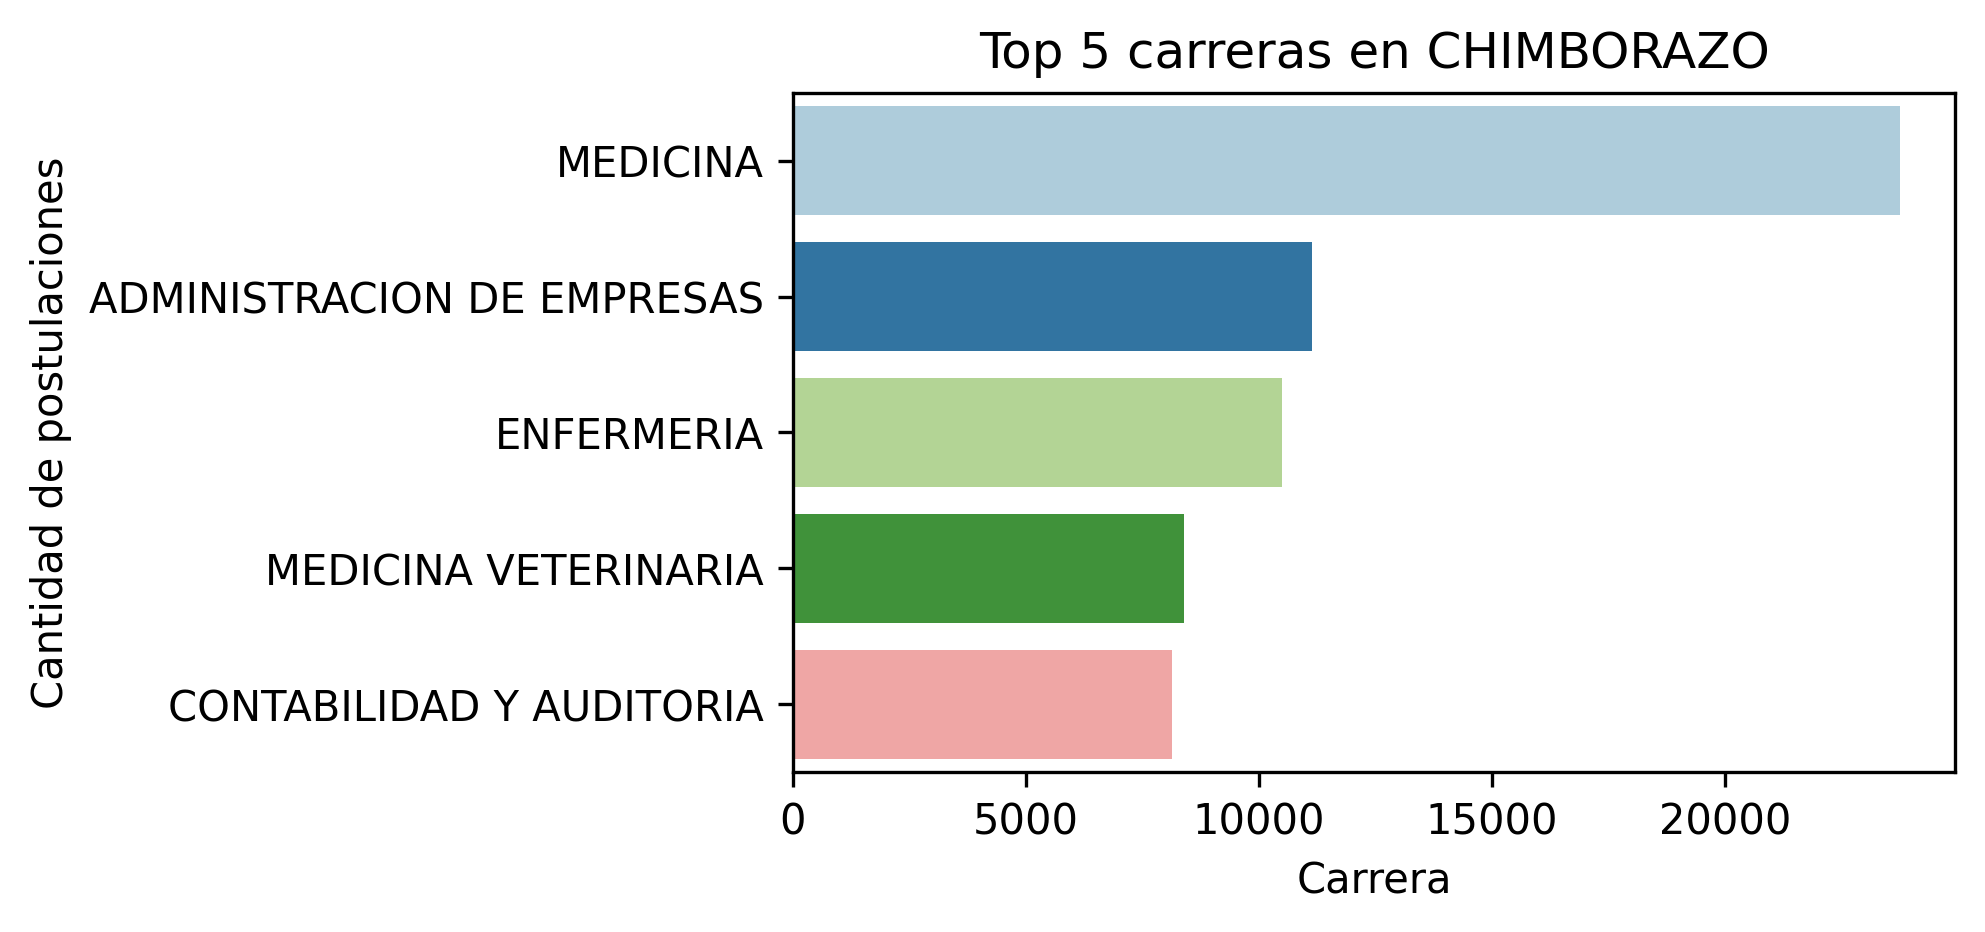

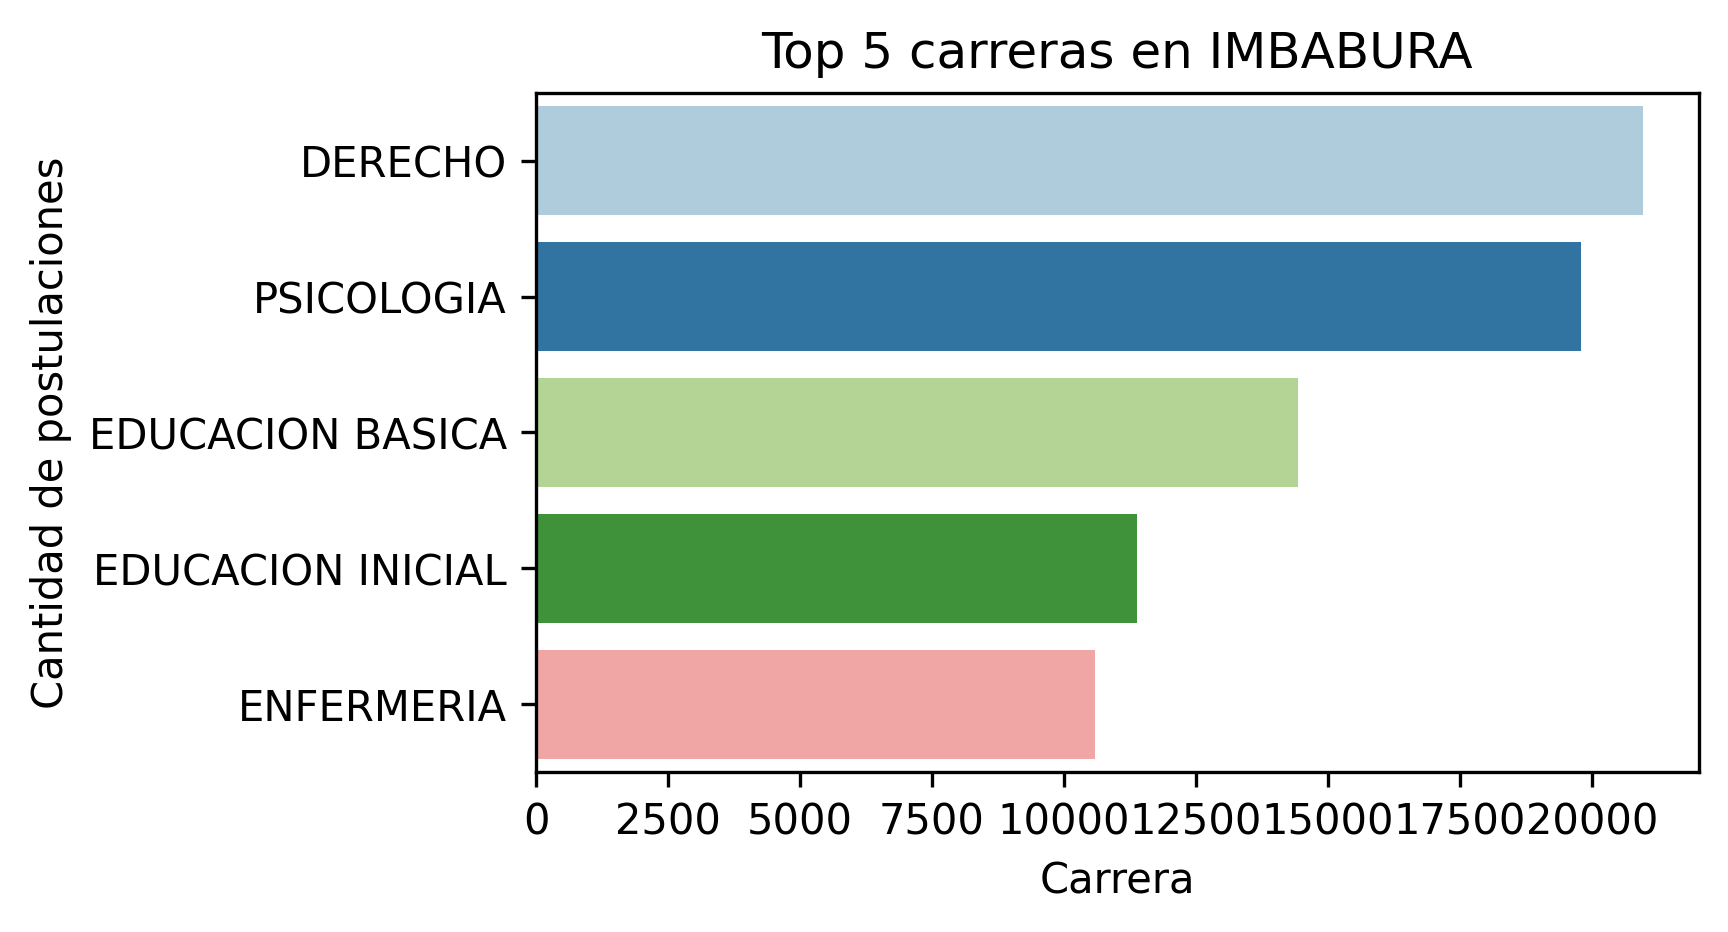

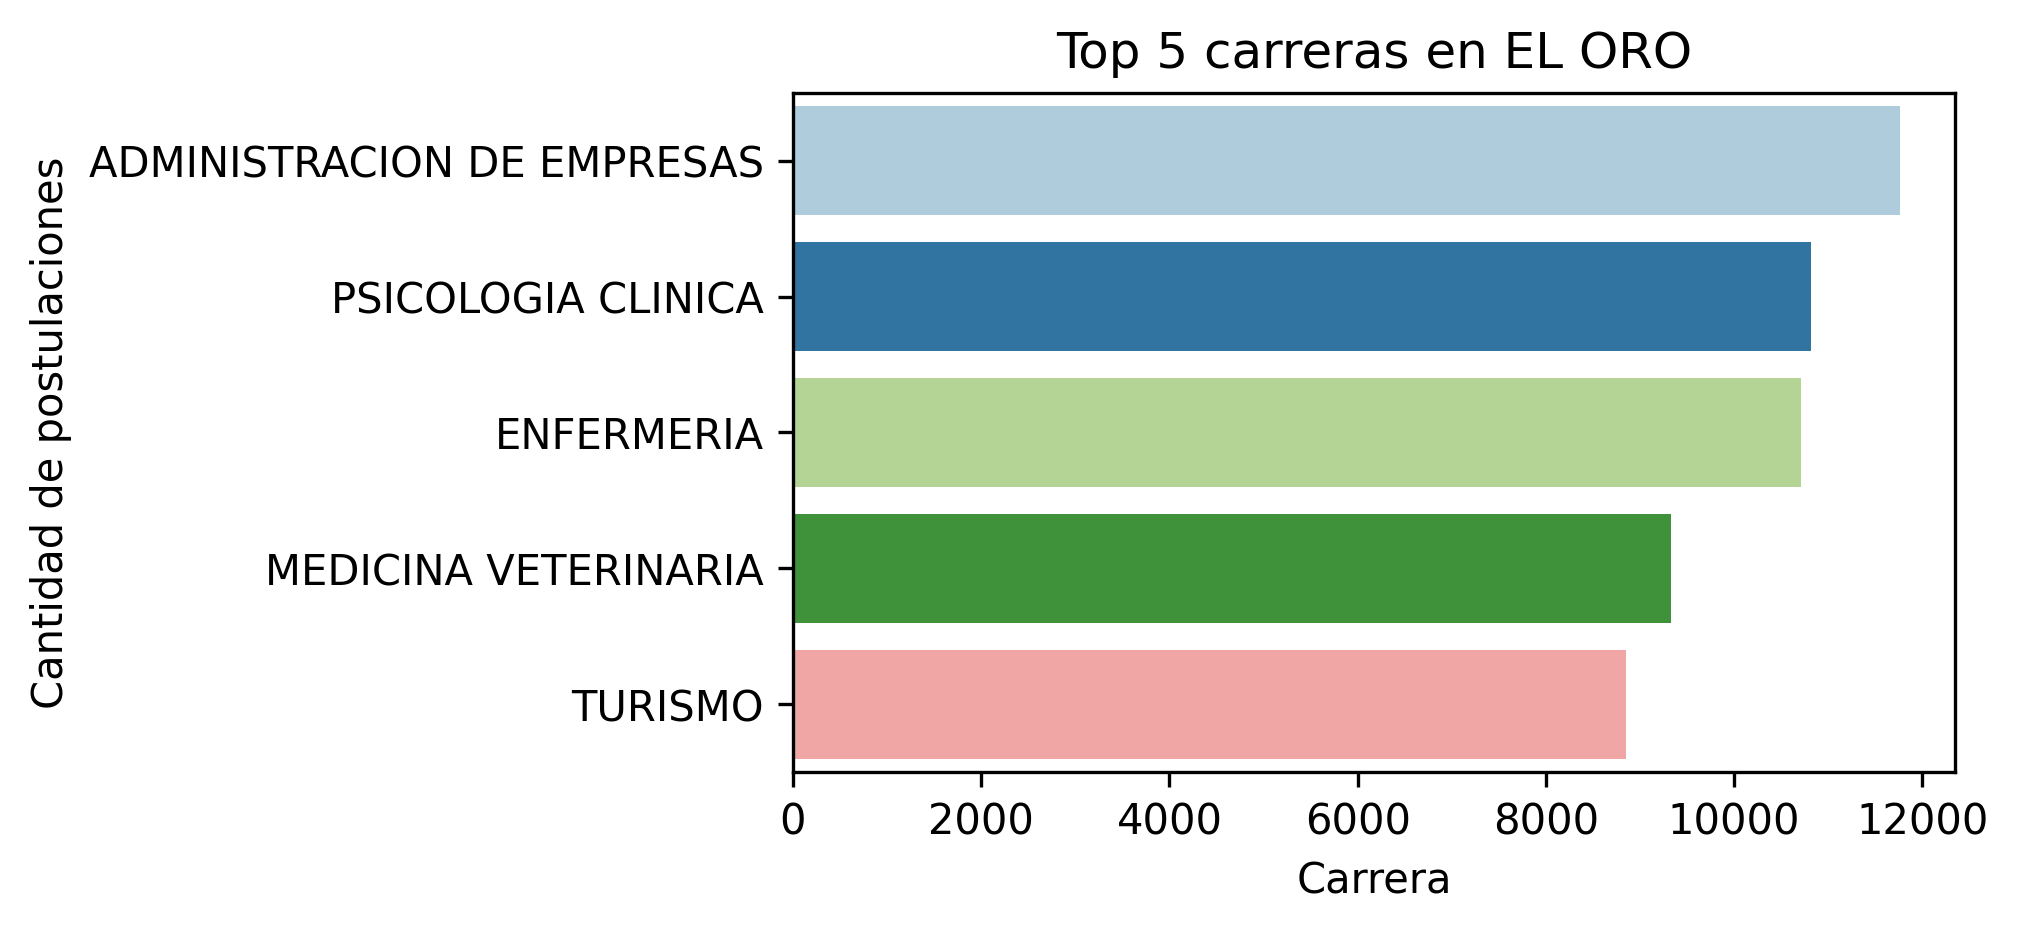

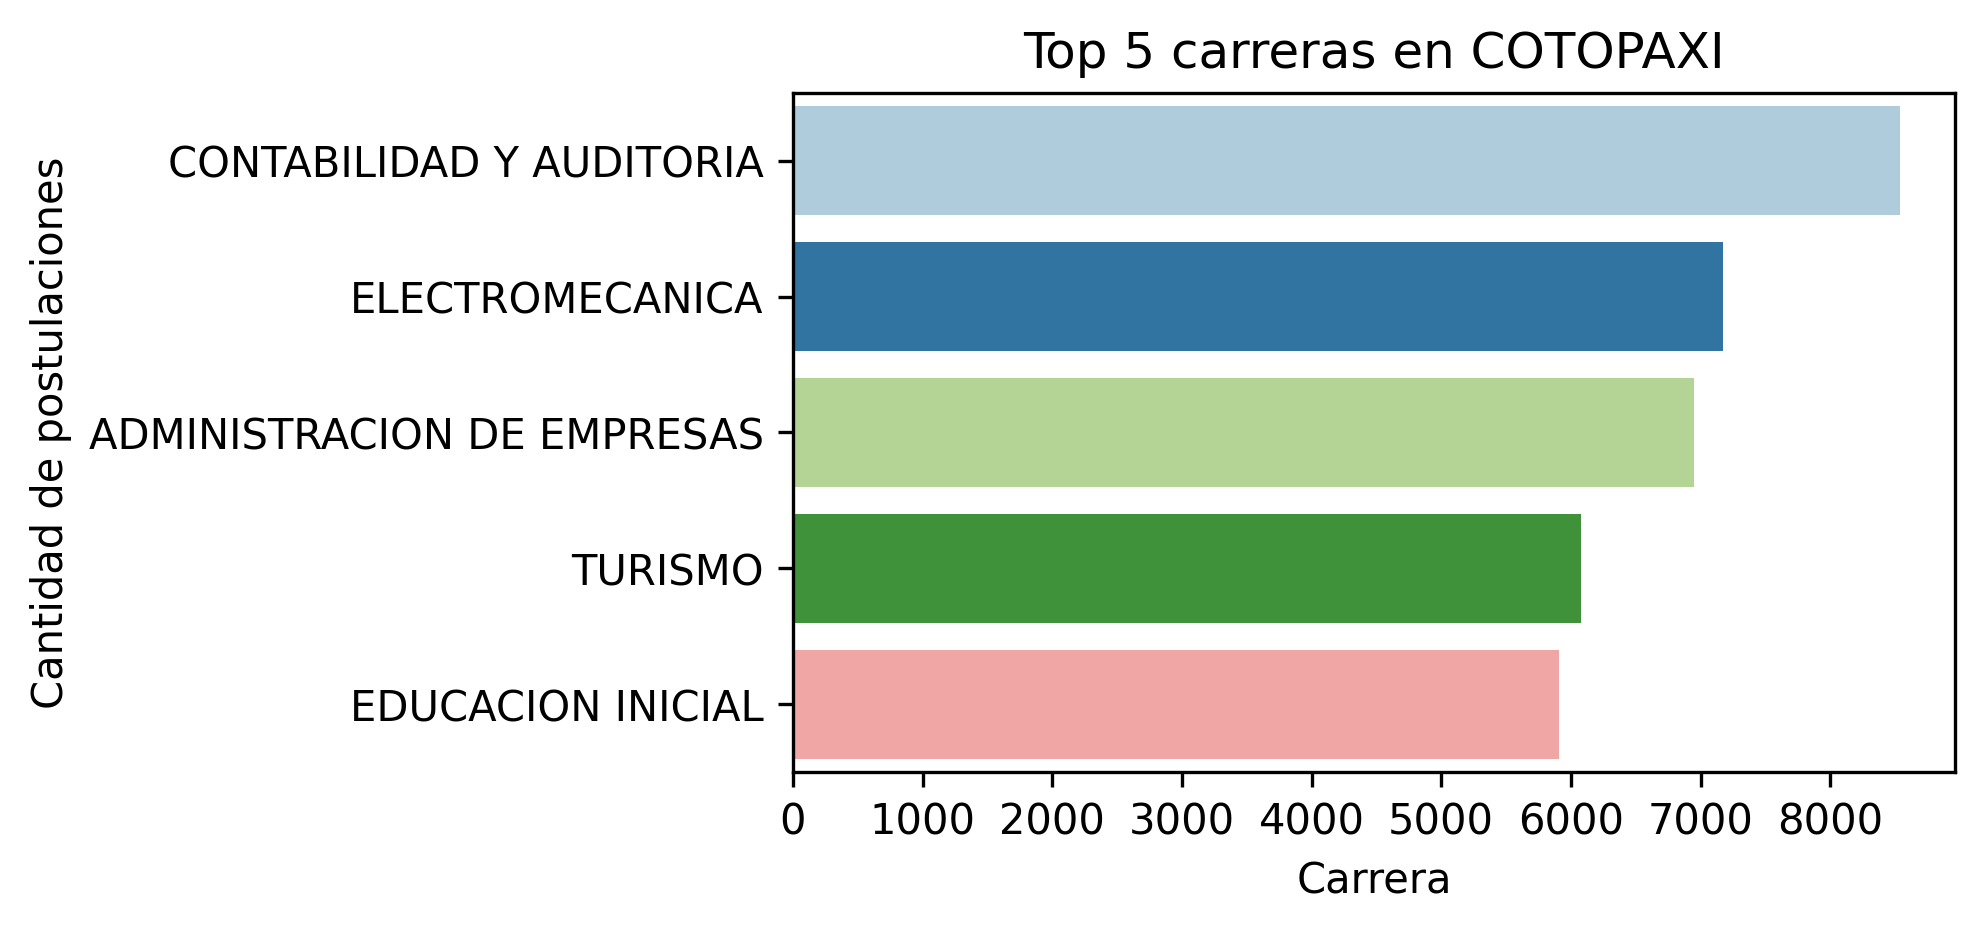

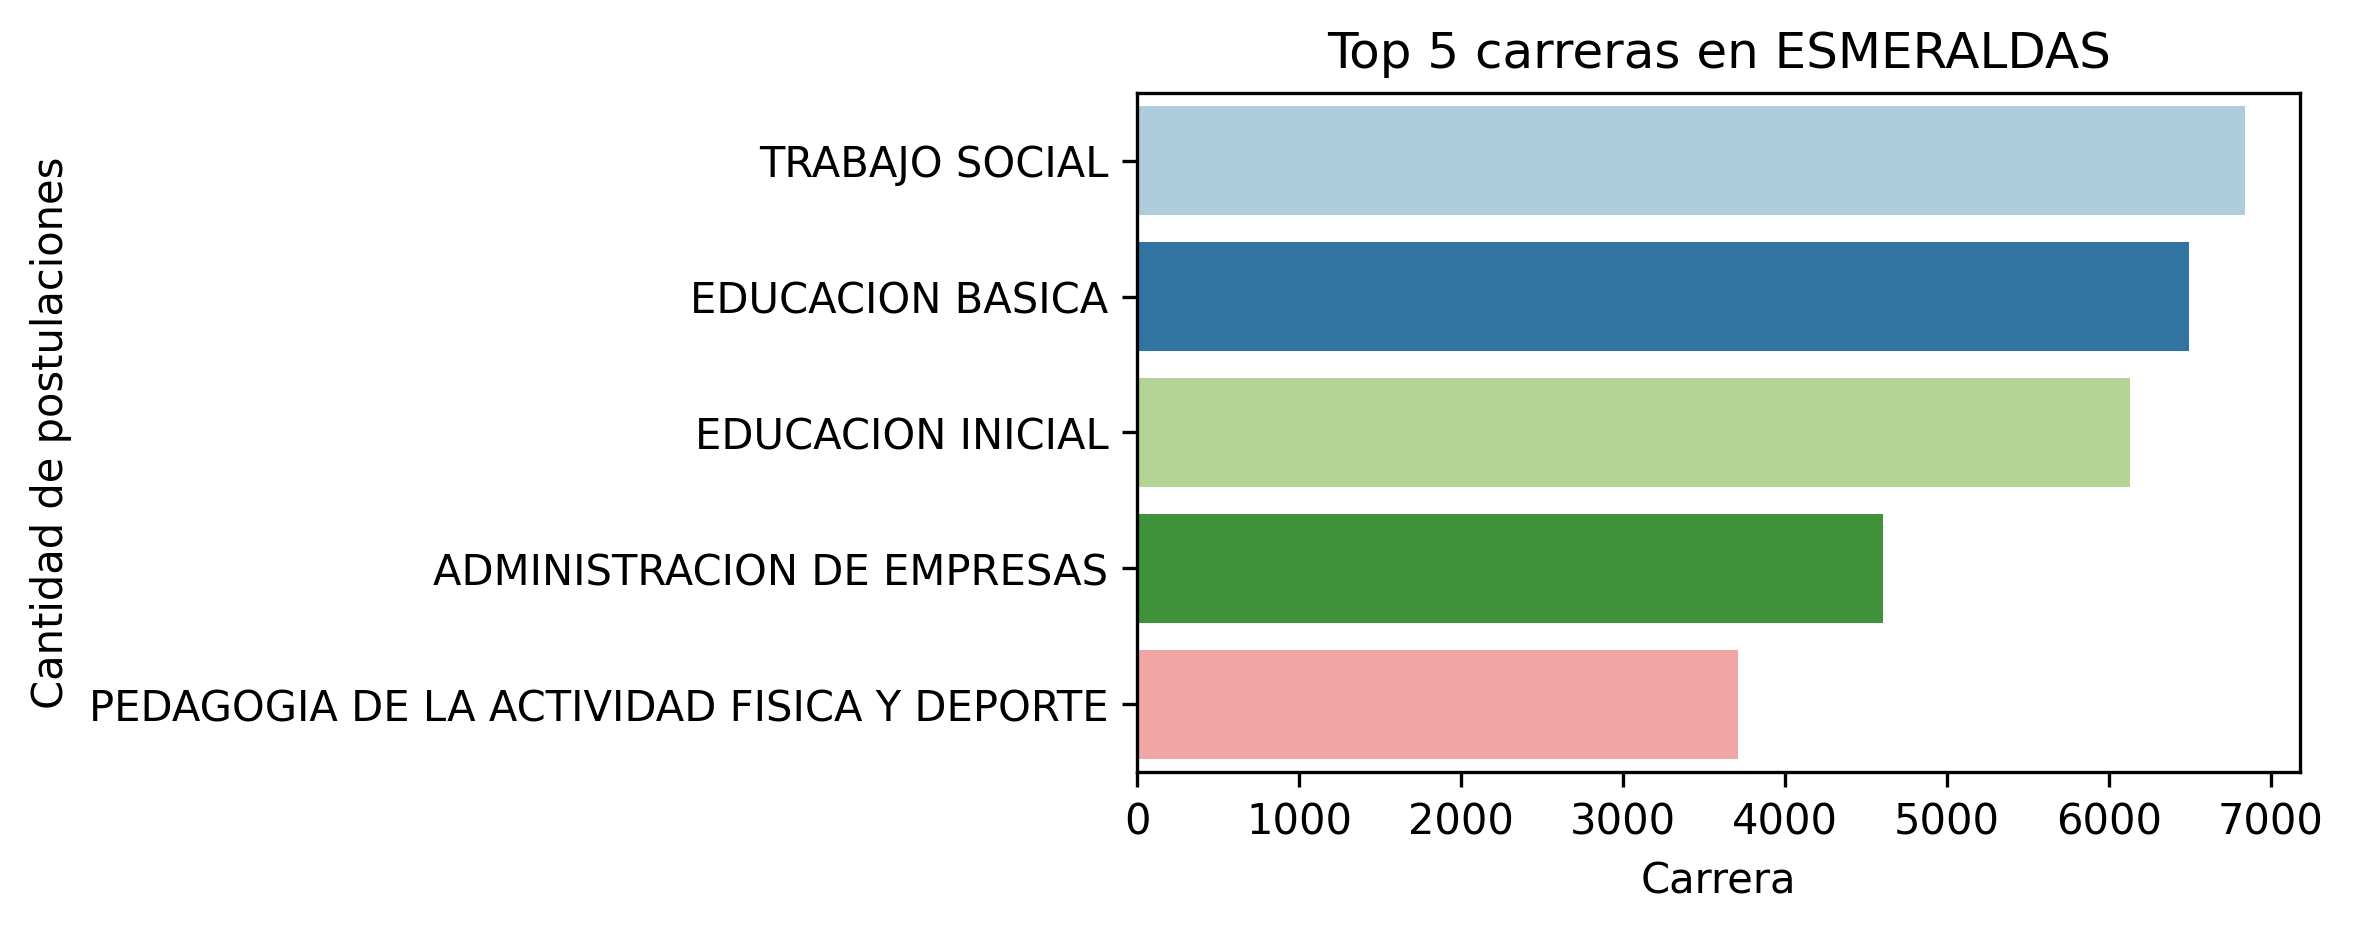

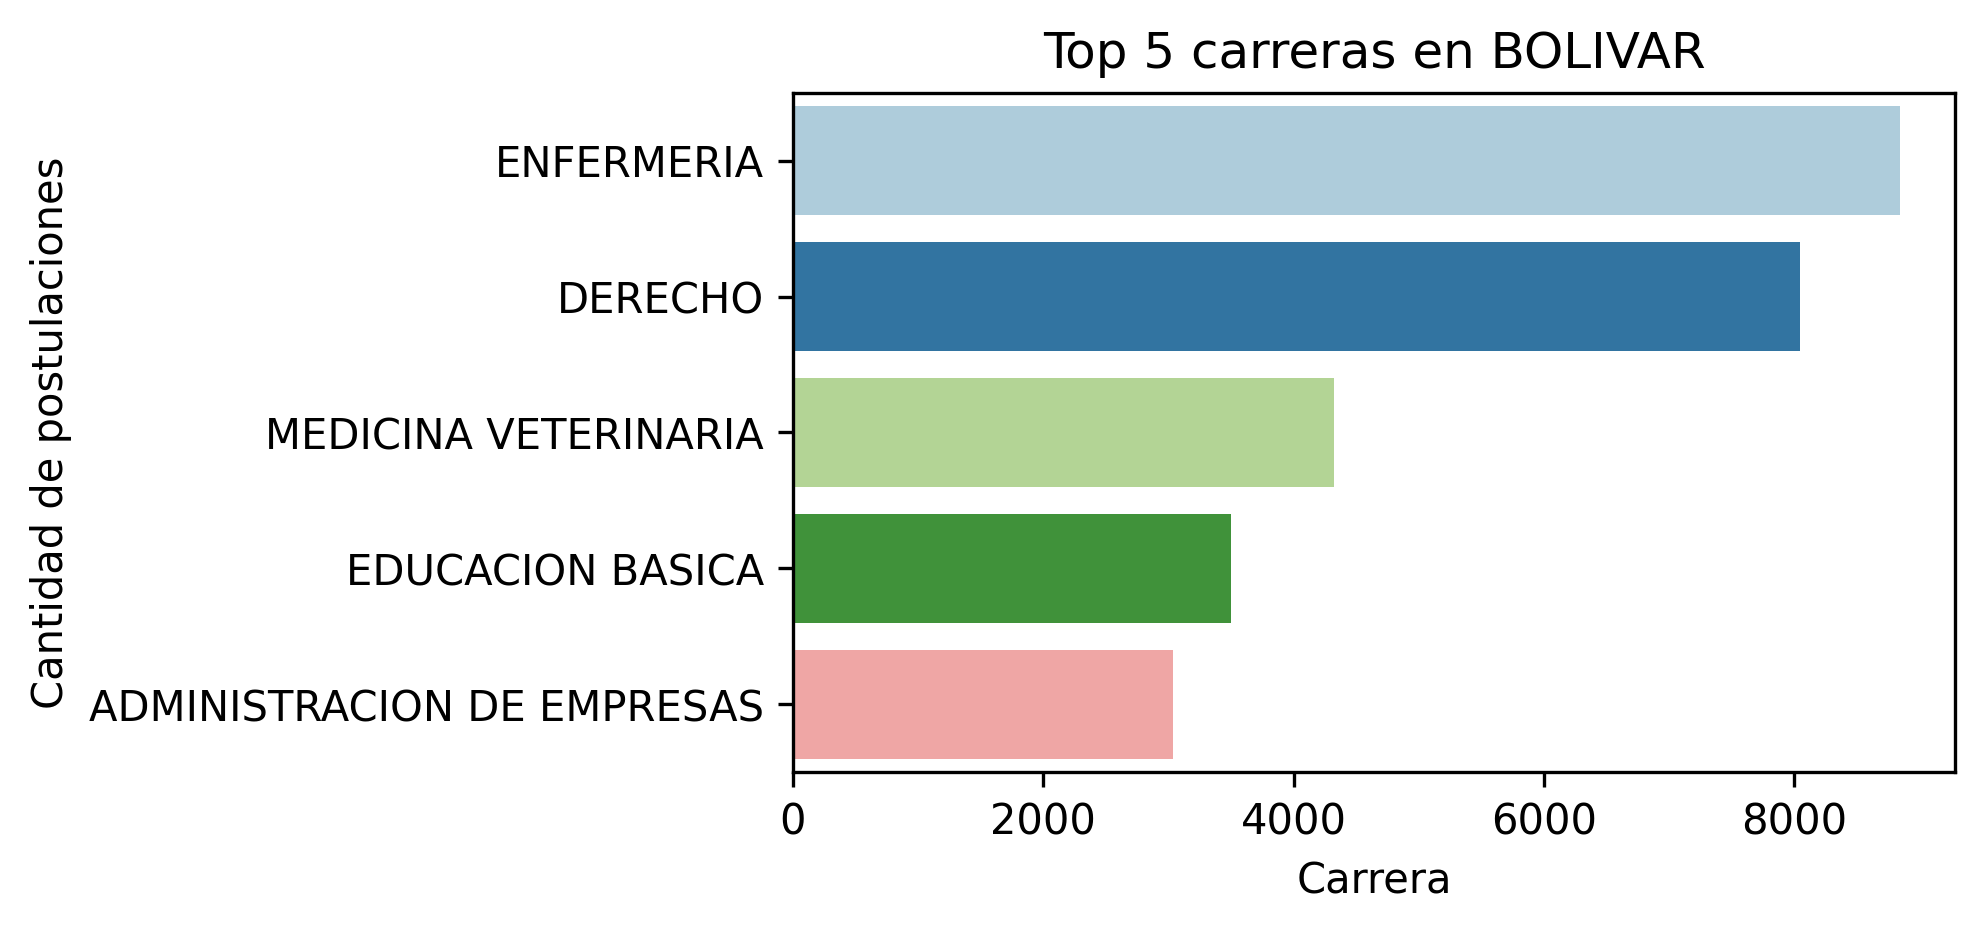

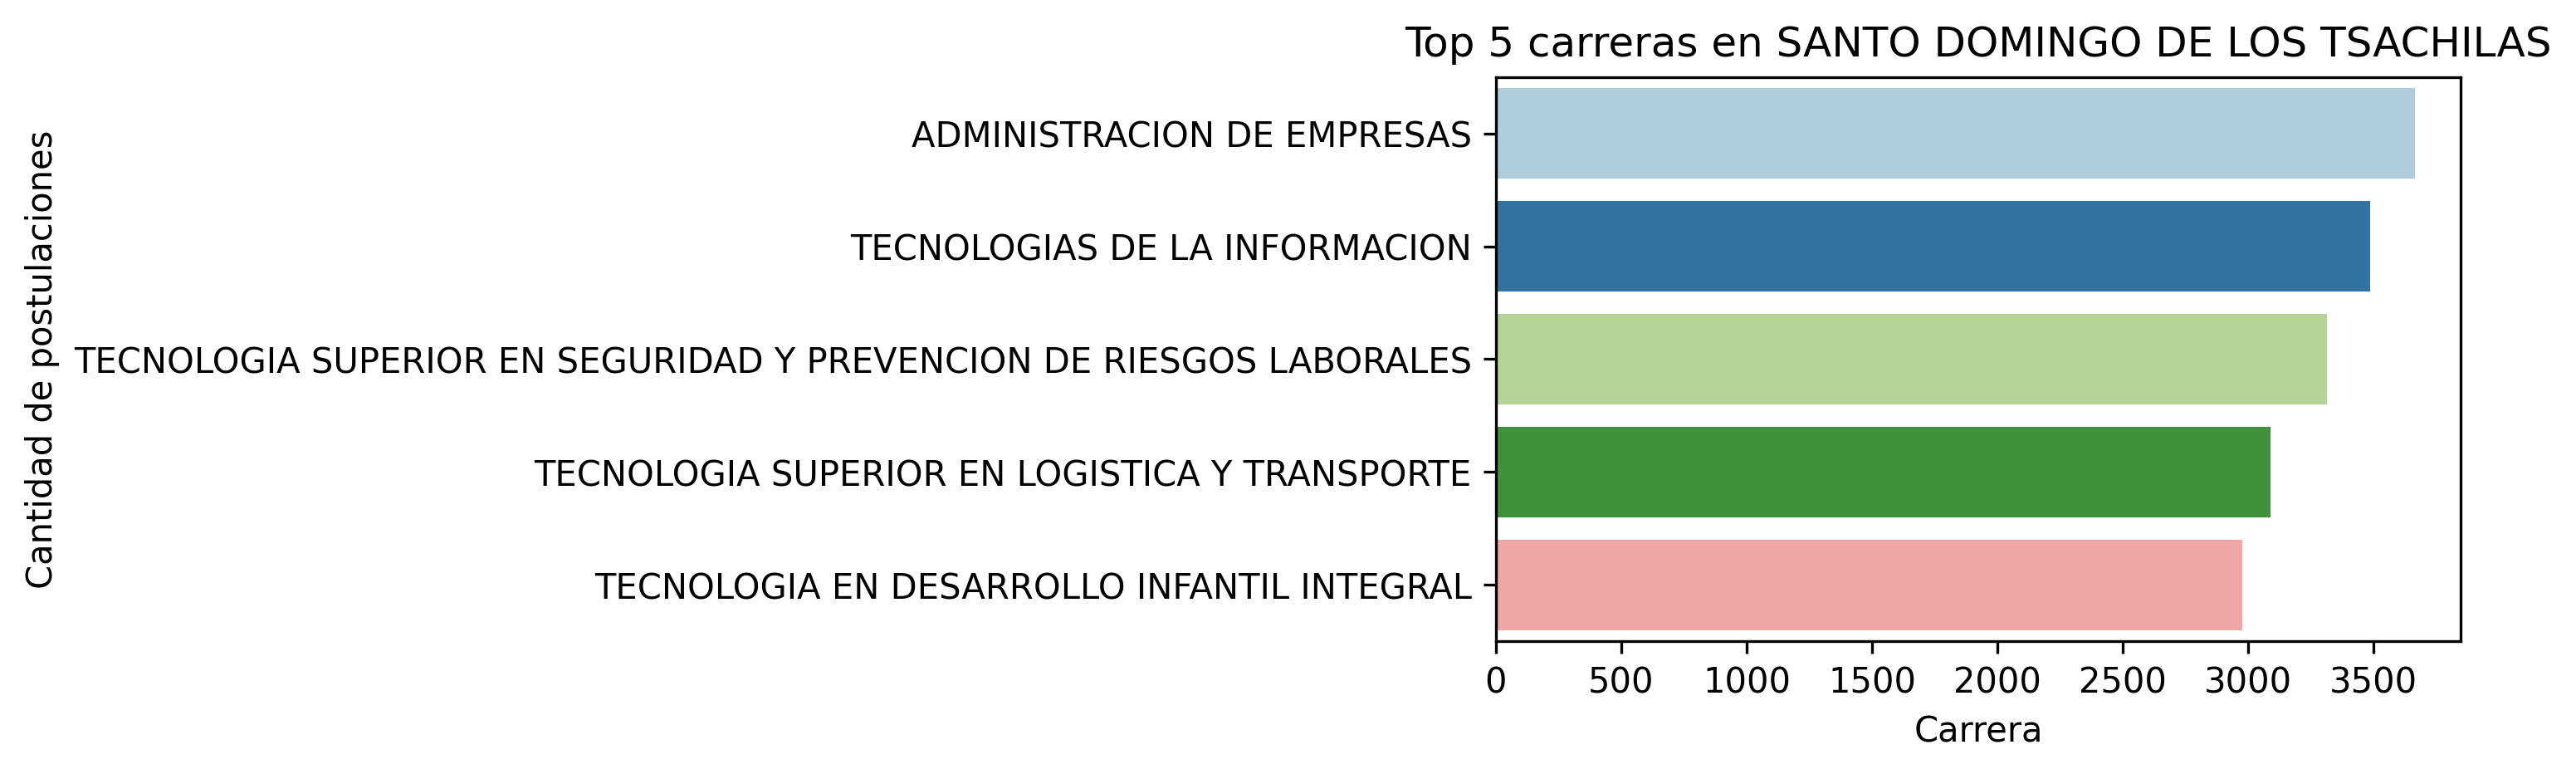

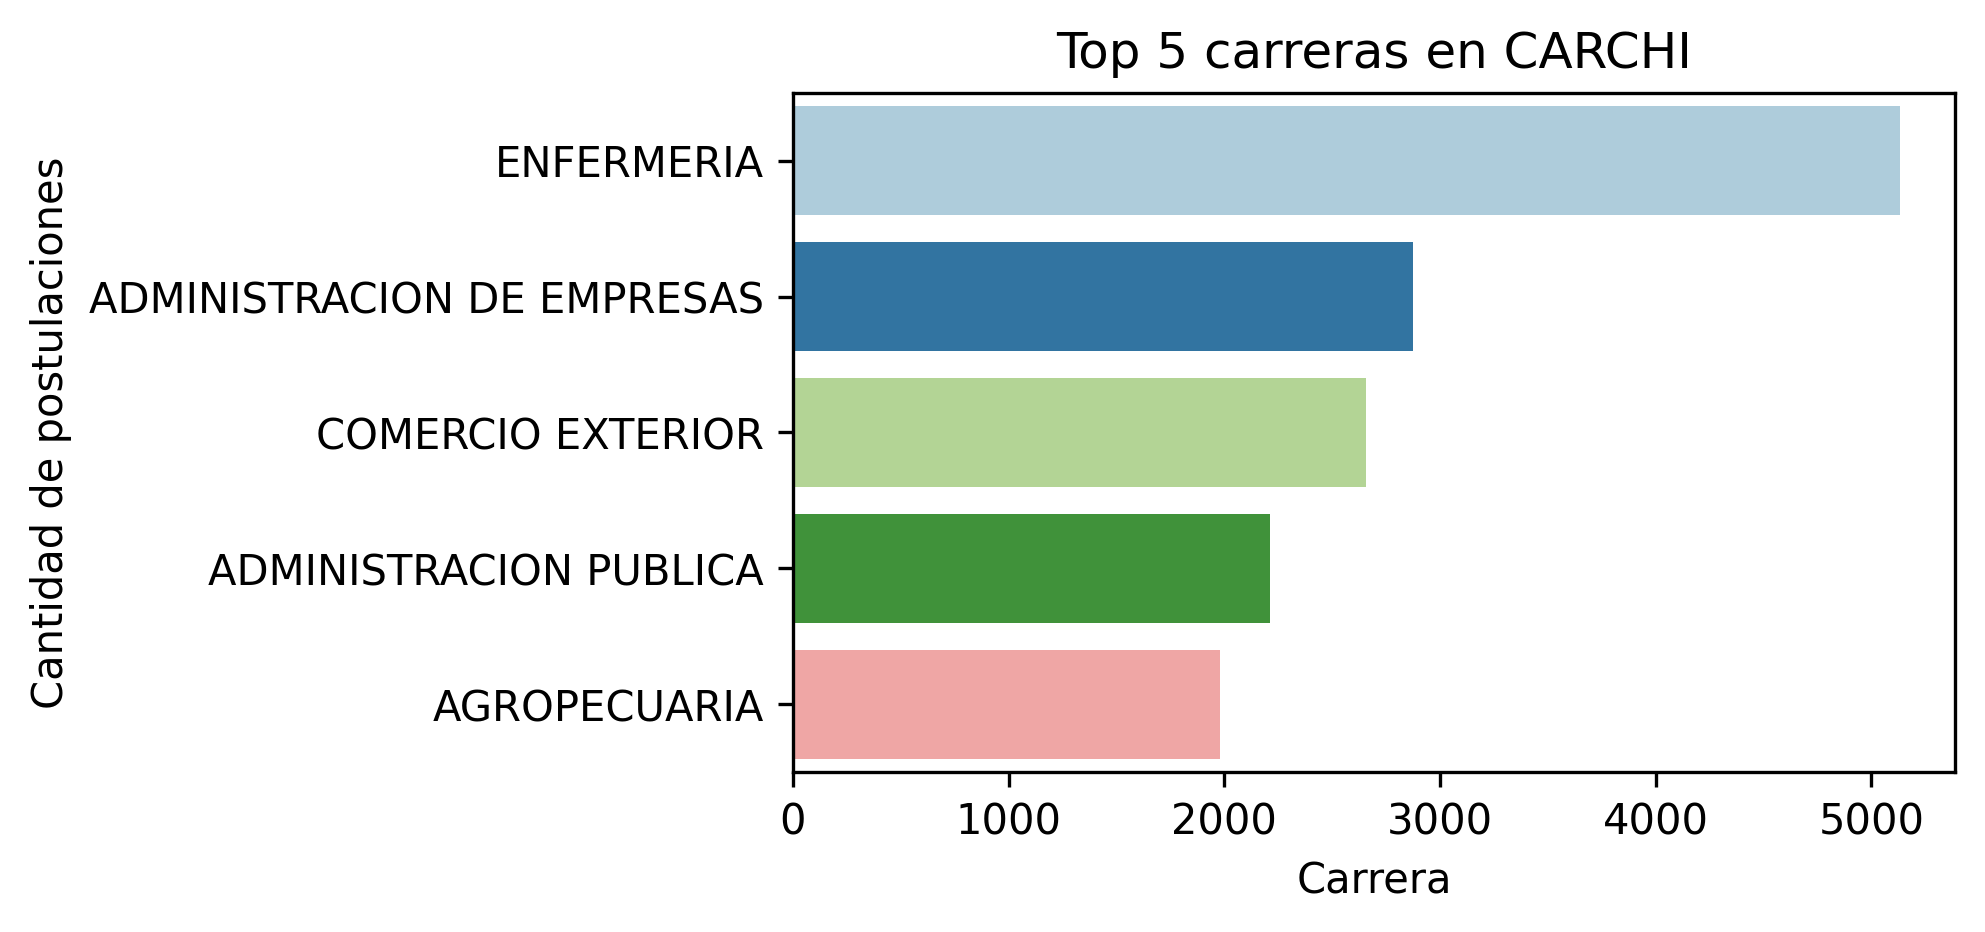

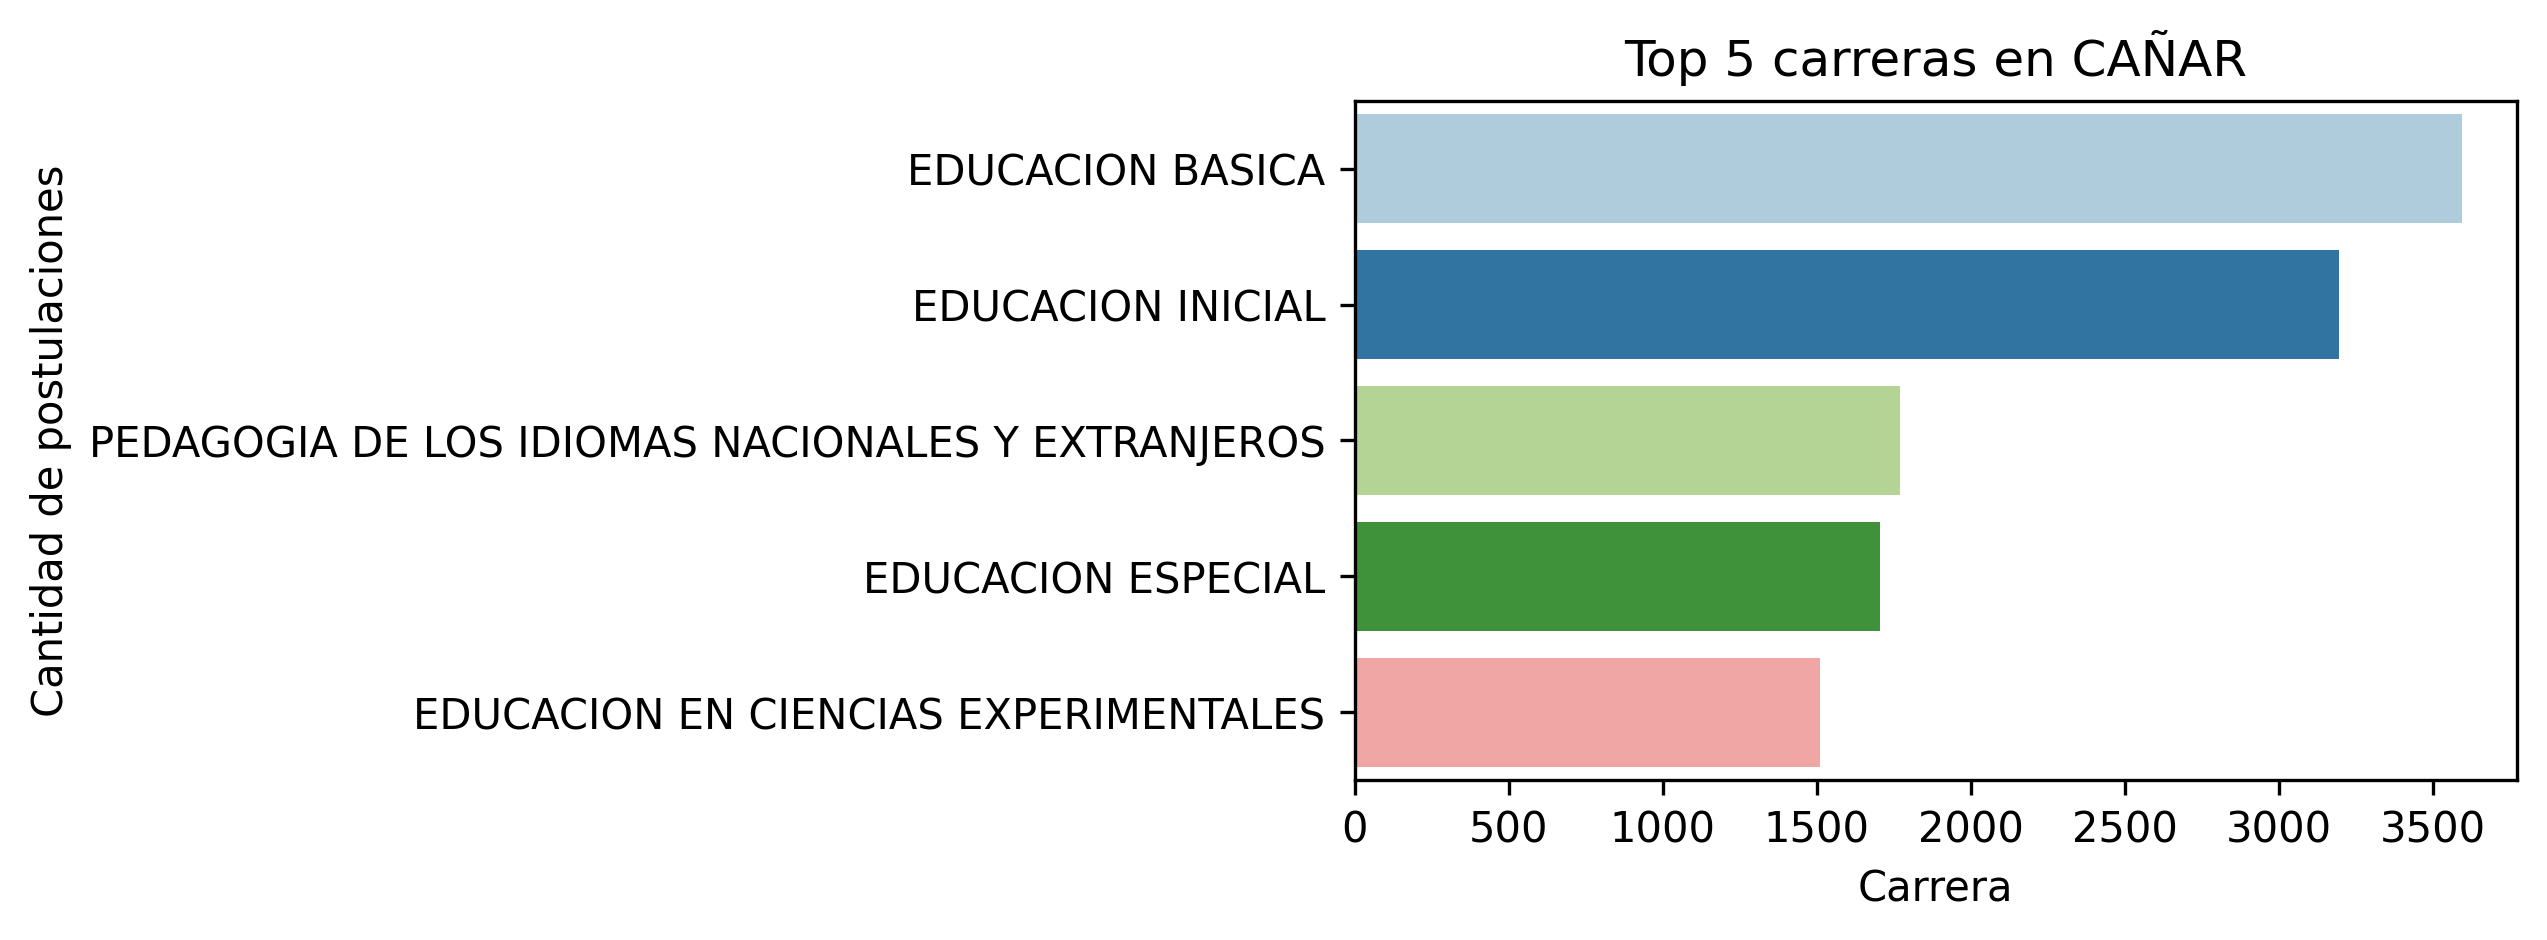

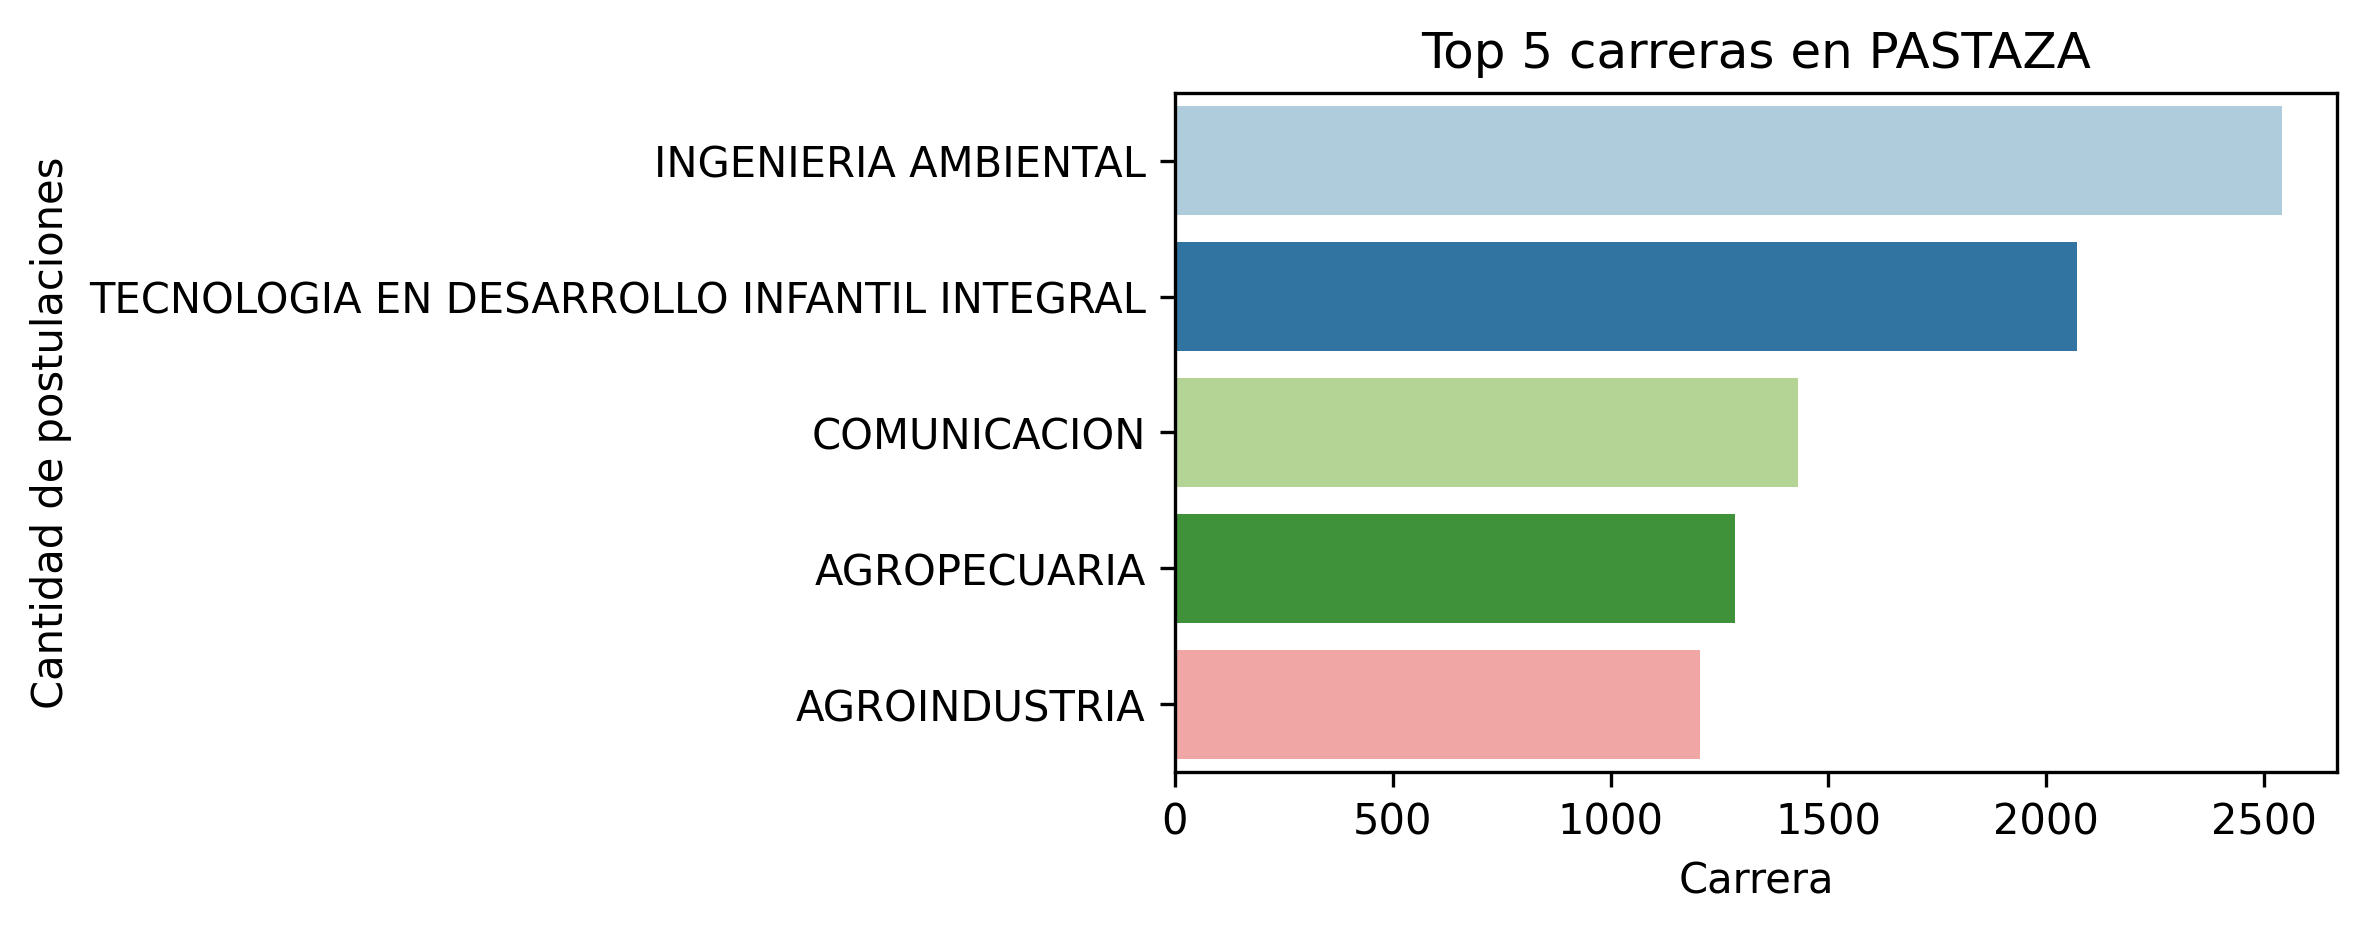

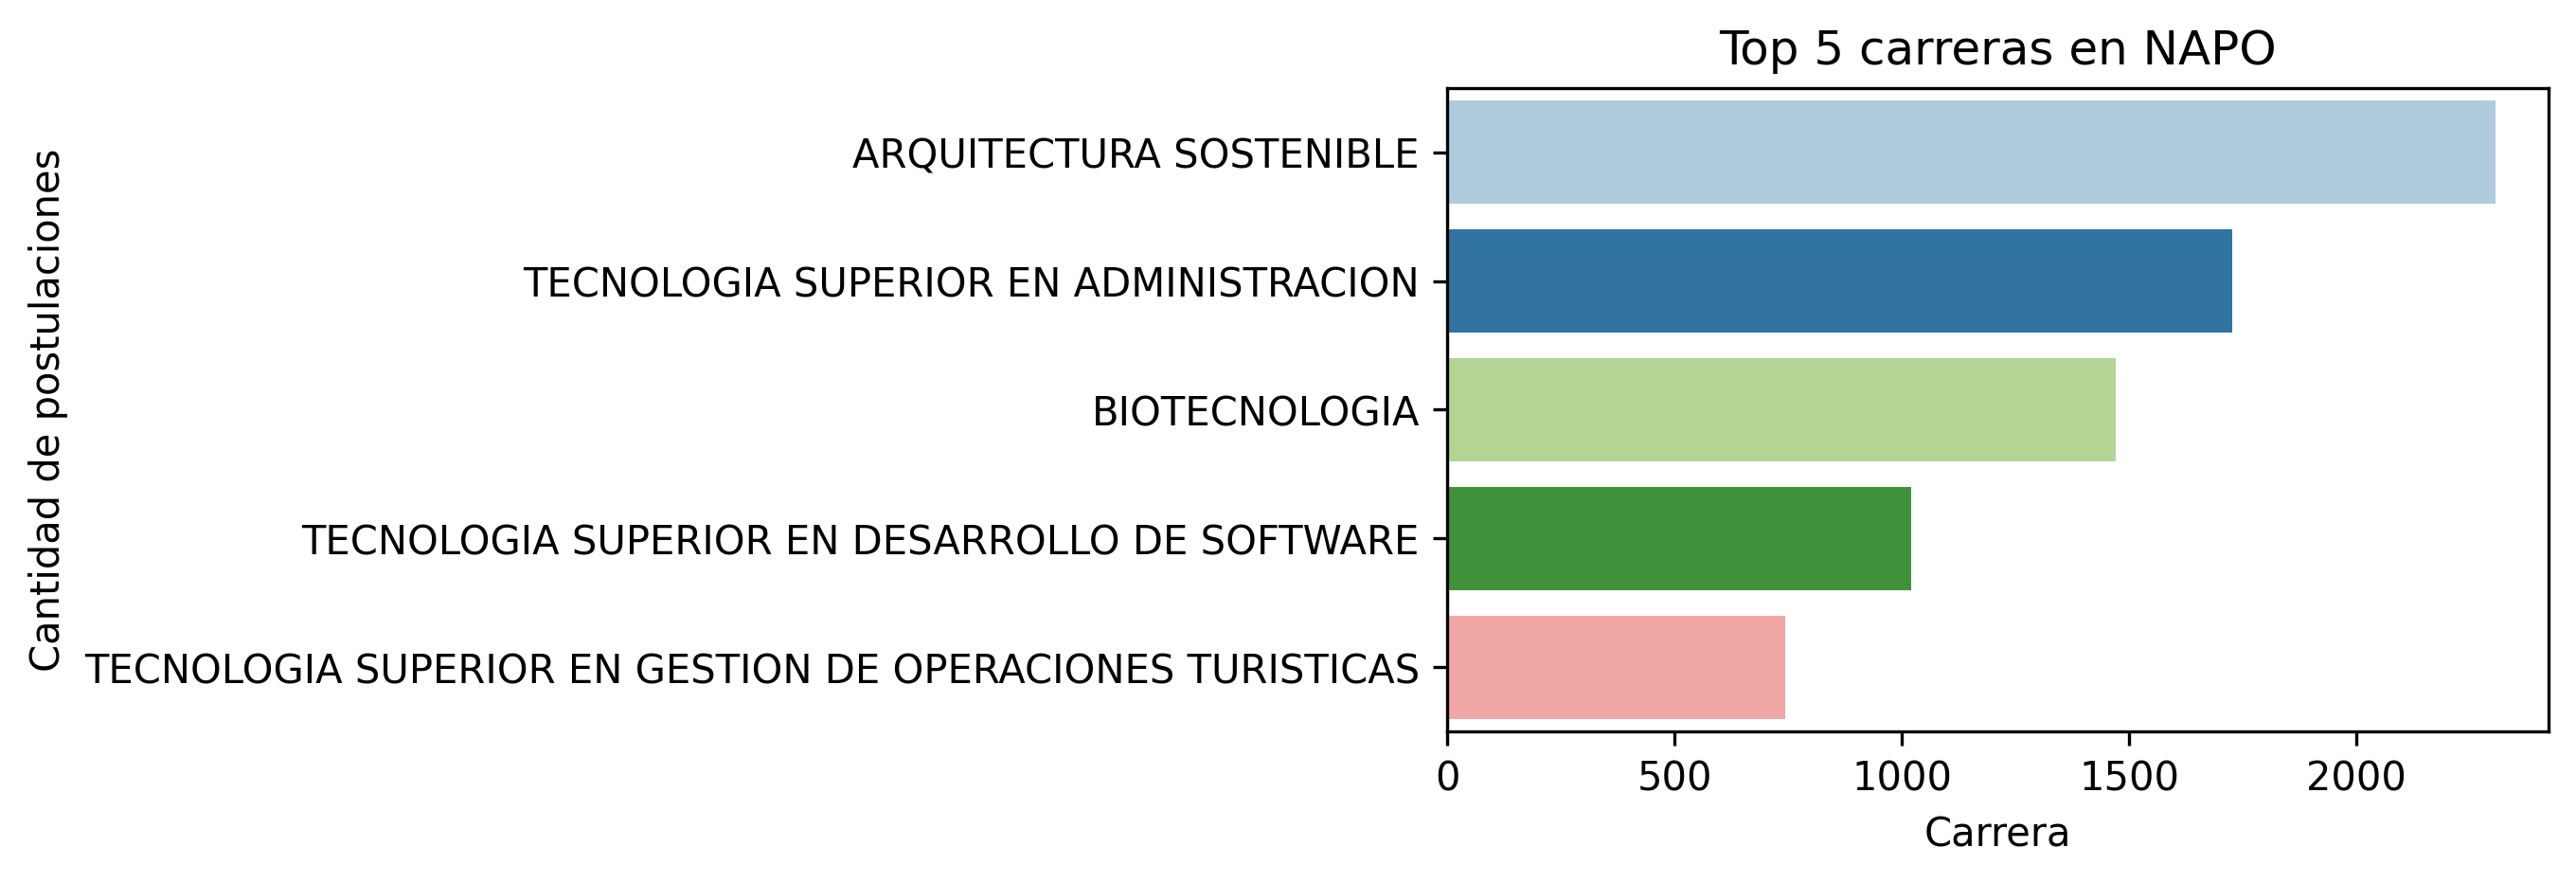

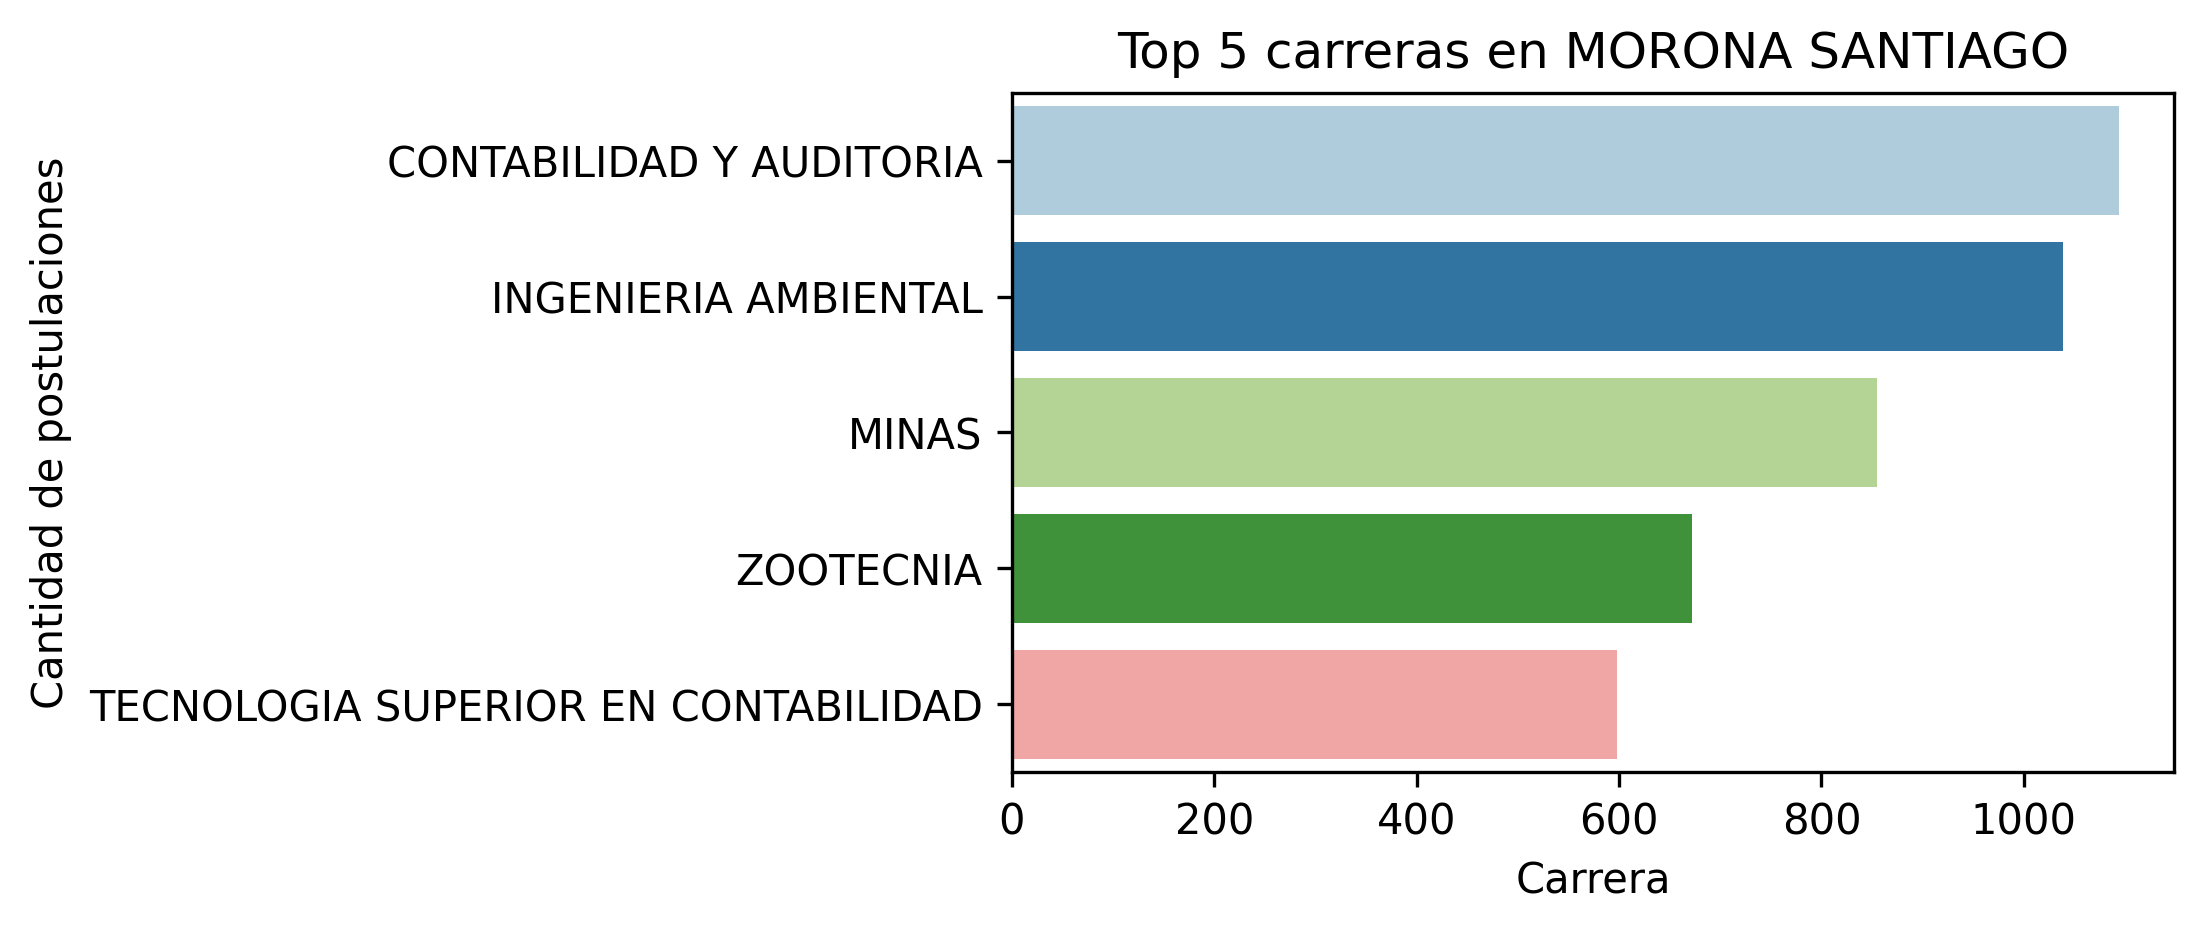

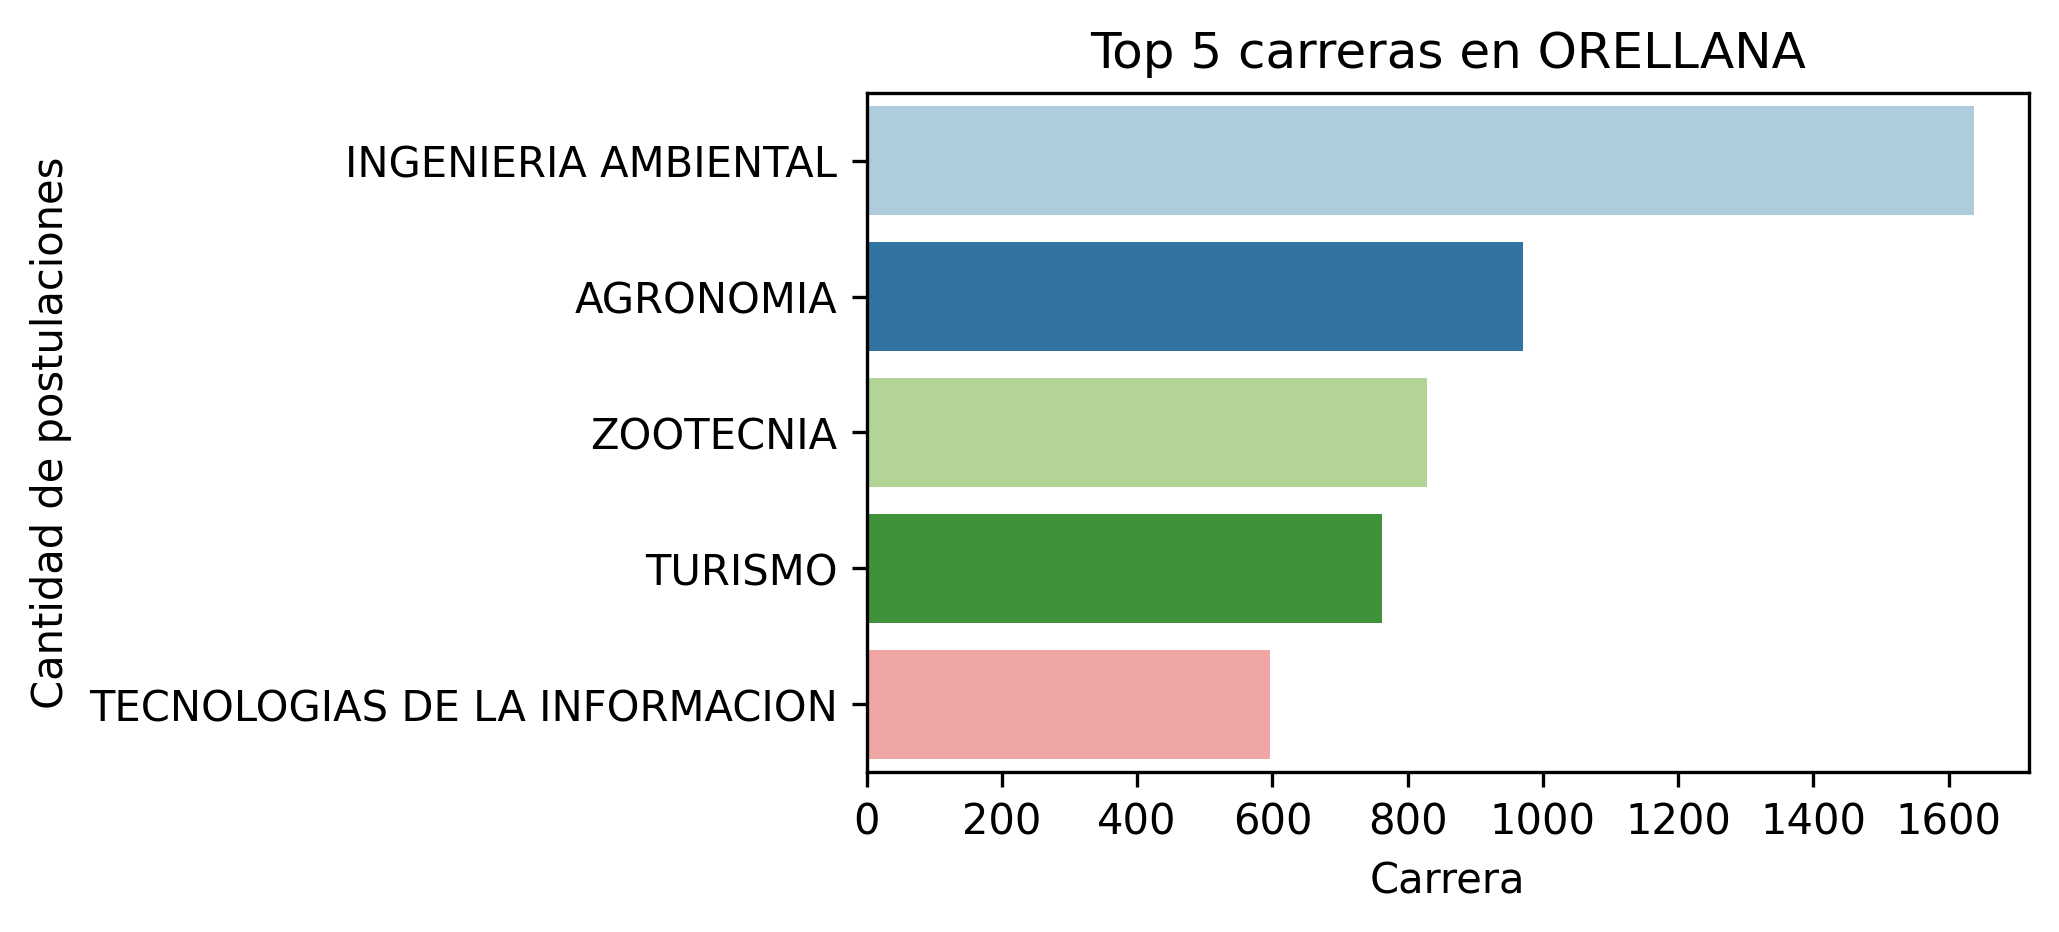

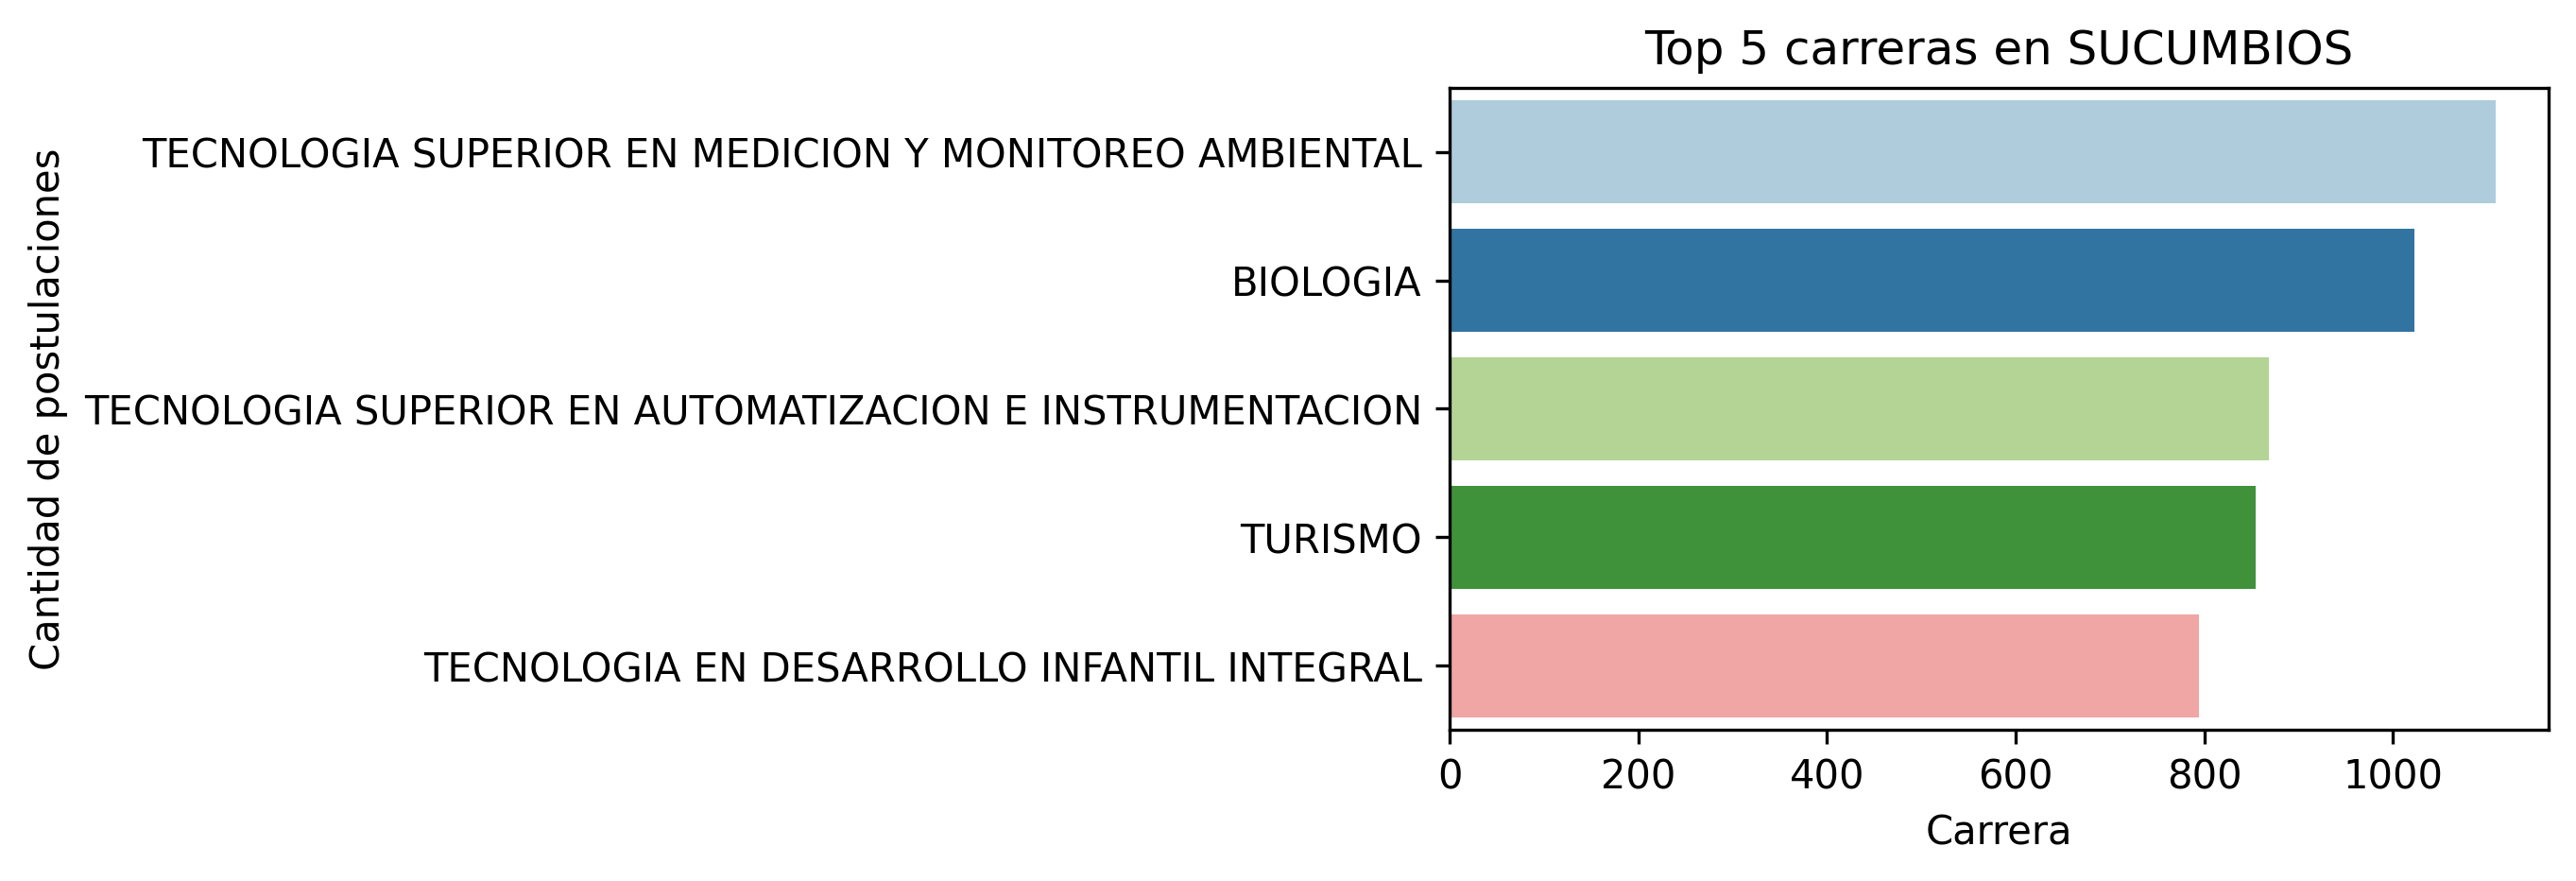

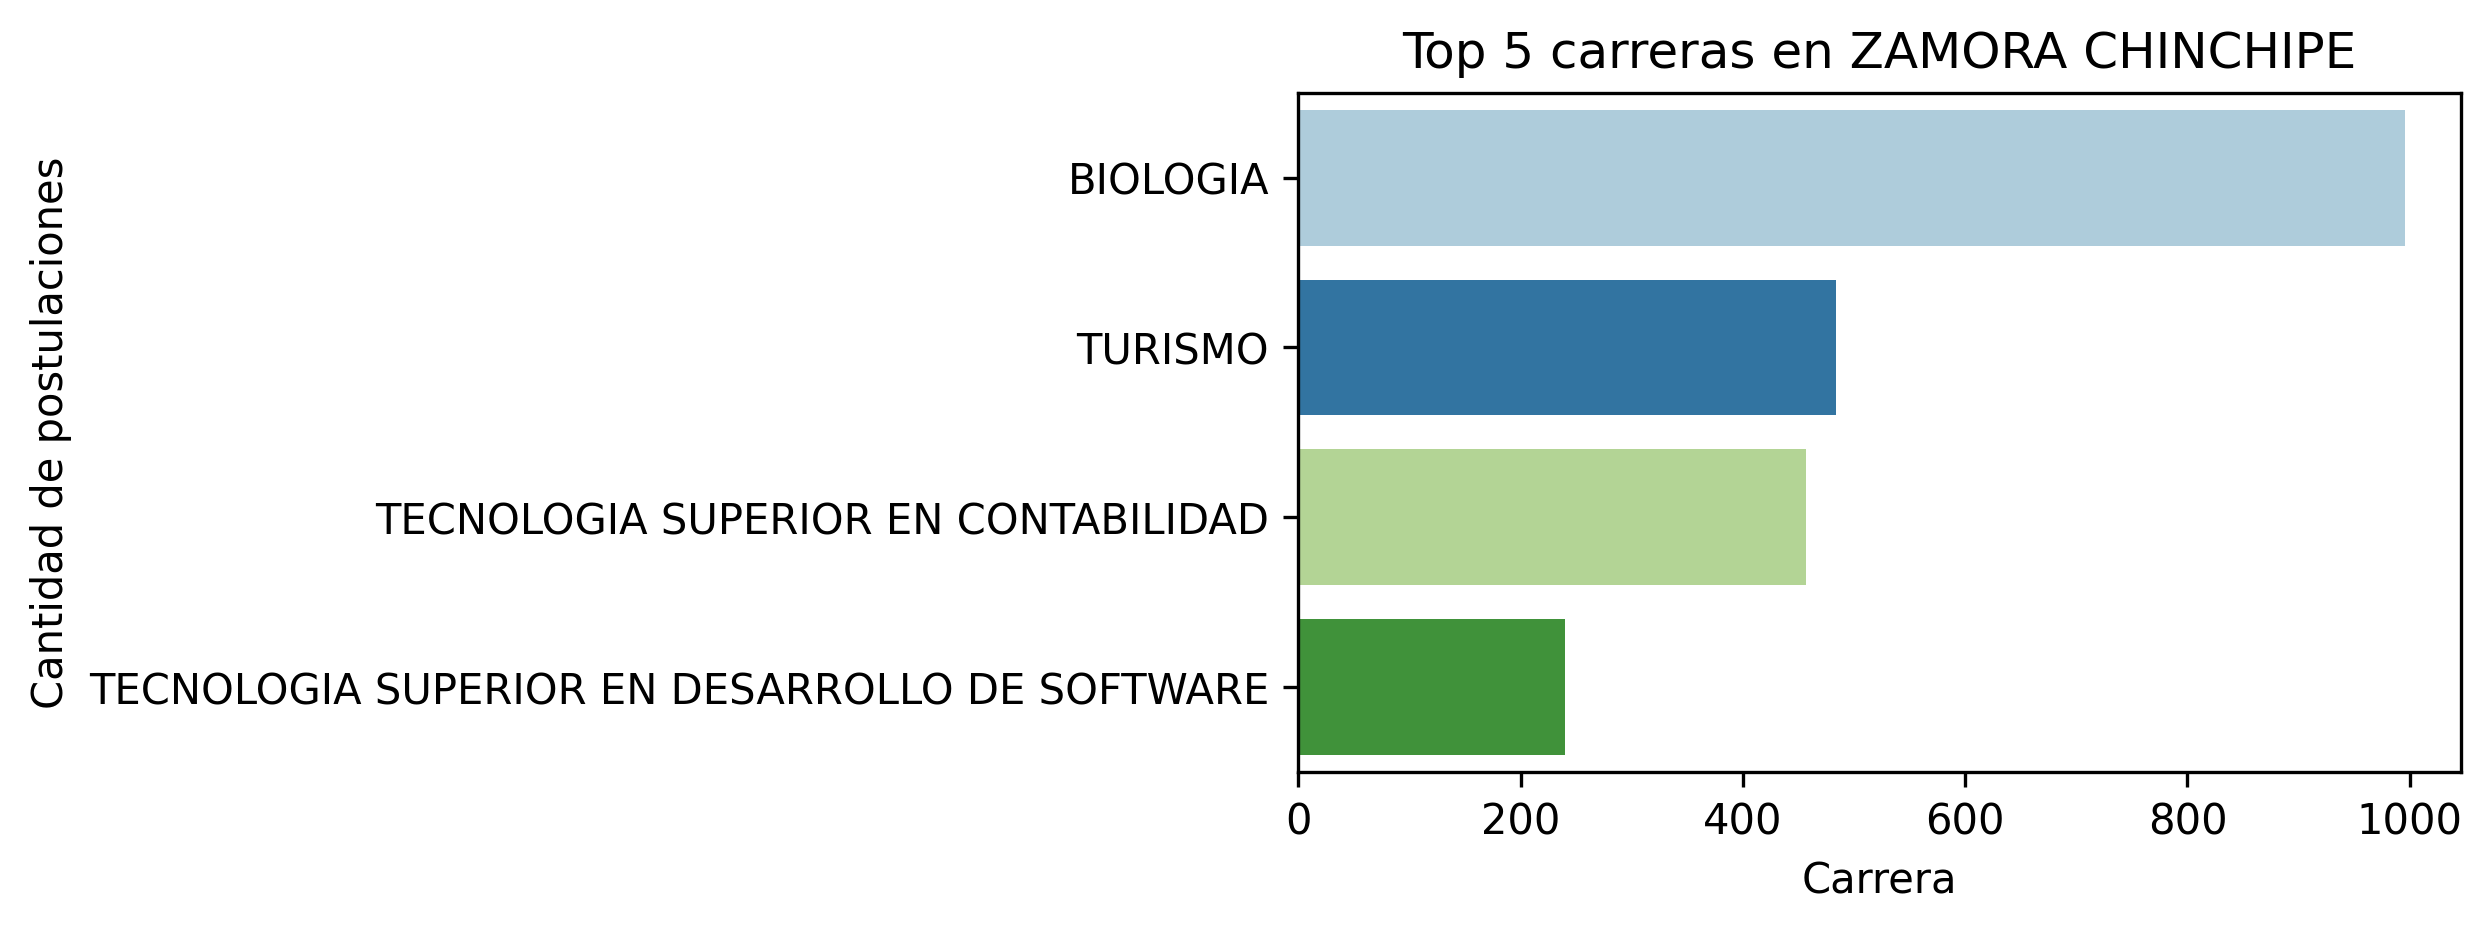

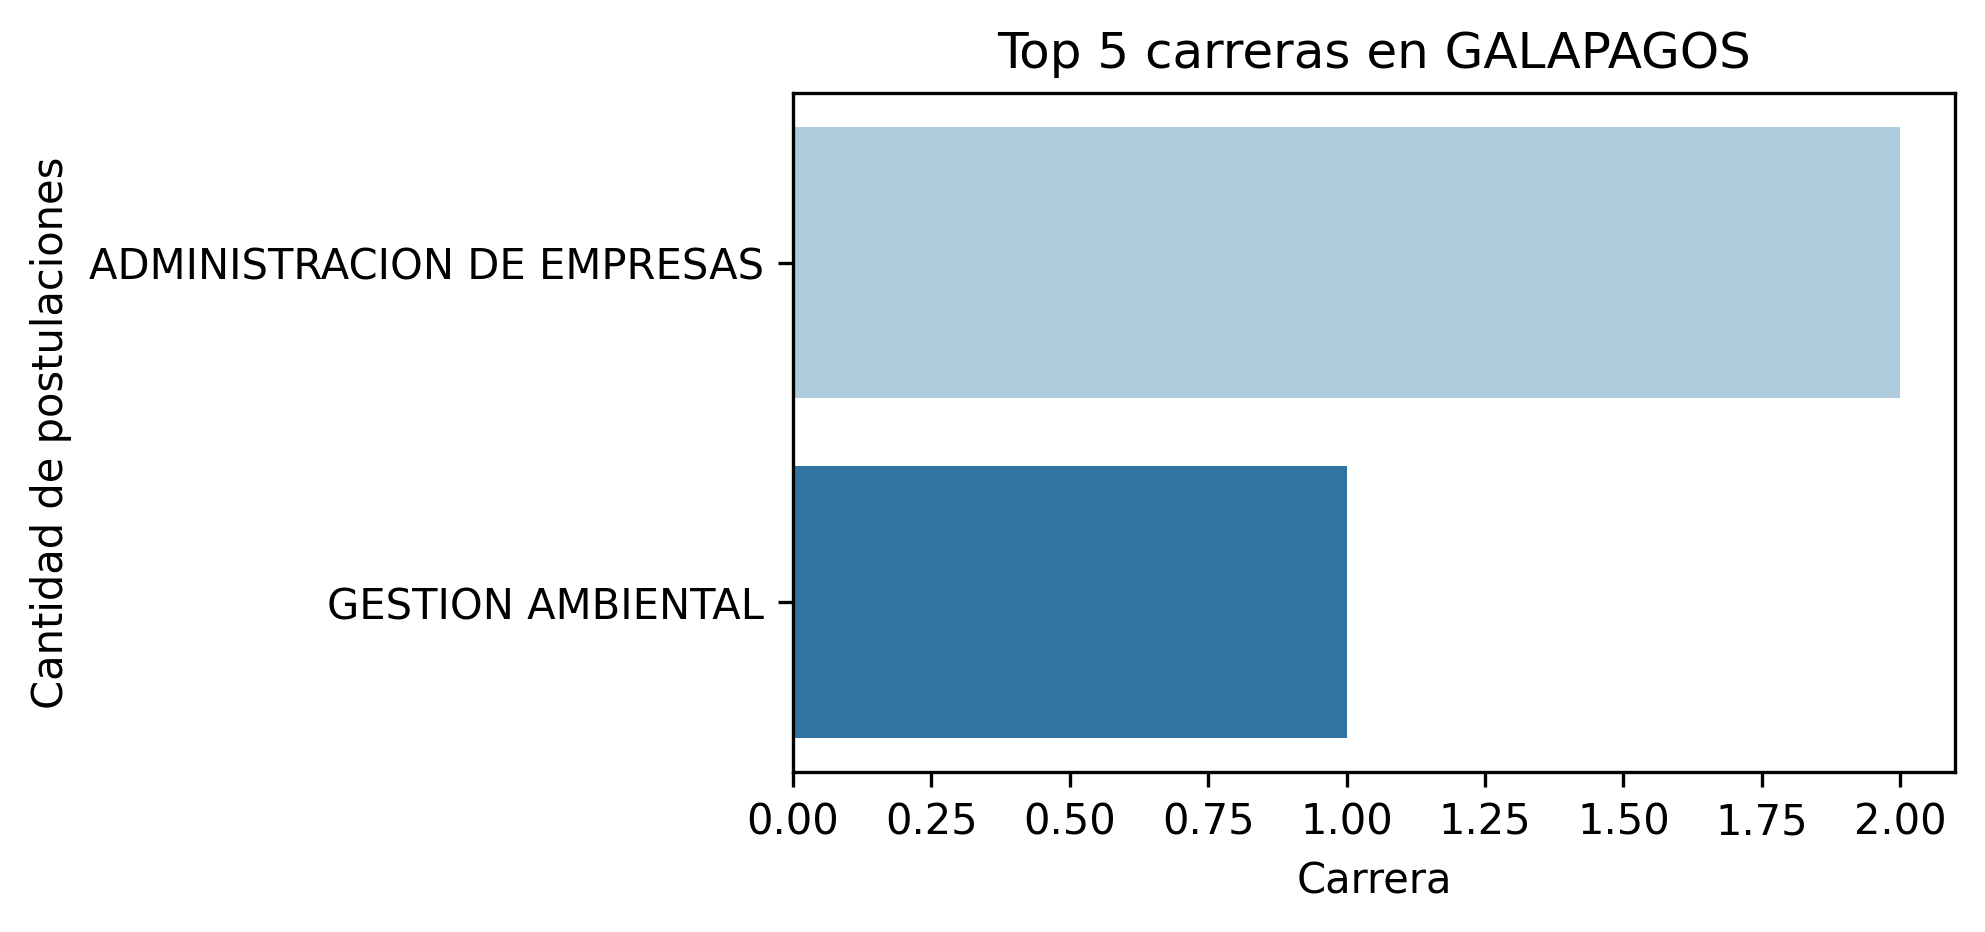

In [53]:
# Grafica el top 3 CAR_NOMBRE_CARRERA por provincia
for i in provincias.index[:30]:
    plt.figure(figsize=(5,3))
    sns.countplot(y='CAR_NOMBRE_CARRERA', data=postulaciones[postulaciones['PROVINCIA'] == i], 
                  order=postulaciones[postulaciones['PROVINCIA'] == i]['CAR_NOMBRE_CARRERA'].value_counts().iloc[:5].index)
    plt.title('Top 5 carreras en {}'.format(i))
    plt.xlabel('Carrera')
    plt.ylabel('Cantidad de postulaciones')
    plt.show()
    

<Figure size 2400x3000 with 0 Axes>

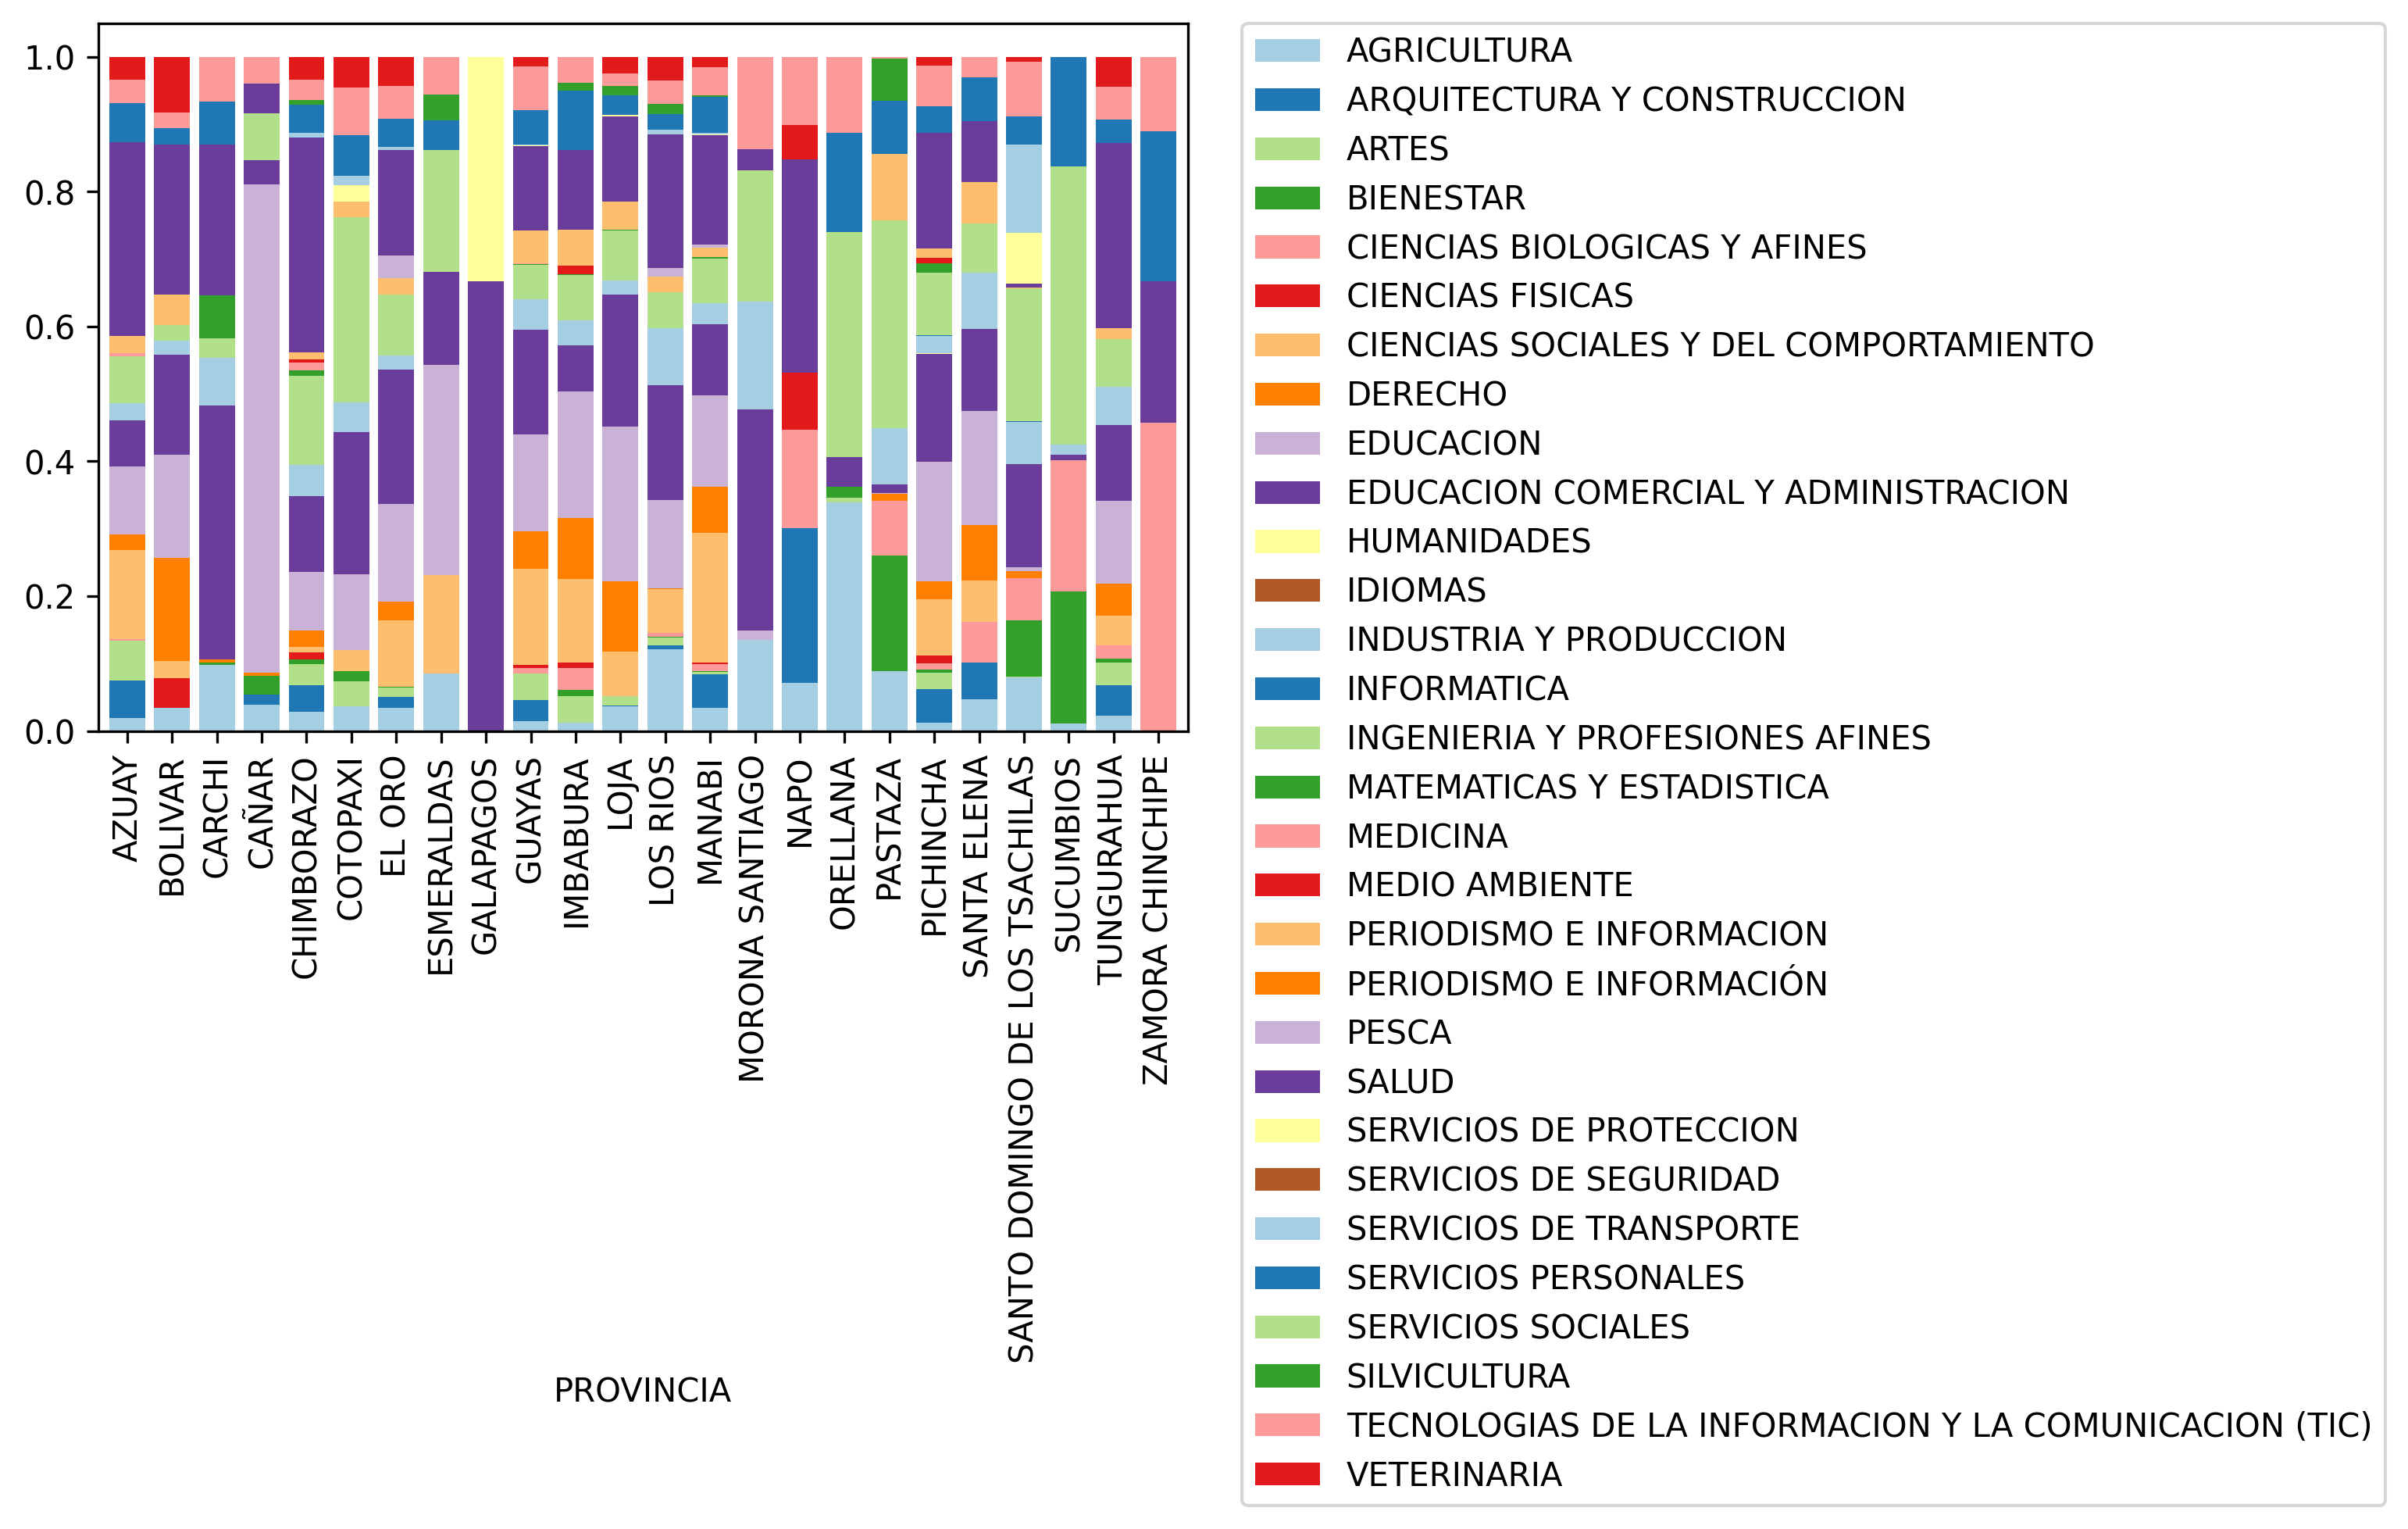

In [54]:
# Grafico de barras apiladas de la cantidad de postulaciones por PROVINCIA
# cada color es SUBAREA_NOMBRE 

# Crea un dataframe con la el porcentaje relativo de postulaciones por provincia y subarea
provincias_subarea = postulaciones.groupby(['PROVINCIA', 'SUBAREA_NOMBRE'])['CAE_NOTA_POSTULA'].count().unstack()
provincias_subarea = provincias_subarea.div(provincias_subarea.sum(axis=1), axis=0)

# Reemplaza los NaN por 0
provincias_subarea = provincias_subarea.fillna(0)

# Grafica el top 30 cantidad de postulaciones por PROVINCIA
plt.figure(figsize=(8,10))
provincias_subarea.plot.bar(stacked=True, width=0.8)

# Mueve la leyenda a la derecha afueras del grafico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



In [55]:
source = [] # i[0]
target = [] # j[0]
value = [] # cant

source_SUBAREA_NOMBRE = []
source_PROVINCIA = []
count = 0
for i in postulaciones['PROVINCIA'].value_counts().index:
    source_PROVINCIA.append([count,[i]])
    count += 1
for i in postulaciones['SUBAREA_NOMBRE'].value_counts().index:
    source_SUBAREA_NOMBRE.append([count,[i]])
    count += 1

# Crear la lista de etiquetas
label = [i[1] for i in source_PROVINCIA + source_SUBAREA_NOMBRE]


# Iterar cada elemento de la columna PROVINCIA
for i in source_PROVINCIA:
    # Iterar cada elemento de la columna SUBAREA_NOMBRE
    for j in source_SUBAREA_NOMBRE:
        cant = postulaciones[(postulaciones['PROVINCIA'] == str(i[1][0])) & (postulaciones['SUBAREA_NOMBRE'] == str(j[1][0]))].shape[0]
        if cant > 0:
            source.append(i[0])
            target.append(j[0])
            value.append(cant)


In [56]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 5,
      thickness = 10,
      label = label,
    ),
    link = dict(
      source = source,
      target = target,
      value = value
  ))])

fig.update_layout(title_text="Postulaciones por provincia", font_size=9)
fig.update_layout(height=1200)

fig.show()

In [57]:
# Exportar el gráfico como archivo HTML
fig.write_html("diagrama_sankey.html")